In [41]:
import spacy
import random
import numpy as np


In [42]:
nlp = spacy.blank('en')

In [43]:
ner = nlp.create_pipe("ner")

In [44]:
nlp.add_pipe(ner, last=True)

In [51]:
#ADD THE CUSTOM NAMED ENTITIES HERE
nlp.entity.add_label('BP_BKDTL BANKN')
nlp.entity.add_label('BP_BKDTL BANKL')
nlp.entity.add_label('BP_BKDTL IBAN')
nlp.entity.add_label('BP_BKDTL ACCNAME')
nlp.entity.add_label('AD_POSTAL CITY')
nlp.entity.add_label('AD_POSTAL POST_COD1')
nlp.entity.add_label('AD_POSTAL STREET')
nlp.entity.add_label('IBAN NEW_VALUE')
nlp.entity.add_label('BANKN NEW_VALUE')
nlp.entity.add_label('BANKL NEW_VALUE')
nlp.entity.add_label('CITY NEW_VALUE')
nlp.entity.add_label('POST_COD1 NEW_VALUE')
nlp.entity.add_label('STREET NEW_VALUE')
nlp.entity.add_label('ACCNAME NEW_VALUE')
nlp.entity.add_label('HOUSE_NR1 NEW_VALUE')
nlp.entity.add_label('AD_POSTAL HOUSE_NR1')
nlp.entity.add_label('BP_BKDTL KOINH')
nlp.entity.add_label('KOINH NEW_VALUE')
nlp.entity.add_label('POST_COD2 NEW_VALUE')
nlp.entity.add_label('AD_POSTAL POST_COD2')

In [52]:
#SPECIFY THE NER TRAINING DATA
TRAIN_DATA =  [
                ('Cortland Sp z oo Zgoda 38 60122 PoznańReason or Description of services New bank account needed to be addDear colleagues could you please add the new bank account to the vendor PL32 1030 1986 7180 0000 0000 8557 An invoice with information about bank account change and with new valid IBAN is attached Thank you Best regards LenkaHi Proc Ops For your final validation and approval please Thank youDear colleagues Please correctupdate PL1 tax IDs format to 7780043683 as in instruction table Kind regards Zuzana DortováHi Zuzana Done with the correction of PL1 Appreciate your kind approval Thank you', {'entities': [(177, 211, 'IBAN NEW_VALUE'), (285, 289, 'BP_BKDTL IBAN')]}), ('Baker McKenzie 1910 Roppongi 28 F Ark Hills 10600Reason or Description of services Please add bank data on vendor 90759408Bank data is on the attachment Account Name Baker and McKenzie LPC ﾍﾞﾝﾍﾞｰｶｰｱﾝﾄﾞﾏﾂｹﾝｼﾞｰﾎｳﾘﾂｼﾞﾑｼﾖ Mizuho Bank Ltd 0001 Toranomon Branch 046 Ordinary Deposit Account Account Number 4371389 Swift Code MHCBJPJTAdd bank details Thank you', {'entities': [(277, 299, 'BP_BKDTL BANKN'), (300, 307, 'BANKN NEW_VALUE')]}), ('Reason New account515890358Dear Jayce Please refer a ticket Also please make the following corrections switch Name 1 and Name 2 resp offfer another place for name in Hebrew I admit name in Hebrew may help in future changes but refer 1301904952 we were in past another vendor asked for Name in English correct Address to be with capitals names despite provided with small ones Street IL Peretz City Tel Aviv provide a source for Postal Code check Account Holder for stratign with capital letters add WHT data based on Certificate Please explain me the bank data in cheque I agree current ones fulfill used bank data format and required bank account length but I am confused with additional digits within the cheque 1306211 6209930009 What are these numbers 11 and 62 Why are there Kind regards Zuzana DortováDear Jayce Please make the following correct Postal Code to 6685404 I found it in reply in ticket explain me the bank data in cheque it includes additional numbers in comparison the account vendor provided in formticket Kind regards Zuzana DortováHello Zuzana Could you please provide the reason why you are asking for the numbers in cheque I think we have indicated the correct bank account already and the other numbers is maybe just an identifier Thank you Best regards LornaHi Lorna I want to understand they support same bank account supplier provided In case official document contains different bank data we put priority on official document Kind regards Zuzana Dortová', {'entities': [(852, 863, 'AD_POSTAL POST_COD1'), (867, 874, 'POST_COD1 NEW_VALUE')]}), ('Reason SSF 1301939857 1301994300 CreationDear colleagues Please make the following corrections use bank account from RIB instead or attach RIB for current banka account RIB attached is for IBAN FR7630004008420001023785467 Bank Key 3000400842 Bank Account 00010237854 Control Key 67 tag Automatic Purchase Order flag for 3311 note I agree with VAT it is calculated based on SIREN from KBIS The one in form does not match Kind regards Zuzana DortováDear Zuzana Changes have been made to vendor Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared Services', {'entities': [(189, 193, 'BP_BKDTL IBAN'), (194, 221, 'IBAN NEW_VALUE'), (222, 230, 'BP_BKDTL BANKL'), (231, 241, 'BANKL NEW_VALUE'), (242, 254, 'BP_BKDTL BANKN'), (255, 266, 'BANKN NEW_VALUE')]}), ('Dear John Sydney Please check bank account format for new account Other accounts have Bank Key included also at start of Bank Account not zeros Also please add IBAN RS35325950070004418351 to it I generated it in httpswwwibancalculatorcombicundibanhtml IBAN is recommended for Serbia Kind regards Zuzana DortováHi Zuzana Changes has been made Thanks', {'entities': [(160, 164, 'BP_BKDTL IBAN'), (165, 187, 'IBAN NEW_VALUE')]}), ('Dear John Sydney please check the following within Bank data Bank Account Is specifically different format required for 0462 For 0269 accounts from RS banks arewere maintained with Bank Key included also in Bank Account and I was not informed about change Account Holder It was longer may it be affected by rearrangement including Name 2 Please try to enter Ivan Pavlovic pr agencija za racunarsko programiranje Digita Try to add IBAN RS35265691031000094577 I generated it in httpswwwibancalculatorcombicundibanhtml IBAN is recommended for Serbia Kind regards Zuzana DortováHi Zuzana Changes has been made Thanks', {'entities': [(430, 434, 'BP_BKDTL IBAN'), (435, 457, 'IBAN NEW_VALUE')]}), ('Dear Khrys please correct also address Street House Number Postal Code and remove from ti special characters Dreischeibenhaus 1 40211 Dusseldorf Kind regards Zuzana Dortová', {'entities': [(39, 45, 'AD_POSTAL STREET'), (46, 58, 'AD_POSTAL HOUSE_NR1'), (59, 70, 'AD_POSTAL POST_COD1'), (109, 125, 'STREET NEW_VALUE'), (126, 127, 'HOUSE_NR1 NEW_VALUE'), (128, 133, 'POST_COD1 NEW_VALUE')]}), ('Dear Leydi Please correct Street to 4th Floor Clarence House Clarence Place check Account Name and Account Holder vendor provided Executive Leaders Network in form without Limited Kind regards Zuzana DortováHi Zuzana Good day Please be advised that weve updated the address and the bank account holder name Thank you BR Leydi', {'entities': [(26, 32, 'AD_POSTAL STREET'), (36, 69, 'STREET NEW_VALUE')]}), ('Reason SSF 1301986390 MDF CreationDear colleagues Please make the following corrections add Punjab to StateProvince check the Bank Account for including 2 20103378533 Supplier provided it without 2 but checker contains it and except sixth from below unblocked PK vendors with PK bank details have all nonzeros number after letters in their account so I am asking for check add infotallymarksconsultingcom to Clerks Internet Address check Payment terms default for MDF is ZB00 Kind regards Zuzana DortováDear Zuzana Changes have been made to vendor Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared ServicesDear Sarah Jane please support Postal Code I checked Customer 1618038 but there is address in Karachi Also please correct IBAN to PK09MEZN0002010103378533 Kind regards Zuzana DortováDear Zuzana Changes have been made to vendor I also attached screenshot of postal address in google Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared Services', {'entities': [(766, 770, 'BP_BKDTL IBAN'), (774, 798, 'IBAN NEW_VALUE')]}), ('Dear John Sydney Please make the following corrections for RUN2 account add 40 to Control Key correct Bank Account to 702810700000032517 check Account Holder for removing quotation marks special characters correct Payment Methods to T for both CCs Kind regards Zuzana DortováHi Zuzana Changes has been made ThanksDear John Sydney Please check quotation marks for RUN1 account Maybe I missed them but I think they should be removed because they are special characters Kind regards Zuzana Dortová', {'entities': [(102, 114, 'BP_BKDTL BANKN'), (118, 136, 'BANKN NEW_VALUE')]}), ('Dear Sarah Jane Please refer ticket if there is any Also please make the following corrections add 37 to Control Key correct Bank Account to 0000092100062045 It is based on instructions inline for 0244 Bank Key Already covers 011780 add sidialioulmesma to Clerks Internet Address for 0394 tag 3rd party enabled and Automatic Purchase Order flags for 3941 Kind regards Zuzana DortováSSF 1301967337 Dear Zuzana Changes have been made to vendor Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared Services', {'entities': [(125, 137, 'BP_BKDTL BANKN'), (141, 157, 'BANKN NEW_VALUE'), (202, 210, 'BP_BKDTL BANKL'), (226, 232, 'BANKL NEW_VALUE')]}), ('Reason SSF 1301954972 1301865650 Vendor CreationHi Zuzana Good Day Supplier advised that they have no IBAN ThanksDear John Sydney Please make the following corrections add 40 to Control Key correct Bank Account to 702810300701644010 check if «» are allowed within Account Holder if not due special characters please remove them tag Individual Payment flag for 0365 It is ok I think Russian banks do not have IBAN I have not met any from Russian bank yet Kind regards Zuzana DortováHi Zuzana Good Day Changes has been made Not all russian banks have an IBAN Thanks', {'entities': [(198, 210, 'BP_BKDTL BANKN'), (214, 232, 'BANKN NEW_VALUE')]}), ('Dear Jayce Please correct Bank Account to 08009 The requirement for Bank Account length for Israel is 59 digits so for account 8009 we need add at least a zero to get to minimum five digits Kind regards Zuzana DortováHi Zuzana Done updating account number Thank you', {'entities': [(26, 38, 'BP_BKDTL BANKN'), (42, 47, 'BANKN NEW_VALUE')]}), ('Reason SSF 1301937383 1301893394 Vendor CreationDear John Sydney Please make the following corrections correct Bank Account to 702810238000090313 add AK to Control Key Please check Account Holder with vendor it is really in Latin characters Russian bank details have usually Account Holder input in Cyrillic Bank Account starting with 30 is in banks side but may be added after name with slash Sberbank of Russia 30101810400000000225 Despite related to another request see explanation from Diana in 1301751705 I also sent you an email some days ago please check Russian bank details within your team Kind regards Zuzana Dortová', {'entities': [(111, 123, 'BP_BKDTL BANKN'), (127, 145, 'BANKN NEW_VALUE')]}), ('Reason Vendor Creation 0008 SSF 1301905526Dear colleagues Please use the bank data from voided cheque instead Bank Country GB IBAN GB39HBUK40030482160420 Bank Account 82160420 Bank Key 400304 Also please correct Payment Methods to In form Bank Account 8310251279 is provided but without Bank Key The Bank Details pdf does not look like a letterhead rather than summary with a logo and was attached by requestor not vendor Kind regards Zuzana DortováHi zuzana They have an invoice with bank details to support bank key and bank account 8310251279 Anyway i made the changes per your request Please check and approve Regards ToniHi Tony When an invoice with bank details to support bank key and bank account 8310251279 was provided the account can be added but please attach the invoice I forgot to mention account in Cheque is for GBP there is also no clue Account Holder for GBP one is TransferWise FBO Lead Bullets Ltd Without any confirmation I rather think it is Lead Bullets Ltd for GBP one If we have more accounts supported please rather check which one or both should be used Kind regards Zuzana DortováHi Zuzana I made the changes Please check and approve Thanks Toni'
, {'entities': [(239, 251, 'BP_BKDTL BANKN'), (252, 262, 'BANKN NEW_VALUE')]}), ('Dear Sarah Jane Please make the following corrections please add IBAN RS35340000000003552458 to the account It is provided in ticket also can be generated in checker with Bank Key 340 and Bank Account 000000003552458 structure is also provided in old ticket 1300929308 correct Bank Details ID to CSD From YTC9 I understand RSD was old and now CSD should be used Despite both are for Serbian currency I think it is safer to use CSD Kind regards Zuzana DortováDear colleagues Despite the reply from IT to add another zeros to account to fill up to 18 digits I agree with you and history found with Bank Key also in Bank Account Please try to add IBAN RS35340000000003552458 again with 18 digits in Bank Account it may proceed Kind regards Zuzana Dortová', {'entities': [(65, 69, 'BP_BKDTL IBAN'), (70, 92, 'IBAN NEW_VALUE'), (171, 179, 'BP_BKDTL BANKL'), (180, 183, 'BANKL NEW_VALUE'), (188, 200, 'BP_BKDTL BANKN'), (201, 216, 'BANKN NEW_VALUE'), (644, 648, 'BP_BKDTL IBAN'), (649, 671, 'IBAN NEW_VALUE')]}), ('Dear Jayce Please make the following corrections VAT matches correct Name 1 to SATISFY AG Berlin correct Street to Schlesische Strasse add 26 into House Number correct Postal Code to 10997 correct City to Berlin ammend Region State accourdingly correct Bank Account EUR7 to 0931758 last two zeros are missing check Account Holders Should they be SATIS and FY AG Berlin Kind regards Zuzana DortováHi Zuzana Done updating the account Thank youDear Jayce Please correct EUR7 account as was 0004 IBAN DE84500700100093175800 Bank Account 093175800 Bank Key 50070010 Kind regards Zuzana DortováHi Zuzana Done updating the Bank details in EUR7 Thank you', {'entities': [(105, 111, 'AD_POSTAL STREET'), (115, 134, 'STREET NEW_VALUE'), (139, 141, 'HOUSE_NR1 NEW_VALUE'), (147, 159, 'AD_POSTAL HOUSE_NR1'), (168, 179, 'AD_POSTAL POST_COD1'), (183, 188, 'POST_COD1 NEW_VALUE'), (197, 201, 'AD_POSTAL CITY'), (205, 211, 'CITY NEW_VALUE'), (253, 265, 'BP_BKDTL BANKN'), (274, 281, 'BANKN NEW_VALUE'), (492, 496, 'BP_BKDTL IBAN'), (497, 519, 'IBAN NEW_VALUE'), (520, 532, 'BP_BKDTL BANKN'), (533, 542, 'BANKN NEW_VALUE'), (543, 551, 'BP_BKDTL BANKL'), (552, 560, 'BANKL NEW_VALUE')]}), ('Reason SSF 1301730952 CreationDear Sarah Jane Please make the following corrections add Street 47 Industrial Ave into end of Street resp overlap into District if available for Qatar add IBAN QA38DOHB000000022222406101100 to the account I generated it IBAN is mandatory for Qatar Kind regards Zuzana DortováDear Zuzana Changes have been made to vendor Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared ServicesDear Sarah Jane I apologize I forgot to check Bank details file last time I am not sure it is letterhead but it contains IBAN QA98DOHB022202240610010010000 The IBAN QA98DOHB022202240610010010000 leads to bank account 022202240610010010000 Please use it instead IBAN QA98DOHB022202240610010010000 Bank Account 22202240610010010000 Kind regards Zuzana DortováDear Zuzana Changes have been made to vendor Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared ServicesDear Sarah Jane Please advise from checker the account is 22202240610010010000 I am not sure is there enough space in Bank Account I am afraid maybe not What are instruction for Qatar Can be first or last two digits which ones put into Control Key Except zeros at start of account I do not think digits from account can be just removed I also saved request by mistake before this return What are the consequences from it Kind regards Zuzana DortováDear Sarah Jane please double check check again the IBAN with vendor I asked Kairat from Payment team the IBAN looks differently than usual Qatar IBANs See reply in attached email Kind regards Zuzana DortováDear Zuzana Please see attached IBAN checker screenshot for your reference Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared ServicesHello Sarah Jane due reply from Payment team provided IBAN is not similar to examples listed I asked for check with vendor Please do so I also think vendor may be able to provide more details about IBAN and account number if they confirm it Kind regards Zuzana DortováDear Zuzana I have received the confirmation from the supplier that the IBAN is correct Please check response in SSF 1301730952 Thanks Please approve vendor request Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared Services', {'entities': [(186, 190, 'BP_BKDTL IBAN'), (191, 220, 'IBAN NEW_VALUE'), (607, 611, 'BP_BKDTL IBAN'), (612, 641, 'IBAN NEW_VALUE'), (651, 663, 'BP_BKDTL BANKN'), (664, 685, 'BANKN NEW_VALUE')]}), ('Hi Zuzana I did not add the EUR bank account since the IBAN is incorrect ThanksDear John Sydney please try to add EUR bank account again I did not get error in checker it should be valid IBAN BG51UNCR70001523461267 Bank Account 1523461267 Bank Key UNCR7000 Kind regards Zuzana DortováHi Zuzana Changes has been made Thanks', {'entities': [(187, 191, 'BP_BKDTL IBAN'), (192, 214, 'IBAN NEW_VALUE'), (215, 227, 'BP_BKDTL BANKN'), (228, 238, 'BANKN NEW_VALUE'), (239, 247, 'BP_BKDTL BANKL'), (248, 256, 'BANKL NEW_VALUE')]}), ('Dear Toni Please make the following corrections correct Bank detsils ID for GB bank account from 0001 maybe EUR remove 020496056 from GB1 from information I have GB1 does not exists in Customization Also please contact vendor Qvidian UK Limited 90763449 and ask for their VAT supported by invoice or letterhead 020496056 does not match GB VAT format to check if they have Bank Account 4033815978 with Bank Key 121000248 Also please ask about banks country it may beis important If vendor Qvidian UK Limited does not have bank account 4033815978 delete the USD one The attachment matches vendor 90784582 Upland Software in USA Texas Please attach the attachment to vendor 90784582 Upland Software and add the bank account for Upland Software maintained in USA bank Vendor 90784582 is just in CC 0008 check with requestor to extend it as needed at least into 0009 I am not sure if two vendors can have account with same number and same bank key but in different bank country Kind regards Zuzana DortováHello Zuzana Please check the details Bank Type has been changed to EUR Remove Tax 020496056 from GB1 Added VAT number in GB0 see attached VAT in screenshot As per Bank Letter the bank is in USA thus I have change the bank country from CA to US THanks ToniDear Toni please attach official support for VAT Can you please provide your question to treasury team I am not sure if it gives information two vendors cannot have account with same number with same bank keys but different bank countries My point about USD account here is it may be put incorrectly and does not belong to vendor Qvidian UK Limited I tried to explain in points Vendor 90763449 is Qvidian UK Limited in United Kingdom Vendor 90784582 is Upland Software in USA The attachment is for Upland Software with matching address Account 4033815978 with Bank Key 121000248 in US bank belongs to vendor 90784582 From the following options I think 2 is more probably true 1 Can vendor 90763449 Qvidian UK Limited have account with same number but in Canada If so keep USD account in Canada 2 Vendor 90763449 Qvidian UK Limited cannot have the account in Canadian bank when Upland Software has account in USA If so remove USD account from 90763449 add it to 90784582 and extend it informing requestor account is for different vendor Kind regards Zuzana DortováHi Zuzana Changes has been made based on the latest email you sent to me today Kindly check and approve Thank you ToniHi Toni I apologize I missed to ask to remove comma from Street Please remove it Kind regards Zuzana Dortovádone', {'entities': [(372, 384, 'BP_BKDTL BANKN'), (385, 395, 'BANKN NEW_VALUE'), (401, 409, 'BP_BKDTL BANKL'), (410, 419, 'BANKL NEW_VALUE')]}), ('Dear colleagues Please make the following corrections correct new bank account details also with instructions Bank Account 0001265000002780 Control Key 45 delete MA4 tax ID Kind regards Zuzana DortováDear colleagues Please make the following corrections correct new bank account details also with instructions Bank Account 0001265000002780 Control Key 45 delete MA4 tax ID I have information it does not exist in Customization Kind regards Zuzana DortováBank account is already update as per instructionDear Lorna Please check MAD accounts I got a suspicion MAD1 and MAD2 should be same bank account but is not due the way put in system In ticket Account 007780000126500000278045 is asked matches the attachment MAD account was there it was corrected by moving 45 from bank account 000126500000278045 to Bank Key – I agree with this correction I am following the instructions “bank account structure first 6 digits bank key last 2 digits to be entered as AK” MAD2 account is now 007780000126500000 with bank key 007780 It does not match the attachment combined with instructions So I think it is incorrect also no Control Key there 007780 should not be part of bank account and some digits in end are missing But it leads to corrected previous account now MAD1 As a result I think the correct would be to have the only one MAD account with numbers now in MAD1 Please confirm my suspicion or explain what another correct state should be correct accordingly Kind regards Zuzana DortováHello Zuzana Good day I have deleted the bank account in MAD2 As also confirmed by the requestor Thank you so much Best regards LornaDear Lorna Please remark account from MAD1 to MAD For just one account for the currency it should be without number Kind regards Zuzana Dortová', {'entities': [(110, 122, 'BP_BKDTL BANKN'), (123, 139, 'BANKN NEW_VALUE'), (310, 322, 'BP_BKDTL BANKN'), (323, 339, 'BANKN NEW_VALUE')]}), ('Reason SSF 1301854887 1301840344 Vendor CreationDear John Sydney Please help me to understand Account Info snapshot I found just 144 part of Bank key used there but not IBAN nor account 145694226 there In case the official document contains different bank data I count official document with priority Please use the account without starting zeros to avoid issue as in 1301664624 Also please attach WHT Certificate and fill WHT data in all CCs correct Payment Methods to T for all CCs Kind regards Zuzana DortováHi Zuzana Please be advised that supplier advised that previous supporting documents which contains the bank details is incorrect ThanksDear John Sydney please coordinate with duplication 137181 fully correct one of them and confirm rejection for other If this one will be kept please make the following corrections attach WHT Certificate attach documents with correct account correct Bank Account to 145694226 to avoid zeros 59 digits long If 137181 will be kept please make the following corrections refer explanation with Accoun mistake attach documents with correct account Kind regards Zuzana DortováDear John Sydney If this one should be kept within duplicates with 137181 please make the following corrections correct Bank Account to 145694226 max 9 digits correct Payment Methods to T for all CCs add WHT data for all CCs Kind regards Zuzana DortováHi Zuzana Changes has been made Thanks'
, {'entities': [(896, 908, 'BP_BKDTL BANKN'), (912, 921, 'BANKN NEW_VALUE')]}), ('Reason SSF 1301643839 1301858769 CreationDear Sarah Jane Is there enough space in Street for Rue Ibnou katir Maarif extention Can overlap be put into District for Morocco Please also explainsupport bank data distribution 007 780 00 06655000000051 03 is provided in the form but last 03 is not used within bank details Without the explanationsupport I think based on instruction Control Key would be 03 and 51 would be last digits within Bank Account cell Kind regards Zuzana DortováDear Zuzana Changes have been made to vendor Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared ServicesDear Sarah Jane By my comment I meant Bank Data should be Bank account 0006655000000051 Control Key 03 Bank Key 007780 is correct Please correct Bank account and Control Key Sorry if it was not clear enough Kind regards Zuzana DortováDear Zuzana Changes have been made to vendor Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared Services', {'entities': [(681, 693, 'BP_BKDTL BANKN'), (694, 710, 'BANKN NEW_VALUE'), (726, 734, 'BP_BKDTL BANKL'), (735, 741, 'BANKL NEW_VALUE')]}), ('Dear colleagues Please make the following corrections replace ß by ss within Street corerct new bank account to 123452500 zeros at end are missing IBAN is ok Kind regards Zuzana DortováHi Zuzana Done updating the account Thank you', {'entities': [(96, 108, 'BP_BKDTL BANKN'), (112, 121, 'BANKN NEW_VALUE')]}), ('Dear colleagues Please make the following attach correct RIB vendor 90753821 is GROUPE INDUSTRIE SERVICES INFO but RIB is for GISI ABONNEMENT correct FR2 to 6420Z Kind regards Zuzana DortováHi Zuzana The bank details on the RIB matches with the bank details stated in the attached invoice which is also for vendor GROUPE INDUSTRIE SERVICES INFO ThanksDear colleagues I apologize I forgot to ask for address correction based on invoice please correct Postal Code to 92186 City to Antony Cedex Regarding the bank account yes bank account in RIB matches the one in invoice As RIB is required for bank account change I think name in it should match the vendor I also think rather GISI ABONNEMENT is Account holder due the RIB Do we please have support the company has both names like registered name and trade name If so which should be maintained in Name 1 Kind regards Zuzana DortováHi Zuzana Changes has been made Thanks', {'entities': [(450, 461, 'AD_POSTAL POST_COD1'), (465, 470, 'POST_COD1 NEW_VALUE'), (471, 475, 'AD_POSTAL CITY'), (479, 491, 'CITY NEW_VALUE')]}), ('External Note 25032019 192109 I845041 Alberto Cortes Vendor ID 90900383 Company code 0067 Dear Colleagues Please Correct the Bank account in PEN as this way Account in PEN Ctry PE Bank Key 009 Bank Account 009055000003282279 AK 01 BnkT PEN Reference Details 53 SwiftBic BSUDPEPL Name of Bank Scotiabank Peru SAA Chacarilla 1 And Also ADD the Bank account in USD this way Ctry PE Bank Key 009 Bank Account 009055000004645662 AK 01 BnkT USD Reference Details 50 SwiftBic BSUDPEPL Name of Bank Scotiabank Peru SAA Chacarilla 1 Thanks in advance for your support', {'entities': [(180, 188, 'BP_BKDTL BANKL'), (189, 192, 'BANKL NEW_VALUE'), (193, 205, 'BP_BKDTL BANKN'), (206, 224, 'BANKN NEW_VALUE'), (379, 387, 'BP_BKDTL BANKL'), (388, 391, 'BANKL NEW_VALUE'), (392, 404, 'BP_BKDTL BANKN'), (405, 423, 'BANKN NEW_VALUE')]}), ('Reason New account1301816236Dear Jayce please attach official support for bank detail we have about half of IBAN also in Bank Account cell When supported correct bank account 124411000 is for IBAN DE17360400390124411000 Kind regards Zuzana DortováHi Zuzana In the ticket the Vendor confirm that the IBAN inidcated in the form is incomplete and they confirm in the ticket the complete IBAN number Please advise if the confirmation from the Vendor is enough to verify the bank details Thank you', {'entities': [(162, 174, 'BP_BKDTL BANKN'), (175, 184, 'BANKN NEW_VALUE'), (192, 196, 'BP_BKDTL IBAN'), (197, 219, 'IBAN NEW_VALUE')]}), ('Reason SSF 1301768947 1301784116 CreationDear Sarah Jane Please attach vendor form Also replace special characters within Account Holder when matched the form check bank details Currently last 01 from IBAN is not present in Bank Account nor in Control Key if Bank Account does not have enough space remove AZ1 or support it was added to customizing Kind regards Zuzana DortováDear Zuzana Changes have been made to vendor Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared ServicesDear Sarah Jane Please make the following corrections add IBAN AZ89AZEN41040256144944100001 to Bank account replace Special Characters within Account Holder Kind regards Zuzana DortováDear Zuzana Changes have been made to vendor Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared Services', {'entities': [(575, 579, 'BP_BKDTL IBAN'), (580, 608, 'IBAN NEW_VALUE')]}), ('Reason SSF 1301768748 1301774882 CreationDear colleagues Please make the following corrections correct Bank Account to 091142000 IBAN is ok tag Ariba PO enabled flag for 8531 tag Ariba Invoice enabled flag for 8531 Kind regards Zuzana DortováDear Zuzana Changes have been made to vendor Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared Services', {'entities': [(103, 115, 'BP_BKDTL BANKN'), (119, 128, 'BANKN NEW_VALUE')]}), ('Dear colleagues For the added attachment please create a new vendor explanation below For this vendor please remove Name change remove new bank account for account from ISP change Bank Details ID to NOK add address from ISP Street SANDVIKSVEIEN House Number 184 Postal Code 1337 City Sandvika add Email fakturapeppesno from ISP add Telephone 6755 5535 from ISP link DUNS 671083666 as in ISP add VAT NO991819533MVA to match format in instructions numerical part in Fiori 671083666 Explanation The attachment does not contain matching sensitive data Name and Address asked to change Bank account and VAT asked to add Despite the incorrect address replication into MDG and missing VAT in ISP Vendor 90551928 has DUNS reference 671083666 to Fiori and Fiori contains different VAT attached pack of snapshots also as pdf from ISP Fiori and Checker results For different VAT new vendor has to be created The list of corrections should get a vendor 90551928 into correct state Kind regards Zuzana DortováDear colleagues I apologize I forgot to ask to add Account Holder it is blank Kind regards Zuzana Dortová', {'entities': [(224, 230, 'AD_POSTAL STREET'), (231, 244, 'STREET NEW_VALUE'), (245, 257, 'AD_POSTAL HOUSE_NR1'), (258, 261, 'HOUSE_NR1 NEW_VALUE'), (262, 273, 'AD_POSTAL POST_COD1'), (274, 278, 'POST_COD1 NEW_VALUE'), (279, 283, 'AD_POSTAL CITY'), (284, 292, 'CITY NEW_VALUE')]}), ('Reason SSF 1301736102 1301763347 CreationDear Sarah Jane is really needed to create new vendor Vendor 90784788 has same VAT in TR1 as recommended same bank account with same IBAN and matching address Altintepe Mah in District I think the old should be corrected Bank Details ID to TRY Bank key to 00205 and extended into 00010337 and 0853 instead creating new vendor Kind regards Zuzana DortováDear Zuzana Thanks for the advise Please reject below request Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared ServicesRejected as required', {'entities': [(285, 293, 'BP_BKDTL BANKL'), (297, 302, 'BANKL NEW_VALUE')]}), ('Reason SSF 1301736102 1301763347 CreationDear Sarah Jane is really needed to create new vendor Vendor 90784788 has same VAT in TR1 as recommended same bank account with same IBAN and matching address Altintepe Mah in District I think the old should be corrected Bank Details ID to TRY Bank key to 00205 and extended into 00010337 and 0853 instead creating new vendor Kind regards Zuzana DortováDear Zuzana Thanks for the advise Please reject below request Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared ServicesRejected as required', {'entities': [(285, 293, 'BP_BKDTL BANKL'), (297, 302, 'BANKL NEW_VALUE')]}), ('Dear Leydi Please correct Bank account to 2040459000 Bank confirms this account number for Tata Teleservices LTD It is in upper right corner in the cheque Kind regards Zuzana DortováHi Zuzana Good day Please be advised that Ive corrected the bank account number Thank you Best Regards Leydi', {'entities': [(26, 30, 'BP_BKDTL BANKN'), (42, 52, 'BANKN NEW_VALUE')]}), ('Dear colleagues Please make the following corrections correct Bank Account for EUR2 to 95797700 I doubt zeros at end can be ignored replace special characters within Address ß with ss ö with o remove 22359180696 from DE1 DE1DE5 tax IDs cannot be used for Germany Unfortunatelly I did not find VAT in attachment Kind regards Zuzana DortováDear Zuzana Changes have been made to vendor Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared ServicesDear Sarah Jane Please correct Bank Account for EUR2 to 95797700 The zeros at end are missing but I doubt they can be ignored Kind regards Zuzana DortováDear Zuzana Changes have been made to vendor Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared Services', {'entities': [(62, 74, 'BP_BKDTL BANKN'), (87, 95, 'BANKN NEW_VALUE'), (510, 522, 'BP_BKDTL BANKN'), (535, 543, 'BANKN NEW_VALUE')]}), ('Dear colleagues Please make the following corrections correct Bank Account to 606846400 I doubt zeros at end may be ignored IBAN is ok add salesevoguardcom to Clerks Internet Address for 0001 Kind regards Zuzana Dortová', {'entities': [(62, 74, 'BP_BKDTL BANKN'), (78, 87, 'BANKN NEW_VALUE')]}), ('Dear colleagues Please check the address The attachment contains Жуковского 8 in Алматы Jукоvsкоgо 8 in Almaty if Latin characters should be used but I do not see there Postal Code Please correct Bank deta for KZT2 IBAN KZ926017131000016079 Accountbased on checker 7131000016079 Bank key matches Also please add 140940017807 to KZ1 KZ0 does nto exist in Customizing I accept KZT1 account without IBAN I doubt abotu egenrated one Kind regards Zuzana DortováDear Zuzana Changes have been made to vendor Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared ServicesDear colleagues Please make the following corrections remove in Алматы from Street I meant it in my previous note the City is same correct Bank account KZT2 to 7131000016079 I attach the checker result Now we have 926017131000016079 as account for IBAN KZ926017131000016079 Kind regards Zuzana DortováDear Zuzana Changes have been made to vendor Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared Services'
, {'entities': [(215, 219, 'BP_BKDTL IBAN'), (220, 240, 'IBAN NEW_VALUE'), (736, 748, 'BP_BKDTL BANKN'), (757, 770, 'BANKN NEW_VALUE'), (811, 829, 'BANKN NEW_VALUE'), (833, 840, 'BP_BKDTL BANKN'), (845, 849, 'BP_BKDTL IBAN'), (850, 870, 'IBAN NEW_VALUE')]}), ('please return two 00 at the beginning of bank account number should be 001088258001', {'entities': [(41, 53, 'BP_BKDTL BANKN'), (71, 83, 'BANKN NEW_VALUE')]}), ('Dear Lorna Please attach witholding Certificate and fill WHT data for Israel company codes Also please make the following corrections correct Bank account to 109533 I prefer the short version to avoid issues we received some requests for removing starting zeros for Israel account add sreichmanx2onecom to Clerks Internet Address for 0005 Kind regards Zuzana Dortová', {'entities': [(142, 154, 'BP_BKDTL BANKN'), (158, 164, 'BANKN NEW_VALUE')]}), ('Reason Vendor Creation SSF 1301672435Please note bank account is incorrect Correct should be 4248913009 ThanksHello Micaela Sorry about that I have corrected that bank account number Please check and approve Thank you', {'entities': [(49, 61, 'BP_BKDTL BANKN'), (93, 103, 'BANKN NEW_VALUE')]}), ('Reason SSF 1301688488 CreationDear colleagues The letterhead looks like suspiciously with added text in a body Please attach invoice to support name address and bank details Also please make following corrections add szimbalistdeloittecoil to Clerks Internet Address for 0091 correct payment methods to T for all CCs add WHT data for all CCs Based on WHT certificate and The Exem should be 100 and the Exmptresn should be 01 Kind regards Zuzana DortováDear Zuzana I have received the attached document directly from the vendor Please review and approve Thanks Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared ServicesDear Sarah Jane I did not find BRIGHTMAN ALMAGOR ZOHAR in the newly attached document sent from vendor Please support at least for now I rather think vendor is Deloite Also please make the following corrections remove DUNS 532604076 refers profile with different VAT change Bank account to 0462270 to avoid so much zeros we had some requests to remove them in another cases add 557934692 to IL1 I got today another request back with note IL1 does not cause issue Account Holder relates with BRIGHTMAN ALMAGOR ZOHAR support I asked above Kind regards Zuzana DortováDear Zuzana It is in the Company Details attachment Please check and approve Thanks Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared ServicesDear Sarah Jane please make the following corrections remove DUNS 532604076 refers profile with different VAT change Bank account to 0462270 to avoid so much zeros we had some requests to remove them in another cases add 557934692 to IL1 I got today another request back with note IL1 does not cause issue Kind regards Zuzana DortováDear Sarah Jane please make the following corrections remove DUNS 532604076 refers profile with different VAT change Bank account to 0462270 to avoid so much zeros we had some requests to remove them in another cases length requirement for account is mentioned in 1301664624 add 557934692 to IL1 I got today another request back with note IL1 does not cause issue Kind regards Zuzana DortováDear Zuzana Changes have been made to vendor Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared Services', {'entities': [(907, 919, 'BP_BKDTL BANKN'), (923, 930, 'BANKN NEW_VALUE'), (1804, 1816, 'BP_BKDTL BANKN'), (1820, 1827, 'BANKN NEW_VALUE')]}), ('Dear Jennylyn please correct bank account to 220177000 last two zeros disappeared Kind regards Zuzana Dortová', {'entities': [(29, 41, 'BP_BKDTL BANKN'), (45, 54, 'BANKN NEW_VALUE')]}), ('please change bank account no to 0202608603Dear Ms Khrys Changes have been made Thanks Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared Services', {'entities': [(14, 29, 'BP_BKDTL BANKN'), (33, 47, 'BANKN NEW_VALUE')]}), ('Reason SSF 1301667093 1301699062 CreationDear Sarah Jane Do we please have an appropriate cell we can keep vendors name in Hebrew גלוביקון בעמ in It may be helpfull in future Please correct bank account to 407189 It is provided in both form and letterhead there were also some requests recently asking to remove starting zeros from Israeli bank account Also please make the following add 514418102 to IL1 tax number 1 check Exemption Certificate Number if date in Certificate is DDMMYYYY and format still YYYYMMDD it is 20190211 instead Kind regards Zuzana DortováDear Zuzana I have made the corrections in the request except for IL1 since IL1 will only cause replication issue Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared Services', {'entities': [(190, 202, 'BP_BKDTL BANKN'), (206, 212, 'BANKN NEW_VALUE')]}), ('Dear colleagues Vendor 90732125 is Abacus Consulting Pvt Limited but letterhead attached is for Abacus Consulting Technology Pvt Ltd Please revert bank details change and correct previous bank accounts type from 0001 This time I am not asking for document vendor changed name I found vendor 90732367 Abacus Consulting Technology Private Limited with same address Despite vendor 90732125 was mentioned by requestor in the ticket please check if the change should apply for vendor 90732125 instead vendor 90732125 is in CC 0400 no deletionblock flag has the bank account with provided IBAN but bank key there is different Kind regards Zuzana DortováDear colleagues I was asking for Bank Details ID change from 0001 what is common currency for Pakistan In addition why IBAN PK10FAYS0334000525280006 was removed IBAN is recommended for Pakistan so I think it should be there we know it Kind regards Zuzana DortováDear colleagues Please add IBAN PK10FAYS0334000525280006 to PRK the account IBAN is recommended for Pakistan Kind regards Zuzana Dortová', {'entities': [(936, 940, 'BP_BKDTL IBAN'), (941, 965, 'IBAN NEW_VALUE')]}), ('Dear Leydi Please correct Bank Account to 377954 I am forwarding you an email thread Rosa from AP referred to checker httpswwwibancalculatorcom when bank for SE account is not Swedbank Checker provided bank account 377954 I also tried to generate IBAN there from account 377954 and clearing code bank key 1235 Also please attach instructionallowing Bank Details 0001 can stay for Concur vendors In email from Khrys she wrote me cite Basically the change needed is due to the Bank Type 0001 which is automatically generated by MDGS for vendor creation The VMD Team is already aware that they shall change it to correct currency every time I did not find there any exclusion for Concur ZLIE vendors Kind regards Zuzana DortováDear Zuzana Good day Ive modified the bank account number Best Regards Leydi', {'entities': [(26, 38, 'BP_BKDTL BANKN'), (42, 48, 'BANKN NEW_VALUE')]}), ('Dear Lorna Please correct Bank Account to 377954 I forwarded today an email thread Rosa referred to checker httpswwwibancalculatorcom when bank for SE account is not Swedbank Checker provided bank account 377954 I also tried to generate IBAN there from account 377954 and clearing code bank key 1235 Kind regards Zuzana Dortová', {'entities': [(26, 38, 'BP_BKDTL BANKN'), (42, 48, 'BANKN NEW_VALUE'), (286, 294, 'BP_BKDTL BANKL'), (295, 299, 'BANKL NEW_VALUE')]}), ('Dear colleagues Please make the following corrections correct Bank account to 104248800 zeros at end are missing add infomicromde to Clerks Internet Address for 0023 Kind regards Zuzana Dortová', {'entities': [(62, 74, 'BP_BKDTL BANKN'), (78, 87, 'BANKN NEW_VALUE')]}), ('Dear colleagues please make the following corrections delete old bank account IBAN NL72COBA0637036948 correct Bank Details ID from USD to EUR for account with IBAN NL13HSBC0786503041 add USD Bank account with IBAN GB07MIDL40051581931779 account 81931779 bank key 400515 I am attaching email with replyinstructions from Ivana requestor Kind regards Zuzana DortováDear Zuzana I have made the changes Please review and approve Thanks Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared Services', {'entities': [(159, 163, 'BP_BKDTL IBAN'), (164, 182, 'IBAN NEW_VALUE'), (209, 213, 'BP_BKDTL IBAN'), (214, 236, 'IBAN NEW_VALUE'), (237, 244, 'BP_BKDTL BANKN'), (245, 253, 'BANKN NEW_VALUE'), (254, 262, 'BP_BKDTL BANKL'), (263, 269, 'BANKL NEW_VALUE')]}), ('Dear colleagues Please make the following corrections correct Bank Details ID from 0001 Maybe TRY for vendor in Turkey correct Payment Methods to add sadanyerindemasajcom to Clerks Internet Address Kind regards Zuzana DortováDear colleagues Please make the following corrections I apologize I probably missed them correct Street to Kozyatagi Mahallesi Sarikanarya Sokak Byoffice 14 7 I counted there is enough space for Sarikanarya Sokak Byoffice add IBAN TR600006200035800006294509 to bank account IBAN is mandatory for Turkey Kind regards Zuzana Dortová', {'entities': [(322, 328, 'AD_POSTAL STREET'), (332, 378, 'STREET NEW_VALUE'), (451, 455, 'BP_BKDTL IBAN'), (456, 482, 'IBAN NEW_VALUE')]}), ('Dear colleagues please correct bank account EUR2 to 0081823700 resp 81823700 IBAN is ok Maybe the zeros at strat may be ignored but I do not think it is same for zeros at end Kind regards Zuzana DortováHello Zuzana I have reverted the changes I just realized that the IBAN is already present in the EUR bank account Thank you Best regards Lorna', {'entities': [(31, 43, 'BP_BKDTL BANKN'), (52, 62, 'BANKN NEW_VALUE')]}), ('Dear Lorna Please check the following new Name and Account Holder I have an impression from the footer there is a space exertis Connect vendor has special characters in address ß in Street ü in City and is also in nonGerman company codes I think they hsould be replaced by ss and u Also please correct Bank Details ID Bank type from 0001 to EUR Kind regards Zuzana DortováDear Lorna Please correct Bank account to 0027330000 resp 27330000 IBAN is correct Zeros at start maybe can be missed but I dont think it is same for zeros at end two zeros at end are missing now Kind regards Zuzana Dortová'
, {'entities': [(398, 410, 'BP_BKDTL BANKN'), (414, 424, 'BANKN NEW_VALUE')]}), ('Dear colleagues please correct new Bank account EUR2 to 6800033380 IBAN is correct IBAN contains three consecutive 3 but one is missing in account added Kind regards Zuzana DortováDear Zuzana I have corrected the Bank Account Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared Services', {'entities': [(35, 47, 'BP_BKDTL BANKN'), (56, 66, 'BANKN NEW_VALUE')]}), ('Dear colleagues Please make the following corrections correct Address based on letterhead to Street Rybničná resp Rybnicna to avoid spec character House Number 38o resp 38 o to avoid spec character delete old bank account despite in Slovak language vendor is asking in the letterhead to make all next payments to new bank account Kind regards Zuzana DortováDear Zuzana Changes have been made to vendor account Thanks Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared Services', {'entities': [(93, 99, 'AD_POSTAL STREET'), (100, 108, 'STREET NEW_VALUE'), (147, 159, 'AD_POSTAL HOUSE_NR1'), (160, 163, 'HOUSE_NR1 NEW_VALUE')]}), ('Reason SSF 1301625107 1301672560 CreationDear Sarah Jane Please check the following 1 Bank account We usually have bank account with Control Key first two digits 40 for Russian vendors Vendor also has account 40702810800410000278 in the table in their letterhead But they provided an account with Control Key 30 in the form Please check if the one started with 40 should be used instead I am not sure exactly but I think bank account with 30 is on banks side or something like that 2 Vendor 90758976 I think it should be blocked when this one will be created they have same name it is correct to create new one INN is different 3 DUNS 357396873 Vendor provided it it was not added Unfortunatelly I cannot check it by myself IT are already solving Firoi issue in my side Please provide me a snapshot Also please correct payment terms for both CC to T Kind regards Zuzana DortováDear Zuzana I have made the corrections Do you still want me to confirm the control key from the requestor if it is correct to have as 30 Thanks Have a nice day Sarah Jane PangoDear Sarah Jane As you confirmed in email please use another account from letterhead instead remove current one Bank Account 702810800410000278 Kontrol Key 40 Bank Key 044525411 Kind regards Zuzana DortováDear Zuzana Chnages have been made Thanks Have a nice day Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared Services', {'entities': [(1166, 1178, 'BP_BKDTL BANKN'), (1179, 1197, 'BANKN NEW_VALUE'), (1213, 1221, 'BP_BKDTL BANKL'), (1222, 1231, 'BANKL NEW_VALUE')]}), ('Dear colleagues Please correct bank account to 0670256700 It is account number both provided in form and in checker Maybe the zero at start may be ignored but I do not think it is same for zeros at end Kind regards Zuzana Dortová', {'entities': [(31, 43, 'BP_BKDTL BANKN'), (47, 57, 'BANKN NEW_VALUE')]}), ('Hello Sarah correct bank account for EUR1 is 00020081315 ThanksDear Ms Khrys I updated the bank account Please review and approve Thanks Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared Services', {'entities': [(20, 32, 'BP_BKDTL BANKN'), (45, 56, 'BANKN NEW_VALUE')]}), ('Dear Jennylyn please correct bank account to 1083842419 account 5077829708 is not part of IBAN Kind regards Zuzana Dortová', {'entities': [(29, 41, 'BP_BKDTL BANKN'), (45, 55, 'BANKN NEW_VALUE')]}), ('we have an issue with the vendor 90784750 We have incorrect bank data in the system Bank account 48304776880 is wrong the correct one is 483047677880 The problem is we dont have this information on any official document only in ticket conversation attached The account number was given to us by the local colleague from Germany who received this information from vendor via phone call Vendor doesnt want to send us any official document by email as they feel its insecure Nevertheless Im told matter is urgent Is it possible to change account data just based on this 483047677880 is correct number', {'entities': [(84, 96, 'BP_BKDTL BANKN'), (137, 149, 'BANKN NEW_VALUE')]}), ('SSF 1301624555 Vendor formDear colleagues Please correct bank account to 252606900 Zeros in the end are missing Kind regards Zuzana Dortová', {'entities': [(57, 69, 'BP_BKDTL BANKN'), (73, 82, 'BANKN NEW_VALUE')]}), ('Dear Leydi As already discussed in the ticket new IBAN is not matching the bank accountbank key Bank account 409252816 with bank key 31023 leads to IBAN IL370310230000409252816 the one asked to remove IBAN IL200310230000000252816 is matching the account 252816 with bank key 31023 I do not think it is ok to have IBAN not matching the bank account What about correcting the bank account as well as Klara proposed To avoid all doubts please ask vendor for attachment with bank account and IBAN matching each other Kind regards Zuzana DortováDear Zuzana Good day Weve followed the IBAN in the supporting document In the supporting document number 2 which they claim from bank it shows in the upper part 252816 Best Regards Leydi', {'entities': [(96, 108, 'BP_BKDTL BANKN'), (109, 118, 'BANKN NEW_VALUE'), (124, 132, 'BP_BKDTL BANKL'), (133, 138, 'BANKL NEW_VALUE'), (148, 152, 'BP_BKDTL IBAN'), (153, 176, 'IBAN NEW_VALUE')]}), ('see email communication from Khrysela JalaHi Jennylyn were you processing more requests for Cognostics I returned request for Cognostics asking to add bank data and VAT Where is my note For this attachment bank data are IBAN DE71701694660000338940 bank account 338940 bank key 70169466 and VAT DE298491690 Kind regards Zuzana DortováHi Zuzana this is the only request i raised for Cognostics AG and I didnt do anything in this request just now that i have added the bank details and VAT as per your note Maybe you are referring to other request It is impossible that I removed your previous note since you have returned this request just now Regards Jenny', {'entities': [(220, 224, 'BP_BKDTL IBAN'), (225, 247, 'IBAN NEW_VALUE'), (248, 260, 'BP_BKDTL BANKN'), (261, 267, 'BANKN NEW_VALUE'), (268, 276, 'BP_BKDTL BANKL'), (277, 285, 'BANKL NEW_VALUE')]}), ('SSF 1301545793 Vendor 90676457 is already marked for deletion and not migrated in MDGDear colleagues Please check the following 1 Does vendor 90632843 contain any technical error it cannot be used It is marked for deletion in ISP but can be found in MDG is only in CC 0023 It has matching name and bank account if able I think we need not to create new vendor but correct 90632843 corrected DUNS added VAT and email extended to 0235 2 In case 90632843 cannot be used Please correct the IBAN to DE72200400000002083400 as in 90676457 It matches bank data IBAN DE79200400000208340000 leads to bank account 0208340000 two more zeros at end not 0002083400 Kind regards Zuzana DortováDear Zuzana Please reject this MDG Request I have already advised the requestor of the correct vendor account Thanks Have a nice day Best Regards Sarah Jane G Pango Vendor Master Associate ProcuretoPay Global Finance Shared ServicesRejected after confirmation', {'entities': [(486, 490, 'BP_BKDTL IBAN'), (494, 516, 'IBAN NEW_VALUE'), (553, 557, 'BP_BKDTL IBAN'), (558, 580, 'IBAN NEW_VALUE'), (590, 602, 'BP_BKDTL BANKN'), (603, 613, 'BANKN NEW_VALUE')]}), ('Dear Jennylyn Please contact the requestor for correct documents or revert the change I think the attached documents with bank account with IBAN IL240107480000002970035 are not for this vendor 90785019 Vendor 90785019 has VAT 510470875 but documents contain 510474810 it has VAT format and tax ID is usual data to check the vendors identity in Hebrew written documents so I strongly think it is VAT I attached cutouts with numbers marked I did not find vendor with VAT 510474810 in the system For new VAT new vendor has to be created Check with requestor if new vendor is needed Kind regards Zuzana DortováHi Zuzana If you will check SSF 1301519823 I have already asked your question to the requestor regarding Vat and she confirmed that the VAT510474810 indicated in the document is for VAT of the respective bank not of the vendor Regards Jenny', {'entities': [(140, 144, 'BP_BKDTL IBAN'), (145, 168, 'IBAN NEW_VALUE')]}), ('Dear colleagues Please make the following corrections move Selectel Co Ltd from Name to Name 2 add Selectel Co Ltd to Name 4 add Name in Cyrillic maybe ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ СЕТЬ ДАТАЦЕНТРОВ СЕЛЕКТЕЛ I put INN to tax checker and this name is also in stample in the attached invoice correct Search term to be in Cyrillic correct bank account to 702840815000001821 add 40 into Control Key add 7842393933 into Tax Number 1 add 781001001 into Tax Number 2 Kind regards Zuzana DortováHI Done updating the accounts Please check and advise Thank you', {'entities': [(347, 359, 'BP_BKDTL BANKN'), (363, 381, 'BANKN NEW_VALUE')]}), ('Reason New account1301502567The bank account number does not match the check Please confirm with the vendor the bank account is 0302910Bank account has been updated Thank you', {'entities': [(112, 124, 'BP_BKDTL BANKN'), (128, 139, 'BANKN NEW_VALUE')]}), ('Dear colleagues Please make the following check new bank account based on checker it is 003003539300071 only delete old bank data account 0001 as asked in the ticket Kind regards Zuzana DortováHello Zuzana bank account is correct It should have 18 digits Thank you Best regards Lorna', {'entities': [(52, 64, 'BP_BKDTL BANKN'), (88, 103, 'BANKN NEW_VALUE')]}), ('I334320 Lukas Mach Hi there may I ask whether you can change bank details to this Vendor Vendor 90767997 Addison Lee 0007 Could you please change current bank account to this new Sort Code 200353 Account Number 70276448 Please find attached supporting document Many thanks Lukas', {'entities': [(196, 210, 'BP_BKDTL BANKN'), (211, 219, 'BANKN NEW_VALUE')]}), ('SSF 1301432804 The change is for nonsensitive information change of payment terms but we cant proceed in submitting the request as the system requires bank account holders name to be filledDear colleagues Please check if bank account from 40702810500000000682 bank key 044525490 from the attachment should be added The account we have in vendors profile is different Also please make the following corrections add LLC ROLF to Name 4 add DUNS 354761188 correct Payment Methods for 0235 to T Kind regards Zuzana Dortová'
, {'entities': [(221, 233, 'BP_BKDTL BANKN'), (239, 259, 'BANKN NEW_VALUE'), (260, 268, 'BP_BKDTL BANKL'), (269, 278, 'BANKL NEW_VALUE')]}), ('Dear Leydi Please check bank account By checker account is 1063461 only Also please make the following corrections add 7755 into PO Box add 10396 into PO Box Postal Code add Stockholm into PO Box City add SE into PO Box Country delete PO Box 7755 from Street Kind regards Zuzana DortováDear Zuzana Good day Ive modified the address PO box Country and PO box region is grayed out Also for bank details we have to leave it as it is Because if whenever I change the bank account number it generates a wrong IBAN So we have to leave the IBAN as it is because that is the correct one from the vendor Best Regards Leydi', {'entities': [(140, 145, 'POST_COD1 NEW_VALUE'), (151, 169, 'AD_POSTAL POST_COD1'), (174, 183, 'CITY NEW_VALUE'), (196, 200, 'AD_POSTAL CITY')]}), ('Dear Leydi Please check the following address We have now Box 160 into Street but I think it is rather PO Box For the PO Box I think Box 160 should be removed from Street and PO Box address data filled 160 in PO Box 101 23 in PO Box Postal Code Stockholm in PO Box City bank account Checker provides only 0360052 as bank account 1255 is already in Bank Key Kind regards Zuzana DortováHi Zuzana Good day Ive modified the address Also for bank details I cannot modify it same with the checker This is because the system generates an invalid IBAN SE0412000000000000360052 We have to use exactly the IBAN from the vendor Then system will generate the bank key and bank account number I believe that is the better way then to change the bank account number and system will generate a wrong IBAN Best Regards Leydi', {'entities': [(216, 222, 'POST_COD1 NEW_VALUE'), (226, 244, 'AD_POSTAL POST_COD1'), (245, 254, 'CITY NEW_VALUE'), (265, 269, 'AD_POSTAL CITY')]}), ('Dear Leydi Please correct bank account and IBAN The document attached provides bank account 84085622 with Sort Code 600402 I generated IBAN GB27NWBK60040284085622 for it in MDG Kind regards Zuzana DortováDear Zuzana Good day Thank you I mustve copied a wrong number Ive corrected it and generated the IBAN as GB27NWBK60040284085622 BR Leydi', {'entities': [(79, 91, 'BP_BKDTL BANKN'), (92, 100, 'BANKN NEW_VALUE'), (135, 139, 'BP_BKDTL IBAN'), (140, 162, 'IBAN NEW_VALUE')]}), ('Dear colleagues please correct bank account to 366592400 Based on checker result the two zeros at end are also part of account number I know zeros are sometimes removed from left side without risk but not sure right side is also without risk Kind regards Zuzana DortováHi Zuzana Ive updated the bank account number as shown in the IBAN checker BR Leydi', {'entities': [(31, 43, 'BP_BKDTL BANKN'), (47, 56, 'BANKN NEW_VALUE')]}), ('Dear Leydi please correct bank account to 0060050200 at least add two zeros to end I attached checker result I know zeros in front sometimes are not written when provided account and maybe may be ignored but I do not think zeros at end can be ignored without loss of information Kind regards Zuzana DortováDear Zuzana Good day Ive entered the bank account number as stated in the IBAN checker Best Regards Leydi', {'entities': [(26, 38, 'BP_BKDTL BANKN'), (42, 52, 'BANKN NEW_VALUE')]}), ('Correct the bank account to 000261718Hi Carrie Please be advised that Ive corrected the bank account number I mustve overlooked it Thank you BR Leydi', {'entities': [(12, 24, 'BP_BKDTL BANKN'), (28, 39, 'BANKN NEW_VALUE')]}), ('Latest Conversation 11012018 171251 WFBATCH SFP System Workflow User Sender CONCURAPEMEA3SAPCOM Sent Time11012018 171247 ToSAPVendorMasterDatasapcom Copymartakesslerconcurcomjanacharlottepillmannconcurcom SubjectRE New Vendor account needed Hi Leydi There is missing IBAN in the Vendor account 1000118000 cc 1020 Please add the IBAN there asap that the tomorrows proposal for the Monday’s payment could be done without errors cidimage001png01D38AFF652F0430 Thank you Best Regards Kristina Kristina Mašková ProcuretoPay Global Finance Shared ServicesDear colleagues Please add IBAN from the attachment DE06601400140160300000 to the bank account as requested Kind regards Zuzana DortováDear Colleague I am not sure why the IBAN isnt showing up even if the first time Ive modified the bank details Ive added it I did again today Thanks BR LeydiDear Colleagues Please be advised that the IBAN in the invoice is DE06610400140160300000 and that is what Ive entered Thank you BR Leydi', {'entities': [(576, 580, 'BP_BKDTL IBAN'), (601, 623, 'IBAN NEW_VALUE'), (884, 888, 'BP_BKDTL IBAN'), (907, 929, 'IBAN NEW_VALUE')]}), ('Latest Conversation 03012018 105809 WFBATCH SFP System Workflow User Sender concurapemea1sapcom Tosapconcurvendormasterdatasapcom Copy Subjectbank details changed 1465 Dear colleagues Our vendor Intertrust 1000000965 has changed their bank account Could you please change bank details in a system for company code 1465 as per attached invoice Old account can be deleted Thank you Jana Jana Soporova ProcuretoPay Global Finance Shared Services SAP Services sro Metronom Business Centre Bucharova 281711 158 00 Prague 5 Czech RepublicDear colleagues Please add IBAN to the new bank account as in the attachment NL16HSBC0786500271 Kind regards Zuzana DortováDear Colleagues IBAN is added Thanks Leydi', {'entities': [(559, 563, 'BP_BKDTL IBAN'), (609, 627, 'IBAN NEW_VALUE')]}), ('Latest Conversation 04012018 033946 WFBATCH SFP System Workflow User Sender reyariassapcom ToSAPVendorMasterDatasapcom Copy Subject6002Vendor Creation Hi Team For vendor creation kindly refer to attached invoice thanks Vendor Name ZIP Heaters Aust Pty Ltd Vendor Address 77 Allingham Street Condell Park NSW 2200 Email Address debtorszipindustriescom Telephone 1800 683 633 Bank Account 8487212 BSB Code 012204 Best Regards Rey Arias Finance Operation Associate Philippines', {'entities': [(271, 290, 'STREET NEW_VALUE'), (291, 303, 'CITY NEW_VALUE'), (308, 312, 'POST_COD1 NEW_VALUE'), (374, 386, 'BP_BKDTL BANKN'), (387, 394, 'BANKN NEW_VALUE'), (395, 403, 'BP_BKDTL BANKL'), (404, 410, 'BANKL NEW_VALUE')]}), ('Hi Team Please help to create this vendor in our database Kindly refer to attached invoice and below vendor information Thanks Vendor Name Dentons Hong Kong Vendor Address Suite 3201 Jardine House Central Hong Kong Vendor Telephone number 852 2523 1819 Vendor Email Address infodentonscommailtoinfodentonscom Bank Account number 502001795001 Swift Code HSBCHKHHHKH Best Regards Rey Arias Finance Operation Associate – Philippines', {'entities': [(172, 204, 'STREET NEW_VALUE'), (205, 214, 'CITY NEW_VALUE'), (309, 328, 'BP_BKDTL BANKN'), (329, 341, 'BANKN NEW_VALUE')]}), ('Ticket 1300394081 Sender ravinandanaadigaconcurcom ToSAPVENDORMASTERDATASAPCOM CopyVenkatChavaliconcurcom SubjectFW Bank Account Mapping change for Synergy Kitchens Hospitality P Ltd from Kotak Mahindra to Axis Bank Hello Request you to make note of Bank Account change information in respect of Synergy Kitchens and do the needful Best regards Adiga From Nithin Kumar mailtonithinkumarrozzanacom Sent Tuesday November 28 2017 326 PM To Suresh K P KPSureshconcurcom Cc Soumava Bhattacharya soumavabhattacharyarozzanacom dasarathasrinivasanrozzanacom Adiga Ravinandana RavinandanaAdigaconcurcom Sandeep Devadiga sandeepdevadigarozzanacom Subject Bank Account Mapping change for Synergy Kitchens Hospitality P Ltd from Kotak Mahindra to Axis Bank Dear Sir We are starting our business with Axis Bank and hence need your much needed support for the same All necessary details furnished below and in case of any further requirement we will surely furnish the same From now on we would request you to make the payments to our Axis Bank account only details of which are given below Please find the details Name Synergy Kitchens and Hospitality Private Limited Account number 917030053923552 Account Type Cash Credit Bank AXIS BANK LTD Branch Corporate Banking Branch Kolkata 700071 IFSC Code UTIB0001164 Further we would request you to clear our Outstanding Payments asap details as below cidimage002png01D3685D285D3280 Thanks Regards Nithin Kumar Synergy Kitchens Hospitality Pvt Ltd 3111A Doddanakundi2nd Phase Industrial Area Mahadevapura Whitefield Road Bangalore 560048 Mobile 91 7337899836 Corporate Office Trishul Ground Floor 35 Rowland Road Kolkata 700020 India Web wwwrozzanacomhttpwwwrozzanacom CIN U15135WB2008PTC122942 An ISO 220002005 Certified Company', {'entities': [(1155, 1169, 'BP_BKDTL BANKN'), (1170, 1185, 'BANKN NEW_VALUE'), (1277, 1286, 'BP_BKDTL BANKL'), (1287, 1298, 'BANKL NEW_VALUE')]}), ('External Note 20112017 202307 WFBATCH SFP System Workflow User Sender jenniferleuconcurcom ToSAPConcurVendorMasterDatasapcom Copytrangtransapcom SubjectAdding Clearpoint as a Vendor PR7063 Hello VMD Team Please add Catchpoint as a vendor The following are the required information for the setup Contact email rkabolicatchpointcom · Vendor legal Name and Business address Catchpoint Systems Inc 228 Park Ave S 28080 New York New York 10003 · Email address that should be used to send POs to the vendor accountsreceivablecatchpointcom · Bank Data Bank account number Routing Number for payment Silicon Valley Banks 3003 Tasman Drive Santa Clara CA 95054 Account 3300629602 Routing 121140399 SWIFT SVBKUS6S · TAX ID 26 3393790 · W9 or W8BEN if applicable Attached Thank you Jen Leu Sr Procurement Business Partner 4255905577', {'entities': [(332, 349, 'BP_BKDTL ACCNAME'), (371, 393, 'ACCNAME NEW_VALUE'), (394, 414, 'STREET NEW_VALUE'), (424, 432, 'CITY NEW_VALUE'), (652, 659, 'BP_BKDTL BANKN'), (660, 670, 'BANKN NEW_VALUE'), (671, 678, 'BP_BKDTL BANKL'), (679, 688, 'BANKL NEW_VALUE')]}), ('Ticket 1300297863 Original Text From Kumar Anshul AnshulKumarconcurcom To SAPVENDORMASTERDATASAPCOM SAPVENDORMASTERDATASAPCOM CC Sent 091117 082712 Subject Vendor registration All In Events Hello Team Please register the vendor – All In Events as per the details mentioned below 1 Concur company code – Concur Tech India Pvt Ltd 0912 2 Cost center – India Marketing 502203155 3 Purchasing category – Marketing Sponsorships 4 Vendor legal Name All In Events 5 Vendor Business address 114 Orbit Premises Opp Grand Hometel Hotel Chincholi Bunder Road Malad West Mumbai 400064 5 Email address that should be used to send POs Tabbasum accounts1allineventsin Anirudh Singh ALL IN Events anirudhallineventsin ammar shikari ammarshikari111gmailcom 6 Bank Name Kotak Mahindra Bank 7 Bank SWIFT codeRouting Number IFSC Code kkbk0000662 8 Bank account number 8111142527 9 Currency Rupees 10 TAX ID GST no 27AAUFA3752H1Z5 11 W9 or W8BEN if applicable No 12 Contact Name 8898066585 13 Email ammarsallineventsin 14 Phone 022 40231596 15 Sample copy of invoice Attached in the Mail'
, {'entities': [(774, 813, 'BP_BKDTL BANKL'), (814, 827, 'BANKL NEW_VALUE'), (828, 847, 'BP_BKDTL BANKN'), (848, 860, 'BANKN NEW_VALUE')]}), ('Hello Colleagues Bank account was given thru the ticketing tool since there was a problem with the first one provided in the form See below The vendor sent me another account based in the US Can you check if it works Bank Citibank FSB 233 N Michigan Avenue Chicago IL 60601 Account Name Marcus Evans Inc Account No 0980863107 Swift Code CITIUS33 ABA No 271070801 Thank you regards Lorna', {'entities': [(274, 286, 'BP_BKDTL ACCNAME'), (287, 303, 'ACCNAME NEW_VALUE'), (304, 314, 'BP_BKDTL BANKN'), (315, 325, 'BANKN NEW_VALUE'), (346, 352, 'BP_BKDTL BANKL'), (353, 362, 'BANKL NEW_VALUE')]}), ('Dear Marek please check the bank account number as is longer than 15 characters and it causes the error Thank you Best regards RenataHi Renata Ive got only this iBAN numer 41219160100003165401265 from invoice Thats the only one which I have Marek', {'entities': [(161, 165, 'BP_BKDTL IBAN'), (172, 195, 'IBAN NEW_VALUE')]}), ('Hi I dont have any exact bank key available so I cant determine which bank is the right one Would you check if from your side please bank account 184094063 bank name National Australia Bank SWIFT no NATAAU3303M thank you MarekI would suggest that with the SWIFT and Account number the branch is not relevant for processing the payment Therefore please update the banking details and resend Thank you Paul', {'entities': [(133, 145, 'BP_BKDTL BANKN'), (146, 155, 'BANKN NEW_VALUE')]}), ('Reason or Description of services Change Bank DetailsBank details need to be changed Bank account number 304487301 Bank key 7339503 based on the following communication from SAP to Gnowbe Dear Valued Supplier Good day We received inquiry regarding your bank account details We noticed that the bank branch code is a part of the bank account number Please see attached invoice and can you please help us identify the correct Bank account number Bank key – 7digit number to identify bank and its branchCorrected bank account Thank youHi Jayce Kindly provide supporting documents for change of bank details request Please update and resubmit Thank you for understanding Kind Regards SAP Procurement Operations APJHi Margaret Please advise if the update still need supporting docs What we change is that we just remove the first 3 digits because it is part of the Bank key SGD 7339695 695256560001 to 256560001 USD 7339503 503304487301 to 304487301 Thank you JayceHi Jayce Yes please if you can attached email communication from supplier corrected the bank details as a supporting documents Thank you for understanding Kind Regards SAP Procurement Operations APJAsk for confirmation1303710445Hi Margaret Please see attached emal confirmation for the correct format of Bank accounts Thank you', {'entities': [(90, 104, 'BP_BKDTL BANKN'), (105, 114, 'BANKN NEW_VALUE'), (115, 123, 'BP_BKDTL BANKL'), (124, 131, 'BANKL NEW_VALUE'), (424, 436, 'BP_BKDTL BANKN'), (935, 944, 'BANKN NEW_VALUE')]}), ('Reason or Description of services Please correct the Bank account Vendor 90910167 Fondation ForgeDear Colleagues Please Delete the Current Bank Account info In the Vendor Number 90910167 Name Fondation Forge and Add the Bank account in Currency PEN as this way Account in PEN Ctry PE Bank Key 009 Bank Account 009038000009483705 AK 01 BnkT PEN Reference Details 11 SwiftBic BSUDPEPL Name of Bank Scotiabank And Delete also the Bank account in USD Thanks in advance for your support', {'entities': [(284, 292, 'BP_BKDTL BANKL'), (293, 296, 'BANKL NEW_VALUE'), (297, 309, 'BP_BKDTL BANKN'), (310, 328, 'BANKN NEW_VALUE')]}), ('Tesbel Servicos Profissionais LTDA Estrada Aracajú 1277Reason or Description of services Bank account change asked by vendorPlease change bank account New account Bank Key 00198110 Bank account 2489 Control key 9 Same name and tax ID See attached the supporting information Thanks and kind regards Javier Dodds', {'entities': [(163, 171, 'BP_BKDTL BANKL'), (172, 180, 'BANKL NEW_VALUE'), (181, 193, 'BP_BKDTL BANKN'), (194, 198, 'BANKN NEW_VALUE')]}), ('Fedex Kinkos Korea gangnam 2 center 2nd floor Hosan bldgReason or Description of services Change Bank Account DetailsGood day The vendor sent a new bank account details for Kinkos Korea Please see attached supporting document In case theres additional information needed please let me know Bank code 081 Bank account no 24989003537004 Kindly double check w the supporting doc Thanks Rose', {'entities': [(290, 299, 'BP_BKDTL BANKL'), (300, 303, 'BANKL NEW_VALUE'), (304, 319, 'BP_BKDTL BANKN'), (320, 334, 'BANKN NEW_VALUE')]}), ('MSG Global Solutions Canada Inc 60 Adelaide St E Suite 12Reason or Description of services Address UpdatePlease update supplier address to 30 Duncan St Suite 302 Toronto ON M5V 2C3 Canada', {'entities': [(139, 161, 'STREET NEW_VALUE'), (162, 169, 'CITY NEW_VALUE'), (173, 180, 'POST_COD1 NEW_VALUE')]}), ('CBRE PTY LIMITED L 21 363 George St 2000 NswReason or Description of services Updatedspecific bank accounts for Levels 1113 Levels 1415CoCode 0014 AU Hello Team Requesting for your assistance to add the following bank details for vendor CBRE NSW for our 1 Denison account Levels 1113 BSB 012 985 AC 000135801 Levels 1415 BSB 012 985 AC 000135805 Please refer to the attached document Thank you', {'entities': [(284, 287, 'BP_BKDTL BANKL'), (288, 295, 'BANKL NEW_VALUE'), (296, 298, 'BP_BKDTL BANKN'), (299, 308, 'BANKN NEW_VALUE'), (321, 324, 'BP_BKDTL BANKL'), (325, 332, 'BANKL NEW_VALUE'), (333, 335, 'BP_BKDTL BANKN'), (336, 345, 'BANKN NEW_VALUE')]}), ('401KN 東京都 9380051 みずほ信託銀行株式会社再信託契約先資産管理サービ信託銀行株式会社内Reason or Description of services Update the bank keyHi Team Please assist to update the bank key ONLY of this vendor Other information will retain as is Attached are the requested change of bank key announcement from the bank and an email confirmation from HR Japan regarding the correct Bank key Thank you in advance New bank key 0324100', {'entities': [(374, 382, 'BP_BKDTL BANKL'), (383, 390, 'BANKL NEW_VALUE')]}), ('CBRE PTY LIMITED L 21 363 George St 2000 NswReason or Description of services Updated bank informationCoCode 0014 AU Hello Team Please update the vendor bank details as the one setup in the system is different from the bank details in the invoice Correct bank details is as follows AC Name CBRE Pty Ltd Property Management Trust BSB 012985 AC No 000135805 Please refer to the attached documents Thank you', {'entities': [(340, 345, 'BP_BKDTL BANKN'), (346, 355, 'BANKN NEW_VALUE')]}), ('add bank5 Sterne Team1303675608Reason or Description of services Adding new IBANDear colleagues could you please add to ISP to the vendors account 90752085 CC 0001 their new IBAN DE19 7225 1520 0010 4120 42 The invoice with new bank details and email from the vendor are attached Many thanks Kind regards MatveiDear Matvei Please be informed that we have created FiDi 1303675608 to clarify the different VAT number in the system and in the supporting document Thank you Best Regards Ramirei BasilioHello Matvei Per our conversation in FiDi you have confirmed that vendors VAT is not the same with the existing VAT thats why we shall create a new vendor request We will now close this request Thank you Best Regards Ramirei Basilio', {'entities': [(170, 178, 'BP_BKDTL IBAN'), (179, 206, 'IBAN NEW_VALUE')]}), ('ARAB LEGAL CONSULTANTS 1 Ibn Affan Square 12311 GizaReason or Description of services Add IBANAdd IBANDear colleagues Please check the bank data The attachment mentions USD currency contains IBAN we have already in USD bank acount and contains bank account we have as EUR bank account due the currency USD in the file I do not think the IBAN is for EUR account Counting the instruction to follow file for Egyptian bank data due IBAN not working in way as most European country IBANs in relation with bank account and comparing accounts in vendor 90906833 and supporting file I am going to opinion the correct would be just single USD account 519951 with IBAN EG770057039005199513931818001 and bank key ARAIEGCXXXX because we already have the IBAN in USD bank account and despite EUR for 519951 it is in the file and the file also mentions USD currency There is open posting in vendor so I am afraid the simplest way of maintained came to my mind to remove bank accounts in one request and add USD one with IBAN in second request would be issuefree Kind regards Zuzana DortováDear Zuzana Removed the bank accounts Thank you Best Regards Ramirei Basilio', {'entities': [(654, 658, 'BP_BKDTL IBAN'), (659, 688, 'IBAN NEW_VALUE'), (693, 701, 'BP_BKDTL BANKL'), (702, 713, 'BANKL NEW_VALUE')]}), ('AMS International FZ LLC Building number 2 Floor 1 OfficeReason or Description of services Addition of bank detailsPlease add the following details to the vendor account details as shown below Vendor AMS INTERNATIONAL FZ LLC Bank HSBC BANK MIDDLE EAST LIMITED IBAN AE020200000030126924211 SWIFT Code BBMEAEADXXX Vendor number 90904810 This will enable payment to be made in USD as requested by vendor Quote attached Regards Amrita PHi Proc Ops For your final checking and approval please Thank youDear colleagues Please correct Bank Key to 302020175 or support newer instructions unless provided otherwise default is nonWPS LCC table attached I saw there was direct vendor number 90904810 in the file clue to differ from 90703710 Kind regards Zuzana DortováHi Zuzana Bank key has been updated Thank you', {'entities': [(260, 264, 'BP_BKDTL IBAN'), (265, 288, 'IBAN NEW_VALUE'), (528, 536, 'BP_BKDTL BANKL'), (540, 549, 'BANKL NEW_VALUE')]}), ('Bank Update0060Reason or Description of services Please change bank information asked by vendorNew bank account Bank Key 09490001 Bank Account 1005524 Control Key 0 Same Tax ID See attached the supporting information Thanks and kind regardsRequest completed in VMD Side Waitng approval from ProcOps', {'entities': [(112, 120, 'BP_BKDTL BANKL')
, (121, 129, 'BANKL NEW_VALUE'), (130, 142, 'BP_BKDTL BANKN'), (143, 150, 'BANKN NEW_VALUE')]}), ('Correction of Bank detailsReason or Description of services Please change bank information The current Bank Information that we have in our system for vendor 90705357 it is not correctPlease change bank information New bank account Bank Key 23726349 Bank Account 00001358 Control Key 7 Same tax id Thanks and Kind regardsRequest completed on VMD side Waiting approval from ProcOps', {'entities': [(232, 240, 'BP_BKDTL BANKL'), (241, 249, 'BANKL NEW_VALUE'), (250, 262, 'BP_BKDTL BANKN'), (263, 271, 'BANKN NEW_VALUE')]}), ('Andreas Messerli AG Motorenstrasse 35 8623 WetzikonReason or Description of services IBAN change tel number changeDear colleagues please change IBAN for 90906582 Andreas Messerli AG CH40 0070 0115 5004 8800 2 invoice attached please change tel number 41 43 932 43 43 CC 0002 Switzerland Thank you and best regards JarkaUpdated Bank details and tel phone number Thank you', {'entities': [(144, 148, 'BP_BKDTL IBAN'), (179, 208, 'IBAN NEW_VALUE')]}), ('Universitat Autonoma de Barcelona Edifici A Campus UAB 0Reason or Description of services Add Bank account vendor 90767322 for CC 0267Hi colleagues please we need to add this bank account for this vendor ES7201826035490201610033 ThanksHi Proc Ops For your final checking and approval please Thank you', {'entities': [(175, 187, 'BP_BKDTL IBAN'), (204, 228, 'IBAN NEW_VALUE')]}), ('News and Media Holding as Bajkalska 832 15 BratislavaReason or Description of services new bank account numberDear colleagues I would like to ask you to change the bank account number for the supplier The new bank account is SK 95 1100 0000 0026 2518 0119 Please find attached the invoice Thank you for processing Regards ZuzanaUpdated bank details Thank you', {'entities': [(225, 255, 'IBAN NEW_VALUE')]}), ('add bankHegnar Media1303668200Reason or Description of services Bank Account to be addedDear colleague Please add bank account 50050641675 to vendor 90658774 under CC 0018 Thank you Desislava PetkovaHello Desislava Please be informed that we have created FiDi 1303668200 as we need to clarify this request Thank you Best Regards Ramirei BasilioThe vendor confirmed in FiDi 1303668200 that below VAT should be added and the existing vendor that uses this VAT is related to them Please see attached conversation for reference Thank you Best Regards Ramirei Basilio', {'entities': [(114, 126, 'BP_BKDTL BANKN'), (127, 138, 'BANKN NEW_VALUE')]}), ('WW WEDDERBURN PTY LTD 101 Williamson Rd 2565 IngleburnReason or Description of services New bank detailsCoCode 0014 Hello Team Requesting for your assistance to update the vendor bank details for vendor 90606613 Please Add if there is an extension to other company codes or Change if theres none Name W W Wedderburn Pty Ltd BSB 062 185 Account 10 80 8386 Bank Commonwealth Bank of Australia ABN 25 003 501 853 Please refer to the attached invoice and email for further details Thank you', {'entities': [(296, 300, 'BP_BKDTL ACCNAME'), (301, 323, 'ACCNAME NEW_VALUE'), (324, 327, 'BP_BKDTL BANKL'), (328, 335, 'BANKL NEW_VALUE'), (336, 343, 'BP_BKDTL BANKN'), (344, 354, 'BANKN NEW_VALUE')]}), ('ООО «Атлантконсалт» Updating 1303664631Reason or Description of services bank details changes CC0235Dear colleagues please change partners bank details as per the attached document Thank you AnastasiaFor Treasury Swift Code is not replicated in ISPHi Proc Ops For your final checking and approval please Thank youDear colleagues Please make the following corrections check bank data maintenance IBAN BY65ALFA30122615440040270000 is correct but with bank account 301226154400402700 we are losing last 00 digits Unless we have instructions to use the last 00 elsewhere like Control Key I would rather go with Bank Account 122615440040270000 maybe with 30 in Control Key I admit the BY bank data in database are not enough consistent but for those have IBAN they often contain 30 just after foru letters in IBAN Last two digits more vary which I think makes also sense to not get rid of them remove arrows « » from Account Holder for EUR account despite in Cyrillic I think arrows as special characters should not be there check GPO category vendor has Customer number but it is also in Purchasing Orgnization so as not Partner only I expect it has also some regular category for purchasing I met MDF usually for Partners only revert District change as I know dots are already allowed in address Kind regards Zuzana DortováHi Zuzana Done with the amendment Kindly note that the P Org is already existing so I do not have access to remove it I believe the GPO Category is still valid since it tagged with a Customer ID Appreciate your kind approval Thank youReturned per skype requestDear colleagues I did not ask to remove Purchasing Organization but I mean when vendor has it there is a regular GPO category for the purchasing purpose which prioritize over Partner MDF Sales GPO category After the previous return I found former reply about BY IBANBank data structure Which makes me doubting I asked it correctly in previous form some By bank data inputted recently follow such format with just 16 digit bank account last 16 digits from IBAN without Control Key Kind regards Zuzana DortováDear Zuzana Amended the GPO category Thank you Best Regards Ramirei Basilio', {'entities': [(395, 399, 'BP_BKDTL IBAN'), (400, 428, 'IBAN NEW_VALUE'), (607, 619, 'BP_BKDTL BANKN'), (620, 638, 'BANKN NEW_VALUE')]}), ('VERIZON NETWORK INTEGRATION CORP PO Box 650457 75265045Reason or Description of services Additional bank account to Verizon USA in company code 0001 SAP SEDear colleagues please add bank details to vendor Verizon in USA do not delete current ones leave them there The vendor has different bank accounts for various BAN Billing account number I need to add another bank for currency USD for BAN Y2777067 Bank details also in the attached pdfABA021000018 Account 6301375296 Swift IRVTUS3N Let me know if you have any questions Thank you IvetaHi Proc Ops For your final checking and approval please Thank you', {'entities': [(453, 460, 'BP_BKDTL BANKN'), (461, 471, 'BANKN NEW_VALUE')]}), ('Federal Express Costa Rica Ltda Cenada 800 E Zona Franca MReason or Description of services Please change bank accounts information CRC and USDVendor 90909927 cc 0348 Our Global payments team told us that they need the vendor´s information the way i will state below Bank acc 29603013960074 Bank key 127 IBAN CR33012729603013960074 We need this information to be uploaded correctly so GPT can pay to our vendors', {'entities': [(267, 275, 'BP_BKDTL BANKN'), (276, 290, 'BANKN NEW_VALUE'), (291, 299, 'BP_BKDTL BANKL'), (300, 303, 'BANKL NEW_VALUE'), (304, 308, 'BP_BKDTL IBAN'), (309, 331, 'IBAN NEW_VALUE')]}), ('add bankAqua Line1303660055Reason or Description of services Additional IBANDear colleagues Could you please add the additional IBAN DK8352909020352008 to this vendor for 0011 company code Thank you Have a nice day AleksandraDear Aleksandra We would like to seek for a clarification regarding the supporting document Thus I have created FiDi 1303660055 Thank you Best Regards Ramirei BasilioDear Aleksandra Per your confirmation in FiDi we will now close this request Should you need further assistance please let us know Thank you Best Regards Ramirei Basilio', {'entities': [(128, 132, 'BP_BKDTL IBAN'), (133, 151, 'IBAN NEW_VALUE')]}), ('Federated Updating 1303675891Reason or Description of services Bank Details updationDear VMD Team Please update the bank details for V90747405 Regards TrivikramHi Proc Ops For your final checking and approval please Thank youHi Princess This is handled by EMEA team Please resubmit Thanks Kind Regards SAP Procurement Operations APJDear colleagues I checked pseudorandomly some files in FB1LN Like 14009672 from 2014 14023513 from 2017 and 14043495 from March 2020 They contain the matching name as in attachment here I did not find it in pseudorandomly chosen file from 2012 Please make the following corrections complete Name 2 to Telecommunications Corporation check about address and communication data check address update to Street 1 Kaselelhlie City St Kolonia RegionState Pohnpei Postal Code 96941 I found about city Kolonia in Wiki From the search about Postal Code I am receiving impression like it would be for whole regionstate Pohnpei If you are more experienced about geography in Micronesia please provide me some info to receive better address maintenance check for adding contact data Email file contains emails customerservicefsmtcfm Steinciaolterfsmtcfm and Elisaisaacfsmtcfm Telephone file contains telephone 6913202740 Comm Method in case of adding any email set it to INT check bank data based on the letterhead Bank Country Bank Address is in Nett Pohnpei FM 96941 so I derive it is same country as vendors one FM not US IBANBank Key Please ask Treasury about advise maybe also maintenancesetting I did not find any data set in FM bank yet in ISP I do not know how FM IBAN works but does not seem intuitive to use it in Bank Key cell I would count more intuitive to use SWIFT provided as Bank Key than stringnumber provided in IBAN cell but I did not find SWIFT WFBIUS6S available in ISP via FI03 What we should use as Bank Key Kind regards Zuzana DortováFor Supplier', {'entities': [(731, 737, 'AD_POSTAL STREET'), (738, 751, 'STREET NEW_VALUE'), (752, 756, 'AD_POSTAL CITY'), (757, 767, 'CITY NEW_VALUE'), (788, 799, 'AD_POSTAL POST_COD1'), (800, 805, 'POST_COD1 NEW_VALUE')]}), ('Palo Alto Theatre Corporation 700 Emerson St 943012410Reason or Description of services Bank ACH ChangeSupplier provided incorrect ACH number Please change the ACH to the following ACH 3393626902 Routing 1210428821303653701Bank Details attachment', {'entities': [(181, 184, 'BP_BKDTL BANKN'), (185, 195, 'BANKN NEW_VALUE'), (196, 203, 'BP_BKDTL BANKL'), (204, 227, 'BANKL NEW_VALUE')]}), ('SELLBYTEL SERVICES MALAYSIA SDN BHD SUITE 601 MENARA EXCHReason or Description of services Update AddressHi Team Good day Please assist to update the address of this vendor New Address Menara Exchange 106 Level 6 Lingkaran TRX Jalan Tun Razak 55188 Kuala Lumpur Malaysia Thank you'
, {'entities': [(201, 242, 'STREET NEW_VALUE'), (243, 248, 'POST_COD1 NEW_VALUE'), (249, 261, 'CITY NEW_VALUE')]}), ('MOTOCITY SRL via Natale Battaglia 24 20127 MilanoReason or Description of services Vendors address has changedVendors address needs to be changed to read MOTOCITY SRL Via Belgirate 20 20125 Milano ITALYHi Proc Ops For your final checking and approval please Thank you', {'entities': [(167, 180, 'STREET NEW_VALUE'), (181, 183, 'HOUSE_NR1 NEW_VALUE'), (184, 189, 'POST_COD1 NEW_VALUE'), (190, 196, 'CITY NEW_VALUE')]}), ('update bankOEPWZReason or Description of services new bank accountDear colleagues please enter a new bank account IBAN AT441200000660038209 The invoice is attached Thank you and BR AlenaHello Alena Please be informed that we have processed the request Proc Ops team will review the request next and provide the final approval Thank you Best Regards Ramirei Basilio', {'entities': [(114, 118, 'BP_BKDTL IBAN'), (119, 139, 'IBAN NEW_VALUE')]}), ('Lottel Rental 898 Hogyedong Dongangu 14042 AnyangsiReason or Description of services The bank account number changedNew bank account Kookmin Bank 74349013376801 Please update this oneDear colleague Can you please confirm if your request means “ADD” new bank information into the vendor account OR “CHANGEUPDATE” oldexisting bank information of vendor account with new details Moving forward please kindly use these expressions for a swift transaction Further please advise Bank key – 2 or 3digit bank code to identify the bank number and its branch Thank you for your understanding and cooperation Should you have any questions please do not hesitate to contact us Best regards SAP Vendor Master Data Team Paul Garcia ProcuretoPay Global Finance Shared Services For further information on all Procurement Operations matters please follow the link httpsjam4sapjamcomgroupsaboutpagescAxJd0y3RxWCXszvPxNcr Please do not delete this text SrvReqNo1303652408 Please do not delete this text', {'entities': [(120, 132, 'BP_BKDTL BANKN'), (146, 160, 'BANKN NEW_VALUE')]}), ('ООО Страховая компания Озерковская наб 30 115184 МоскваReason or Description of services New suppliers bank detailsINN 7727257386 KPP 770501001 Bank account 40701810500060000080 Coraccount 30101810700000000187 BIC 044525187Ask for Bank docs1303647030', {'entities': [(144, 156, 'BP_BKDTL BANKN'), (157, 177, 'BANKL NEW_VALUE'), (210, 213, 'BP_BKDTL BANKL'), (214, 226, 'BANKL NEW_VALUE')]}), ('INFO tjenester Valaskjold 1702 SarpsborgReason or Description of services Name to be changed Bank account to be addedDear colleagues Please add bank account NO5515036067214 to vendor 90520506 in CC 0018 Norway Also please change their name to Simployer AS Thank you Desislava PetkovaHi Proc Ops For your final checking and approval please Note I will raise a separate MDG for updating of 0001 Thank you', {'entities': [(144, 156, 'BP_BKDTL BANKN'), (157, 172, 'BANKN NEW_VALUE')]}), ('４０１Ｋ一時預かり金口 東京都 1046228 中央区晴海１丁目８番１２号Reason or Description of services Please help to add bank informationHi Team Please help to assist in adding the bank information as below Attached is the invoice copy and bank announcement update for your reference Thank you in advance｡ Bank Key 0324100 Control Key 02 当座預金 Bank Account 6002244 Account Holder DC ｼﾝﾀｸﾎｳｼﾕｳｸﾞﾁ', {'entities': [(275, 283, 'BP_BKDTL BANKL'), (284, 291, 'BANKL NEW_VALUE'), (312, 324, 'BP_BKDTL BANKN'), (325, 332, 'BANKN NEW_VALUE')]}), ('update bankValanticmore GmbH1303638344Reason or Description of services Change of bank detailsDear Colleagues could you please change the bank account for this vendor 90636556 They complained that we are still sending the payments to old account Thank you very much Petra This is the new account in PDF on page 6 valantic more GmbH BHF Bank Frankfurt am Main IBAN DE92 5002 0200 0000 0379 78 BIC BHFBDEFF500Hello Petra We have created FiDi ticket 1303638344 for you to provide the supporting documents Thank you Best Regards Ramirei BasilioDear Petra Per our conversation in FiDi 1303638344 we will update the vendors bank based on the new supporting document you have provided Regarding their account holder name the vendor advised that the name will be changing soon and will be change in a separate request Thank you Best Regards Ramirei Basilio', {'entities': [(359, 363, 'BP_BKDTL IBAN'), (364, 391, 'IBAN NEW_VALUE')]}), ('extend to cc 0202 and cc 0377Consider it DoneReason or Description of services Extension of Company Code to 0377 0202Reason Local need for webinar support not covered through regional budget · Company code for which you are creatingextending a vendor 0377 0202 · Country of the vendor Netherlands City Roosendaal Streetaddress Boerhaavelaan 2 Postal code 4708 AE · Vendor Legal Entity name Consider it Done · Vendor Tel Contact Number 0165542552 · Vendor Email address moniquecidnl · GPO category Marketing Travel Consumer Goods Cloud Infrastructure Facility 3rd Party Billable 3rd Party NonBillable HR Services Car Fleet R2R Royalty Partner MDF Sales · Estimated business value for the next 12 months in Euro We estimate we will spend approximately €24K annually within for 0284 0377 0202 Brief summary of the goods and or services the vendor is providing CID offers Creative Writing services building Webinar Platform with SAP content Social Media Writing training SAP staff on Webinar Operations · Reason for a vendor extension is required The vendor is conversant with the webinar platform that we have contracted to use the On24 platform They can provide the creative and building of content seamlesslyHello Melissa Please be informed that we have processed the request GPO team will review the request next and provide the final approval Thank you Best Regards Ramirei BasilioThis request has been aligned with Thu Giang Dang', {'entities': [(285, 296, 'CITY NEW_VALUE'), (297, 301, 'AD_POSTAL CITY'), (302, 342, 'STREET NEW_VALUE'), (343, 354, 'AD_POSTAL POST_COD1'), (355, 362, 'POST_COD1 NEW_VALUE')]}), ('SEAL TELECOM COMERCIO E SERVICOS DE AVENIDA ENGENHEIRO MARReason or Description of services Correct Bank KeyThe Bank key correct is 70720001 Please take care with control number in the agency You must ignore the control to agency in the vendor documentation it is just use to bank account1303634983Attachment', {'entities': [(112, 120, 'BP_BKDTL BANKL'), (132, 140, 'BANKL NEW_VALUE')]}), ('NeoNiche Integrated Solutions Vypar BhavanP DMello RoadReason or Description of services Bank details Address and Email ID updateBank Details Bank Name HDFC Bank Ltd Bank Address 2225 Ground floor Ashoka Shopping Centre Lokmanaya Tilak Rd Crawford Market Mumbai – 400 001 Maharashtra Account No 01432560024915 Swift Code HDFC INBB RTGS IFSC Code HDFC0000143 GST Address NEONICHE INTEGRATED SOLUTIONS PRIVATE LIMITED 2nd Floor Avan abad 6 Walton Road Off Colaba Causeway Mumbai City Maharashtra 400039 Registration Number 27AADCN5410F1ZS Email ID prateekkumarneonichecomDear colleagues Please make the following corrections maintain tax IDs Why dummy GST is used when attached GST Certificate contains regular one IN3 27AADCN5410F1ZS IN1 AADCN5410F If PAN card is required too ask for it check with requestor which Company Code and Purchasing Organization intends to use vendor has blocks for usage at least one CCPO should be fully unblocked Kind regards Zuzana DortováHi Zuzana Done updating the account As Per unbocking of cc If there is a need to unblock they have to raise a request Thank you Jayce', {'entities': [(370, 415, 'ACCNAME NEW_VALUE'), (416, 469, 'STREET NEW_VALUE'), (494, 500, 'POST_COD1 NEW_VALUE')]}), ('SABAM SCRL rue dArlon 7577 1040 BruxellesReason or Description of services Change of bank accountDears SABAM has a new bank account ie BE89 3751 0478 0085 Attached you will find a bank certificate Thank you for updating this in the system Kind regards VeerleAdd Bank details Thank you JayceDear colleagues Was address Street change asked by requestor I agree with moving numbers to House Number but I am not so relying on banks confirmation to change Streets name Also please check Bank Key for correction to BBRUBEBB other bank data in BE banks here have SWIFT as Bank Key BBRUBEBB is in FI03 Kind regards Zuzana Dortová Name listed is similar but country is matching and I found unisono within web helping me to confirmHi Zuzana I return back the address and updated the Bank key of the bank details Thank you Jayce', {'entities': [(135, 154, 'IBAN NEW_VALUE'), (482, 490, 'BP_BKDTL BANKL'), (509, 517, 'BANKL NEW_VALUE')]}), ('update bank detailsОООРБТСТМReason or Description of services change bank detailsHello dear colleagues Please change bank details for the vendor for company codes 0235 and 0365 Bank key 044525360 Bank acct 702810312010781189 Control Key 40 Documents attached Thank you BR KseniaHello Kseniia Please be informed that we have processed the request Proc Ops team will review the request next and provide the final approval Thank you Best Regards Ramirei BasilioDear colleagues Please check for removing RU2 tax ID KPP is already maintained in RU3 maybe it was previous KPP Kind regards Zuzana DortováHello Zuzana Removed RU2 Thank you Best Regards Ramirei Basilio', {'entities': [(177, 185, 'BP_BKDTL BANKL'), (186, 195, 'BANKL NEW_VALUE'), (196, 205, 'BP_BKDTL BANKN'), (206, 224, 'BANKN NEW_VALUE')]}), ('KLEUSBERG GmbH Co KG Wisserhof 5 57537 WissenReason or Description of services change address to Wisserhof 5 57537 WissenHi Colleagues please change the address to KLEUSBERG GmbH Co KG Wisserhof 5 57537 Wissen Thanks and regards AnjaAddress is already updated', {'entities': [(164, 184, 'ACCNAME NEW_VALUE'), (185, 196, 'STREET NEW_VALUE'), (197, 202, 'POST_COD1 NEW_VALUE'), (203, 209, 'CITY NEW_VALUE')]}), ('OOO «ТП Инжиниринг» Updating 1303622719Reason or Description of services incorrect bank detailsHello dear colleagues Please correct bank details for the vendor for company codes 0235 0365 Bank Key 044525700 Bank acct 702810100000045249 Control Key 40 Contract is attached Thank you BR KseniaFor LoBHi Proc Ops For your final checking and approval please Thank youDear colleagues As address is required in Cyrillic for Russia please change City to Москва Also please ammend Search terms to be in Cyrillic ТП Инжиниринг to Search Term 1 Kind regards Zuzana DortováHi Zuzana Done with the amendment Appreciate your approval Thank you'
, {'entities': [(188, 196, 'BP_BKDTL BANKL'), (197, 206, 'BANKL NEW_VALUE'), (207, 216, 'BP_BKDTL BANKN'), (217, 235, 'BANKN NEW_VALUE')]}), ('add bankADDING SASReason or Description of services Please add bank accountDear colleagues could you please add the bank account according to the attached invoice Thank you in advance Kind regards DanielaHello Daniela Please be informed that the bank details in the provided invoice is already setup to the vendor I have amended the bank details ID in order to follow the correct format Proc Ops team will review the request next and provide the final approval Thank you Best Regards Ramirei BasilioDear colleagues Please make the following revert remarking from 0001 to EUR leaving it to workaround or provideresent me confirmation the issue was already repaired I also do not think this letterhead supports Account Holder change to ADDING SAS from ADDING update the address to Street 39 rue Mstislav Rostropovitch Postal Code 75017 when I tried to find SIRET for it I found it is already maintained but address was not updated After it will be approved please maintain workaround remarking than confirm to requestor Kind regards Zuzana DortováHello Zuzana I have now amended the revisions Thank you Best Regards Ramirei Basilio', {'entities': [(709, 723, 'BP_BKDTL ACCNAME'), (734, 744, 'ACCNAME NEW_VALUE'), (779, 785, 'AD_POSTAL STREET'), (786, 815, 'STREET NEW_VALUE'), (816, 827, 'AD_POSTAL POST_COD1'), (828, 833, 'POST_COD1 NEW_VALUE')]}), ('add bankMUNTERS GmbHReason or Description of services 90906945cc0001Hi colleagues please could you change the new iban to 90906945 cc0001 FI51 1820 3000 0569 60 Thank you MarieHello Marie Please be informed that we have processed the request Proc Ops team will review the request next and provide the final approval Thank you Best Regards Ramirei Basilio', {'entities': [(110, 118, 'BP_BKDTL IBAN'), (122, 160, 'IBAN NEW_VALUE')]}), ('MITSUBISHI ELECTRIC SYSTEM＆SERVICE 7th KoikeBld236 MinaReason or Description of services Please help to add the vendor bank detailsHi Team Kindly help to add the bank details of the vendor as below Attached is the invoice screenshot for your reference We had a returned payment due to incorrect bank account hence we appreciate if you treat this with urgency Thank you in advance Bank Key 0005043 Bank Account 1714546 Control Key 01 Account Holder ﾐﾂﾋﾞｼﾃﾞﾝｷｼｽﾃﾑｻﾋﾞｽｶAsk for bank docs1303622451', {'entities': [(380, 388, 'BP_BKDTL BANKL'), (389, 396, 'BANKL NEW_VALUE'), (397, 409, 'BP_BKDTL BANKN'), (410, 417, 'BANKN NEW_VALUE')]}), ('ST AG Industriezeile 35 4020 LinzReason or Description of services Change of bank accountChange of bank account new account AT28 3200 0031 0040 0200Updated Bank details Thank youDear colleagues please check the GPO category vendor is not in Purchasing Organization and has Customer number payment methods are also ZB00 why it is not MDF Kind regards Zuzana DortováHi Zuzana GPO category has been updated to MDF Thank you Jayce', {'entities': [(124, 155, 'IBAN NEW_VALUE')]}), ('Pinjuh RobertBoschStraße 56a 69190 WalldorfReason or Description of services Change Bank account CC0001 CC0023Hello could you please change bank account as requested by vendor IBAN DE14 6725 0020 0009 2924 54 BIC SOLADES1HDB Thanks and regards KarinAsked for bank supporting docs1303618681Hi Karin As per checking the correct Vendor number is 90908281 Please use this one instead Thank you Jayce', {'entities': [(176, 180, 'BP_BKDTL IBAN'), (181, 208, 'IBAN NEW_VALUE')]}), ('COFFEE DAY GLOBAL LIMITED 232 COFFEE DAY SQUAREVITTALReason or Description of services Change of Bank Account to Yes Bank LtdChange of Bank Account to Yes Bank LtdDear colleagues Please make the following ammend Street to 23 2 COFFEE DAY SQUAREVITTAL MALLYA RD I received confirmed commas are ok but I did not received confirmed same for hashtag nor slash check about bank accounts we cannot remark directly but older postings are for INR so probably account too In case of keeping older account I think the new one should be added as INR2 In case of removing it check with appropriate personpeople both 0071 and 0076 need not it Kind regards Zuzana DortováHI Zuzana Address has been updated for Bank weve indicated it as INR2 to add Kind Regards Leydi', {'entities': [(212, 218, 'AD_POSTAL STREET'), (222, 260, 'STREET NEW_VALUE')]}), ('Schneider Electric Austria Gesmb Birostraße 11 1230 WReason or Description of services Change of bank account and addressNew bank account AT37 1910 0000 3866 4000 New address Euro Platz 2Stiege 63 OG Wien 1120Hi Proc Ops For your final checking and approval please Note I will create a separate MDG for updating of 0001 EUR1 09644676000 Schneider Electric Austria Ges m b AT801100009644676000 AT 11000 Thank youDear Sledge Please make the following add H to end of Account Holder check Name 1 limit for adding H to end update Postal Code to 1120 for new address replace dots by space in older acccount or confirm it can be leave for workaround remarking Kind regards Zuzana DortováHi Zuzana Done updating details Appreciate your kind approval Thank youHi Sledge I admit I did not specify adding H to end of Account Holder just for new account As the former one is not listed in support please remove back H from end of AH in it account 0001 Kind regards Zuzana DortováHi Zuzana For your rechecking Thank you', {'entities': [(138, 162, 'IBAN NEW_VALUE'), (167, 174, 'AD_POSTAL STREET'), (175, 199, 'STREET NEW_VALUE'), (200, 204, 'CITY NEW_VALUE'), (526, 537, 'AD_POSTAL POST_COD1'), (541, 545, 'POST_COD1 NEW_VALUE')]}), ('大阪中央病院 大阪府 5300001 大阪市北区梅田3330Reason or Description of services Bank account changeHi Osaka Chuo Hospital requested us to change their bank account For more details please see attached the mail Bank country Japan Bank account 0507337 Bank Key 0005496 Control key ﾌﾂｳ Account Holder ｲ ﾊｸﾎｳｶｲ ｵｵｻｶﾁﾕｳｵｳﾋﾞﾖｳｲﾝ ｹﾝｺｳｶﾝﾘｾﾝﾀｰ Name of Bank ﾐﾂﾋﾞｼﾕｴﾌｼﾞｴｲ Bank Branch ﾋﾒｼﾞ Thank you in advance for your support Best regards Muraki', {'entities': [(213, 225, 'BP_BKDTL BANKN'), (226, 233, 'BANKN NEW_VALUE'), (234, 242, 'BP_BKDTL BANKL'), (243, 250, 'BANKL NEW_VALUE')]}), ('大阪中央病院 大阪府 5300001 大阪市北区梅田3330Reason or Description of services Bank account changeHi Osaka Chuo Hospital requested us to change their bank account For more details please see attached the mail Bank country Japan Bank account 0507337 Bank Key 0005496 Control key ﾌﾂｳ Account Holder ｲ ﾊｸﾎｳｶｲ ｵｵｻｶﾁﾕｳｵｳﾋﾞﾖｳｲﾝ ｹﾝｺｳｶﾝﾘｾﾝﾀｰ Name of Bank ﾐﾂﾋﾞｼﾕｴﾌｼﾞｴｲ Bank Branch ﾋﾒｼﾞ Thank you in advance for your support Best regards Muraki', {'entities': [(213, 225, 'BP_BKDTL BANKN'), (226, 233, 'BANKN NEW_VALUE'), (234, 242, 'BP_BKDTL BANKL'), (243, 250, 'BANKL NEW_VALUE')]}), ('大阪中央病院 大阪府 5300001 大阪市北区梅田3330Reason or Description of services Bank account changeHi Osaka Chuo Hospital requested us to need bank account change Bank details of the vendor Bank country Japan Bank account 0507337 Bank Key 0005496 Control key 1 ﾌﾂｳ Account Holder ｲ）ﾊｸﾎｳｶｲ ｵｵｻｶﾁｭｳｵｳﾋﾞｮｳｲﾝ ｹﾝｺｳｶﾝﾘｾﾝﾀｰ Name of Bank ﾐﾂﾋﾞｼﾕｰｴﾌｼﾞｴｲ Bank Branch ﾋﾒｼﾞ Best regards Muraki', {'entities': [(193, 205, 'BP_BKDTL BANKN'), (206, 213, 'BANKN NEW_VALUE'), (214, 222, 'BP_BKDTL BANKL'), (223, 230, 'BANKL NEW_VALUE')]}), ('Zoom Video Communications Inc 55 Almaden Blvd Ste 600 Reason or Description of services vendor changes per attached NOChello team please update vendor account per attached NOC notice of changes from the bank thanks juan carlos ap na spocThe remit address is not correct I have attached the latest invoice PO BOX 398843 San Francisco CA 941398843 Also for cc 0008 the Withholding Tax country is not populated Please add US Thank you', {'entities': [(247, 254, 'AD_POSTAL STREET'), (305, 318, 'STREET NEW_VALUE'), (319, 332, 'CITY NEW_VALUE'), (336, 345, 'POST_COD1 NEW_VALUE')]}), ('CVA SERVICOS EM TECNOLOGIA DA INFORMACAO Avenida Getúlio VReason or Description of services Correct bank datailsBANCO BRADESCO BANK KEY 237 2673 ACCOUNT 12120 AK 7 CNPJ 15681023000186', {'entities': [(127, 135, 'BP_BKDTL BANKL'), (136, 144, 'BANKL NEW_VALUE'), (145, 152, 'BP_BKDTL BANKN'), (153, 158, 'BANKN NEW_VALUE')]}), ('G4S PERU SAC Av Paseo de la Republica 3617 15046 LimaReason or Description of services 0067 Change Data Bank Vendor 90908262 Name G4S PERU SACDear Colleagues Please Delete the Current Bank Account info In the Vendor Number 90908262 Name G4S PERU SAC and Add the Bank account in Currency PEN as this way Account in PEN Ctry PE Bank Key 002 Bank Account 002193001071825013 AK 01 BnkT PEN Reference Details 16 Name of Bank Banco de Crédito del Perú And Also change the Bank account in Currency USD as this way Account in USD Ctry PE Bank Key 002 Bank Account 0021930010832266189 AK 01 BnkT USD Reference Details 15 Name of Bank Banco de Crédito del Perú Thanks in advance for your supportHi Kindly note USD account has one extra 2 Please correct Thanks Micaela', {'entities': [(326, 334, 'BP_BKDTL BANKL'), (335, 338, 'BANKL NEW_VALUE'), (339, 351, 'BP_BKDTL BANKN'), (352, 370, 'BANKN NEW_VALUE'), (530, 538, 'BP_BKDTL BANKL'), (539, 542, 'BANKL NEW_VALUE'), (543, 555, 'BP_BKDTL BANKN'), (556, 575, 'BANKN NEW_VALUE')]}), ('ASOCIACIÓN PERUANA DE RECURSOS HUMANOS Avenida Juan de aReason or Description of services 0067 Change Data Bank Vendor 90908452 Name ASOCIACIÓN PERUANA DE RECURSOS HUMANOSDear Colleagues Please Delete the Current Bank Account info In the Vendor Number 90908452 Name ASOCIACIÓN PERUANA DE RECURSOS HUMANOS and Add the Bank account in Currency PEN as this way Account in PEN Ctry PE Bank Key 002 Bank Account 002193000052489090 AK 01 BnkT PEN Reference Details 12 Name of Bank Banco de Crédito del Perú And Also change the Bank account in Currency USD as this way Account in USD Ctry PE Bank Key 002 Bank Account 002193000845051178 AK 01 BnkT USD Reference Details 10 Name of Bank Banco de Crédito del Perú Thanks in advance for your support Best Regards', {'entities': [(381, 389, 'BP_BKDTL BANKL'), (390, 393, 'BANKL NEW_VALUE')
, (394, 406, 'BP_BKDTL BANKN'), (407, 425, 'BANKN NEW_VALUE')]}), ('Praeveneo Work Life Solutions Berggartenstraße 9 67547 WReason or Description of services Supplier change of addressHello suppliers new address is praeveneo WORKLIFE SOLUTIONS GmbH Weinstraße 13 67273 Herxheim am Berg Could you please change this in SAP system Thank you and best regards ElkeHi Proc Ops For your final checking and approval please Thank you', {'entities': [(136, 143, 'AD_POSTAL STREET'), (181, 194, 'STREET NEW_VALUE'), (195, 200, 'POST_COD1 NEW_VALUE'), (201, 217, 'CITY NEW_VALUE')]}), ('update addressNymphenburger Grundvermögen GmbHReason or Description of services change of addressPlease change the address to Nördliche Münchner Straße 28 82031 GrünwaldHello Julian Please be informed that we have processed the request Proc Ops team will review the request next and provide the final approval Thank you Best Regards Ramirei Basilio', {'entities': [(115, 122, 'AD_POSTAL STREET'), (126, 154, 'STREET NEW_VALUE'), (155, 160, 'POST_COD1 NEW_VALUE')]}), ('ARAB LEGAL CONSULTANTS 5 Abd El Kawy Shams 12311 GizaReason or Description of services New IBAN to be implemented comp code 0340Kindly add new IBAN for vendor please EG770057039005199513931818001 ThanksUpdated bank details Thank youDear colleagues Please check the following IBAN vs Bank account IBAN checker shows 05199513931818001 as Bank Account this time it is 17 digits not overlapping 18 digit cell limit Despite I was warned about IBAN checker for Egypt I followed some cases where bank account was in end of the IBAN which also will not be just 519951 in about middle of IBAN I am suspicious previousolder EGP bank account 519951 and supported one with IBAN EG770057039005199513931818001 are not same bank data By checking in this point I mean to returning to requestor or vendor about it updating address right upper corner to Street 1 Ibn Affan Square District Dokki Kind regards Zuzana DortováAsk for clarification1303618572Hi Zuzana Done updating the account Thank you Jayce', {'entities': [(143, 147, 'BP_BKDTL IBAN'), (166, 195, 'IBAN NEW_VALUE')]}), ('update bank detailsTSystems International GmbHReason or Description of services Maintain bank detailsHello I am updating your IBAN information about vendor TSystems International 90576598 It has the VAT ID correctly stated on both attached invoices DE 118 645 675 IBAN NUMBER 1 DE95600700700115949000 IBAN NUMBER 2 DE69370800400210026500 Please update in your records that both IBAN are correct for this VAT ID NUMBER This Vendor number 90576598 Kind regards RosaHello Rosa Please be informed that we have processed the request Proc Ops team will review the request next and provide the final approval Thank you Best Regards Ramirei Basilio', {'entities': [(264, 268, 'BP_BKDTL IBAN'), (278, 300, 'IBAN NEW_VALUE'), (301, 305, 'BP_BKDTL IBAN'), (315, 337, 'IBAN NEW_VALUE')]}), ('４０１Ｋ一時預かり金口 東京都 1046228 中央区晴海１丁目８番１２号Reason or Description of services Please assist to change the bank name and bank keyHi Team Please assist to change the Bank name and Bank Key of this vendor FROM Trust and Custody Services Bank LtdHead Office with Bank Key of 0325001 TO Bank Name Japan Trustee Services Bank Ltd Bank Key 0324100 No other changes being noted on the request Attached screenshot of the letter for your reference Thank you in advanceDear Jhoana For us to further the vendor update process we would like to obtain the following supporting documentations 1 Bank Type 01 Ordinary Account or 02 Current Account – the previous set up was “09” as the bank control key Thank you for your understanding and cooperation Should you have any questions please do not hesitate to contact us Best regards SAP Vendor Master Data Team Paul Garcia ProcuretoPay Global Finance Shared Services For further information on all Procurement Operations matters please follow the link httpsjam4sapjamcomgroupsaboutpagescAxJd0y3RxWCXszvPxNcr', {'entities': [(317, 325, 'BP_BKDTL BANKL'), (326, 333, 'BANKL NEW_VALUE')]}), ('AFS Partnership Menara Thamrin 14th Floor Jl M H Thamrin KReason or Description of services Additional Bank AccountHi Team Please assist to add this bank account Beneficiary Name Andi Fanano Simangunsong Acct Number 1030000001822 IDR Bank Name Mandiri cab Menara Thamrin Bank Swift Code BMRIIDJA I also attached the invoice for your reference Thank youAdd bank details Thank you Jayce', {'entities': [(162, 178, 'BP_BKDTL ACCNAME'), (179, 203, 'ACCNAME NEW_VALUE'), (204, 215, 'BP_BKDTL BANKN'), (216, 229, 'BANKN NEW_VALUE')]}), ('NV Vitra Updating 1303602587Reason or Description of services New bank account number to be addedDear colleagues Please add new bank account number to vendor Vitra 90737949 in CC 0016 IBAN DE86 5006 0400 0014 1376 94 SWIFT GENODEFFXXX Invoie with all details attached Thank you BR MarinaFor LoBHi Proc Ops For your final checking and approval please Thank you', {'entities': [(184, 188, 'BP_BKDTL IBAN'), (189, 216, 'IBAN NEW_VALUE')]}), ('TCON Updating 1303602654Reason or Description of services Bank details updateDear colleagues please add Bank details below Sparkasse Deggendorf Oberer Stadtplatz 27 94469 Deggendorf Germany Account DE49 7415 0000 0420 3519 34 BIC BYLADEM1DEG Thank youFor LoBHi Proc Ops For your final checking and approval please Thank you', {'entities': [(190, 197, 'BP_BKDTL IBAN'), (198, 225, 'IBAN NEW_VALUE')]}), ('VERIZON 28000 180028000 LEHIGH VALLEYReason or Description of services update remittance address to PO Box 28000 on the StreetHouse number linePlease remove the information in the PO Box address section The check was sent back with an undeliverable address as only 28000 was printed as the addressCC 700 change payment method to CC 703 populate WH country US and receipt type on WH screen 02 CC 750 populate WH country US and entire WH screen A1 F1 02 Thank you', {'entities': [(89, 96, 'AD_POSTAL STREET'), (100, 112, 'STREET NEW_VALUE')]}), ('Code Climate Inc 228 Park Ave South Suite 90591 10003Reason or Description of services Address is incompleteState NY Zip Code 100031502Hello Suzanne I have emailed you via outllook with ticket number 1303592715 Kindly response Thank youHI Suzanne As discussed via FDT 1303592715 we will now reject this request Thank you Toni', {'entities': [(117, 125, 'AD_POSTAL POST_COD1'), (126, 140, 'POST_COD1 NEW_VALUE')]}), ('MATICES UpdatingReason or Description of services update the bank informationHi colleagues please we need to update the bank detail for this vendor New IBAN ES30 0128 0086 7201 0004 8335 thanks LorenaHi Proc Ops For your final checking and approval please Note I will raise a separate MDG Request for updating of 0001 bank details Thank you', {'entities': [(148, 156, 'BP_BKDTL IBAN'), (157, 186, 'IBAN NEW_VALUE')]}), ('TECHNOLOGY ASSOCIATION OF GEORGIA 75 5th St NW Ste 625 3Reason or Description of services Change of company addressNeed to change address for vendor New address is 4400 North Point Pkwy Suite 155 Alpharetta GA 30022 Requesting this change as soon as possible to enter new Ariba sponsorship Thank you1303585734 Request for attachment', {'entities': [(164, 195, 'STREET NEW_VALUE'), (196, 206, 'CITY NEW_VALUE'), (210, 215, 'POST_COD1 NEW_VALUE')]}), ('TNT Express Worldwide S Pte Ltd Changi Districentre060Reason or Description of services Change payment method frm chq to Wire and add bank detailsChange payment method frm chq to Wire and add bank details Thanks Bank Citibank NA SGD Ac No 0822336019 Bank Code 7214 Branch Code 001 Swift Code CITISGSG If you need more details pls email jasontaytntcom', {'entities': [(233, 238, 'BP_BKDTL BANKN'), (239, 249, 'BANKN NEW_VALUE'), (250, 259, 'BP_BKDTL BANKL'), (260, 280, 'BANKL NEW_VALUE')]}), ('TEACHERS INSURANCE ANNUITY ASSOCIATION PO Box 405833 3Reason or Description of services cc0064 bank account requestHi team We have paid last year the last two invoice to the bank account in the system 003851255360 bank key 011900571 and the vendor declares that this is not their bank account and they do not know why it was changed in our system as they alway had the same one we need to get this money back and for that we need to know who asked for this change to update this bank account and who is the owner for the bank account in the system Can you please provide me any information to back up the change that was made last year around March Thank you KR Laura Amorena1303577681 sent the document requested and confirm if there will be an update on the vendorNo response from the ticket', {'entities': [(214, 222, 'BP_BKDTL BANKL'), (223, 232, 'BANKL NEW_VALUE')]}), ('Prenax Box 1080 164 25 KistaReason or Description of services Additional IBANDear colleagues I would like to ask you to add an IBAN to 90696160 We had some payments returned The new IBAN is DK5930003928020134 Thank you Have a nice day AleksandraHi Proc Ops For your final checking and approval please Note Will create a separate MDG for the updating of 0001 Thank youDear colleagues Please make the following corrections update Name to Prenax AB revert Account Holder change in older bank account or refer it was asked by AP or PT ask check about currency for new account SAP is in Denmark but vendor is in Sweden tax ID matching to VAT SE556540747401 is in file suitable for SE0 not DK0 vendor is in Sweden number is in file as Orgno result except last two digits I checked it with file in older posting 16040564 to check match I found also vendor 90695534 Bank data are different but they still look like a duplication not sure if intentional I agree to not remark older account within request to avoid replication issue from it Kind regards Zuzana DortováHi Zuzana Done with the revisions Thank you Best Regards Ramirei Basilio', {'entities': [(182, 186, 'BP_BKDTL IBAN'), (190, 208, 'IBAN NEW_VALUE'), (428, 432, 'BP_BKDTL ACCNAME'), (436, 445, 'ACCNAME NEW_VALUE')]}), ('TASMAN GRAPHICS SL calle Marqués de Monteagudo 20 OfReason or Description of services Vendor address change vendor IBAN changeHi please update address and bank details for vendor Tasman Graphics New address Pamplona 22 Local 28039 Madrid Spain New IBAN for EUR payments ES43 2038 1154 7760 0102 6333 Thank you Kind regardsHi Proc Ops For your final checking and approval please Note Will create a separate MDG for the updating of 0001 Thank youDear colleagues Please make the following corrections correct Loc to Local within Street there should be enough space remove special characters comma dot from Account Holder for 0001 account add B86062312 into ES1 tax ID vendor is also in Spanish CCs despite blocked for 0267 CC 0006 is not blocked Kind regards Zuzana Dortová'
, {'entities': [(199, 206, 'AD_POSTAL STREET'), (207, 224, 'STREET NEW_VALUE'), (225, 230, 'POST_COD1 NEW_VALUE'), (231, 237, 'CITY NEW_VALUE'), (244, 252, 'BP_BKDTL IBAN'), (261, 299, 'IBAN NEW_VALUE'), (627, 634, 'BP_BKDTL BANKN'), (639, 648, 'BANKN NEW_VALUE')]}), ('update addressMeisterlabs GmbH1303578974Reason or Description of services as per publisher requestHi could you please change the vendor 90728773 Meisterlabs GmbH address as publisher confirmed it seems not to be correct correct address should be MeisterLabs GmbH Zugspitzstrasse 2 85591 Vaterstetten Germany Thank youHello Anna Please see FiDi 1303578974 as we need supporting documents to support the change of address request Thank you Best Regards Ramirei Basilio', {'entities': [(263, 280, 'STREET NEW_VALUE'), (281, 286, 'POST_COD1 NEW_VALUE'), (287, 299, 'CITY NEW_VALUE')]}), ('Kendrita Updating 1303574806Reason or Description of services Name address and banking details changedCould you please update Vendor‘s master data changing name to Vertas UAB street Lvovo 25701 and banking details Bank AB SEB bankas IBAN LT157044060008204088 SWIFT CBVILT2X Thank you JurateFor complianceHi Proc Ops For your final checking and approval please Note I cannot move 25 701 to House Number Will create a separate MDG if needed Thank youProceeding I did not find even web search result Group VAT exist in Lithuania to be suspicious about wider changes', {'entities': [(156, 160, 'BP_BKDTL ACCNAME'), (164, 174, 'ACCNAME NEW_VALUE'), (175, 181, 'AD_POSTAL STREET'), (182, 193, 'STREET NEW_VALUE'), (233, 237, 'BP_BKDTL IBAN'), (238, 258, 'IBAN NEW_VALUE')]}), ('update bankXL Insurance Company SEReason or Description of services Wrong bank accountPlease change the bank acount to ATO7 1814 0000 0194 3006Hello Rostislav I have now updated the bank details Let us wait for the Proc Ops approver to review and approve the request Thank you Best Regards Ramirei Basilio', {'entities': [(119, 148, 'IBAN NEW_VALUE')]}), ('HICO Avalon LLC 100 Southcrest Dr 302816266 STOCKBRIDGEReason or Description of services Vendor requires changes in payment remittanceVendor has supplied new electronic payment account information and new mailing info for checksOn the documentation it provides an updated remit address please make the update PO Box 842225 Dallas TX 752842225 Thank you', {'entities': [(309, 322, 'STREET NEW_VALUE'), (323, 329, 'CITY NEW_VALUE'), (333, 342, 'POST_COD1 NEW_VALUE')]}), ('AL Updating 1303578891Reason or Description of services new IBANKindly implement new IBAN EG840025003900000039030200001 please Invoice is attached ThanksHi Proc Ops For your final checking and approval please Thank youDear colleagues Please make the following check around the remarking despite not from 0001 I am afraidunderstanding the issue will apply when removing and adding same bank data at once I mean maybe we cannot remark EGP to EGP1 here check the OLDER EGP bank account if needed check wit supplier I do not count it as necessary but if you will find older support for it I will welcome it if it shows bank account directly or not The thing is bank account for new IBAN is 039030200001 and Bank Key EBBKEGCXXXX As the XXX for main branch does not have payment effect I think it counts as matching for account 039030200001 and Bank Key EBBKEGCX in EGP bank account But the IBAN for EGP bank account is EG260025003900000039030002001 which leads me to opinion the bank account for it is probably incorrect and may berather is 039030002001 see different zeros distribution between last 3 2 and 1 digits Kind regards Zuzana DortováFor SupplierHi Zuzana Vendor has provided a bank letter Please see attached file and check if this will suffice Appreciate your kind approval Thank youDear colleagues in case we will have here just one bank account as I know Bank Details should be EGP not EGP1 resp please refer newer instructions In current situation I am understanding the action was removing previous bank data because different zeros distribution in end IBAN vs bank account Kind regards Zuzana DortováHi Zuzka For your rechecking and approval please Thank you', {'entities': [(81, 89, 'BP_BKDTL IBAN'), (90, 119, 'IBAN NEW_VALUE'), (657, 669, 'BP_BKDTL BANKN'), (686, 698, 'BANKN NEW_VALUE'), (703, 711, 'BP_BKDTL BANKL'), (712, 723, 'BANKL NEW_VALUE'), (839, 847, 'BP_BKDTL BANKL'), (848, 856, 'BANKL NEW_VALUE'), (885, 889, 'BP_BKDTL IBAN'), (914, 943, 'IBAN NEW_VALUE')]}), ('Jones Lang LaSalle 11F Kwanghwamoon Bldg 211 110730 SReason or Description of services Change of bank detailsSAP Labs Korea is paying to wrong bank account See bank account on invoice Name of bank Bank of America Address Hanwha Building 9th Floor1 JangkyoDong ChungKuSeoul Korea 100797 Account Name Jones Lang LaSalle Co Ltd SAP Bank Code 060 Account Number 6070 41167 938 Swift Code BOFAKR2X', {'entities': [(213, 220, 'AD_POSTAL STREET'), (221, 259, 'STREET NEW_VALUE'), (260, 272, 'CITY NEW_VALUE'), (279, 285, 'POST_COD1 NEW_VALUE'), (286, 298, 'BP_BKDTL ACCNAME'), (299, 324, 'ACCNAME NEW_VALUE'), (325, 338, 'BP_BKDTL BANKL'), (339, 342, 'BANKL NEW_VALUE'), (343, 357, 'BP_BKDTL BANKN'), (358, 372, 'BANKN NEW_VALUE')]}), ('Nymphenburger Updating 1303567425Reason or Description of services Change of address as of 14092020New address Nördliche Münchner Straße 28 82031 GrünwaldFor compliance 1303567425Hi Silvana Please note that we will close MDG Request now due to incomplete requirements Should you wish to proceed with the request kindly reopen this ticket and ensure to complete necessary documents Thank you Sledge', {'entities': [(103, 110, 'AD_POSTAL STREET'), (111, 139, 'STREET NEW_VALUE'), (140, 145, 'POST_COD1 NEW_VALUE'), (146, 157, 'CITY NEW_VALUE')]}), ('Hewlett Packard Enterprise Canada Co 5150 Spectrum Way SuiReason or Description of services Please remove the old bank account and add the new one Currency CADHi team Could you please remove the old bank account and add the new one Delete Scotiabank account 476962192616 and updating the new TD Bank Account 5545767 Attached informationAdded updated bank details waiting approval from ProcOpsTax team', {'entities': [(295, 307, 'BP_BKDTL BANKN'), (308, 315, 'BANKN NEW_VALUE')]}), ('THE COLIN JAMES METHOD PTY LTD Suits Level 1 22 Darlet RoaReason or Description of services Change in Bank DetailsBank Name National Australia Bank Routing Number Bank Code NATAAU3302S Account Number FIPROUSD01 Beneficiary Name The Colin James Method Pty LtdContacted LoB1303560447Dear Valued Supplier Good day I hope this email finds you well I just wanted to follow up on the below Please see the below correspondence for more information We look forward to hearing from you Thank you for your understanding and cooperation Should you have any questions please do not hesitate to contact us Best regards SAP Vendor Master Data Team Paul Garcia ProcuretoPay Global Finance Shared Services For further information on all Procurement Operations matters please follow the link httpsjam4sapjamcomgroupsaboutpagescAxJd0y3RxWCXszvPxNcrUpdated Bank details Thank you', {'entities': [(143, 172, 'BP_BKDTL BANKL'), (173, 184, 'BANKL NEW_VALUE'), (185, 199, 'BP_BKDTL BANKN'), (200, 210, 'BANKN NEW_VALUE'), (211, 227, 'BP_BKDTL ACCNAME'), (228, 267, 'ACCNAME NEW_VALUE')]}), ('Flow Swiss AG Zwickystrasse 8304 WALLISELLENReason or Description of services Add QR IBANDear colleagues as already requested by request no 245554 please add QR IBAN CH173000520612882001B in the system CC 0002 Invoice attached QR IBAN Best regards JarkaHi Jarka Please note that the Bank Key is still under the approval of our Treasury Once approved our colleague Ram will advise you Thank you Sledge', {'entities': [(161, 165, 'BP_BKDTL IBAN'), (166, 187, 'IBAN NEW_VALUE')]}), ('BRILYANT IT SOLUTIONS PRIVATE LIMITED 8th Flr 915 916 OxfoReason or Description of services change Bank detailsHi team Please correct the bank details for the above vendor code Regards Ponnappa From Sanjay Sah sanjaysahbrilyantin Sent Monday August 31 2020 338 PM To Ithichanda Ponnappa ponnappaithichandasapcom Cc Mahesh A MaheshAbrilyantin Pradeep Devaraj Pradeepdevarajbrilyantin Suresh Reddy sureshreddybrilyantin Subject Brilyant Change in Bank details Dear Ponnappa We changed our banker Please change the below details in your system Request you to loop respective team to do the necessary change Bank Account Details BANK NAME STATE BANK OF INDIA AC NAME BRILYANT IT SOLUTIONS PRIVATE LIMITED AC NO 38731394286 IFSC CODE SBIN0020743 AC TYPE CASH CREDIT BRANCH IND FIN BR Bangalore Please let me know in case of any further information required Thanks and Regards Sanjay Kumar Sah Business Development Manager Brilyant IT Solutions Pvt Ltd formerly Brilyant Distribution Pvt Ltd 915 916 8th Floor Oxford Towers New Municipal No 139 Opp Leela Palace HAL Airport Road Bangalore 560008Raised Bank master to create the Bank key20200909060732I345040Updated bank details Thank youDear colleagues please check for which CC it was asked I did not find the reference refer ticket if it exists Both 0071 and 0076 posted into this vendor not long ago 2020 or 2019 Ask AP for the one not asked if they still need the previous bank account if so keep both Kind regards Zuzana DortováHi Zuzana There is no ticket for this request only this MDG ID And on the request they asked to change the bank details Please approve Thank you Jayce', {'entities': [(625, 634, 'BP_BKDTL ACCNAME'), (635, 657, 'ACCNAME NEW_VALUE'), (658, 662, 'BP_BKDTL ACCNAME'), (663, 700, 'ACCNAME NEW_VALUE'), (701, 706, 'BP_BKDTL BANKN'), (707, 718, 'BANKN NEW_VALUE'), (719, 728, 'BP_BKDTL BANKL'), (729, 740, 'BANKL NEW_VALUE')]}), ('Peer Updating 1303560922Reason or Description of services Vendor has changed address their headquarters moved a year agoChange address to Peer Software GmbH MagirusDeutzStr 18 89077 Ulm GermanyFor LoBHi Proc Ops For your final checking and approval please Thank you', {'entities': [(138, 156, 'ACCNAME NEW_VALUE'), (157, 175, 'STREET NEW_VALUE')
, (176, 181, 'POST_COD1 NEW_VALUE'), (182, 185, 'CITY NEW_VALUE')]}), ('Rimage Corporation 7725 Washington Ave S 554392422 EdinReason or Description of services Address ChangeHi Vendor’s address has changed Request you to please change the address our records Old Address Rimage Corporation 7725 Washington Avenue South EDINA 55439 UNITED STATES New Address Rimage Corporation 201 General Mills Blvd Golden Valley MN 55426 USA Email from vendor attached Best Regards Alok Jain1303553694 attachment request to vendor', {'entities': [(274, 285, 'AD_POSTAL STREET'), (305, 327, 'STREET NEW_VALUE'), (328, 341, 'CITY NEW_VALUE'), (345, 350, 'POST_COD1 NEW_VALUE')]}), ('SCAMERNORTHSOFTWAREDELIVERY 3999 West Chester Pike 1Reason or Description of services Update Bank Details For RefundHi Team Please help in adding the below bank details in ISP Each time I submit a refund request I kept getting an error Bank MONTE DEI PASCHI DI SIENA Filiale Segrate – Milano 2 IBAN IT05 S010 3020 6000 0000 2179 180 Swift PASCITMMSEG Thanks Mela1303553610 Emailed supplier for attachmentrequested to be rejected issue resolved on their end', {'entities': [(294, 298, 'BP_BKDTL IBAN'), (299, 332, 'IBAN NEW_VALUE')]}), ('FOKŠAN DOO TOSIN BUNAR 27 11080 BELGRADEReason or Description of services correcting bank data due missingforgetting attachment during creation checkDear colleagues I am please asking vendors 90909502 bank data update because I missedforgot an attachment during creation check If CC is required you can use 0269 I sent letterhead IBAN generating related snapshots into ticket 1303548764 Edit Finally file uploaded I am please asking the following make correct current bank data IBAN RS35205007010042371326 Bank Account 205007010042371326 Bank Key 205 under EUR Bank Details ID Also please note USD within Reference Details as another accounts currency Keep Account Holder FOKSAN DOO correct account for CSD currency to CSD account from attachment Bank Account 205232985 Bank Key 205 IBAN RS35205000000000232985 IBAN can be generated bank data format as usually maintained for Serbia in SAP Kind regards Zuzana DortováHi Zuzana Done updating the Bank details For CSD bank account must have a 18 length number Thats why i put 205000000000232985 Please approve Thank you Jayce', {'entities': [(478, 482, 'BP_BKDTL IBAN'), (483, 505, 'IBAN NEW_VALUE'), (506, 518, 'BP_BKDTL BANKN'), (519, 537, 'BANKN NEW_VALUE'), (538, 546, 'BP_BKDTL BANKL'), (547, 550, 'BANKL NEW_VALUE'), (657, 671, 'BP_BKDTL ACCNAME'), (672, 682, 'ACCNAME NEW_VALUE'), (747, 759, 'BP_BKDTL BANKN'), (760, 769, 'BANKN NEW_VALUE'), (770, 778, 'BP_BKDTL BANKL'), (779, 782, 'BANKL NEW_VALUE'), (783, 787, 'BP_BKDTL IBAN'), (788, 810, 'IBAN NEW_VALUE')]}), ('FUSION CONSULTING INC 5215 N O Connor Blvd Ste 650 75039Reason or Description of services Address needs updating1505 LBJ Freeway Suite 450 Farmers Branch TX 75234 office phone 2149897170', {'entities': [(104, 153, 'STREET NEW_VALUE'), (157, 162, 'POST_COD1 NEW_VALUE')]}), ('Deutsche Bank AG Taunusanlage 12 60325 FrankfurtReason or Description of services changing bank detailsHi colleagues I would like to ask you to change the bank details for the vendor Deutsche bank under the company code 0821 The new bank account number is DE12672700030136367000 Please find the attached invoice with the new bank details I would like to ask you to delete old bank accounts in the system and leave there only the new one Thank you very much Regards ZuzanaHi Proc Ops For your final checking and approval please Thank you', {'entities': [(256, 278, 'IBAN NEW_VALUE')]}), ('Straker Germany GmbH Holstenstraße 104 24103 KielReason or Description of services Address changeDear colleagues Above mentioned vendor reported the change of its postal address as per attached document as of September 1st 2020 to following Straker Germany GmbH Hopfenstr 1d 24114 Kiel Fon 0431 99765262 Could you please initiate the change in vendor master data and let me know once done Please let me know if you need any further information Thank you in advance and kind regards AnnaHi Proc Ops For your final checking and approval please Thank you', {'entities': [(262, 274, 'STREET NEW_VALUE'), (275, 280, 'POST_COD1 NEW_VALUE')]}), ('ENTERPRISE DATA LTD 71 75 Shelton Street WC2H 9JQ LondonReason or Description of services 90903272 cc0001Hi colleagues please could you add the next IBAN to the vendor 90903272cc0001 Account Holder Enterprise Data Ltd Bank Code SWIFTBIC TRWIBEB1XXX IBAN BE35 9670 3645 0037 Thank you MarieHi Proc Ops For your final checking and approval please Thank you', {'entities': [(183, 197, 'BP_BKDTL ACCNAME'), (198, 217, 'ACCNAME NEW_VALUE'), (218, 227, 'BP_BKDTL BANKL'), (237, 248, 'BANKL NEW_VALUE'), (249, 253, 'BP_BKDTL IBAN'), (254, 273, 'IBAN NEW_VALUE')]}), ('SUL AMBIENTAL GERENCIAMENTO DE Avenida João Corrêa 3430 Reason or Description of services Update of banking account informationHello I kindly request an update of banking account information for the vendor below Vendor 90784094 Name SUL AMBIENTAL GERENCIAMENTO DE RESIDUOS INDUSTRIAIS LTDA Many thanks Angela da Silva AlvesHello Angela I emailed you asking for SUpporting documents If none let me know and we will reach out to the vendor to ask for supporting documents Thank you Toni', {'entities': [(228, 232, 'BP_BKDTL ACCNAME'), (233, 289, 'ACCNAME NEW_VALUE')]}), ('Delaware Digital LLP Parkhill Business Centre Walton RoadReason or Description of services Add USD account to vendor 201008347Hi team Theres a CCP commission payment on hold as the payment is in USD and the vendor doesnt have a USD account Can you please sort this asap Ive attached the document provided by the partner to set up their USD account Please contact the partner should you need further documentation Kind regards ValeriaUpdated Order Currency to USD Thank youDear colleagues Please revert the account remarking keep GBP account unless is specifically asked to remove it The bank data in letterhead are for IBAN GB54KRED16548733111461 while the original is GB02KRED16548703111461 This leads to same Bank Key 165487 but Bank Account number is a bit different 33111461 starts by double 3 not by 03 Spotted table confirming GB country in letterhead Kind regards Zuzana DortováHi Zuzana Please see ticket number 1303530007 Confirming the correct Bank details and correct Order Curreny Thank you JayceHi Jayce I looked at ticket 1303530007 but I did not find specific about IBAN GB02KRED16548703111461 for GBP currency The most I found was about missing USD account and referring to the attachment which is current one with IBAN GB54KRED16548733111461 I am leading by attachmentsupporting letterhead Which specific reference do you mean within the ticket So I am keeping on Please revert the account remarking keep GBP account unless is specifically asked to remove it The bank data in letterhead are for IBAN GB54KRED16548733111461 while the original is GB02KRED16548703111461 This leads to same Bank Key 165487 but Bank Account number is a bit different 33111461 starts by double 3 not by 03 Kind regards Zuzana DortováAsked confirmation1303530007Hi Zuzana I received confirmation from vendor to keep both Bank details Bank details has been updated Thank you JayceHi Jayce please correct USD bank account to 33111461 add another 3 to start IBAN for USD account is correctly following attachment Kind regards Zuzana DortováHi Zuzana Done updating with the Bank account Thank you Jayce', {'entities': [(619, 623, 'BP_BKDTL IBAN'), (624, 646, 'IBAN NEW_VALUE'), (711, 719, 'BP_BKDTL BANKL'), (720, 726, 'BANKL NEW_VALUE'), (731, 750, 'BP_BKDTL BANKN'), (770, 778, 'BANKN NEW_VALUE')]}), ('Yit Germany GmbH Köhlerstraße 14 01239 DresdenReason or Description of services change all new data from supplierHi Colleagues please change Name Caverion Deutschland GmbH Address Riesstraße 8 80992 München phone 49 89 3742880 mail Carolagoldensteincaverioncom Tax No 14330200031 Bank data SEB Bank IBAN DE30 5122 0200 0063 6980 05 BICSWIFT ESSE DE FF Thanks and regards Anja0831 Ask for additional docs1303534722Updated Name Address and bank details Thank you', {'entities': [(141, 145, 'BP_BKDTL ACCNAME'), (146, 171, 'ACCNAME NEW_VALUE'), (172, 179, 'AD_POSTAL STREET'), (180, 192, 'STREET NEW_VALUE'), (193, 198, 'POST_COD1 NEW_VALUE'), (299, 303, 'BP_BKDTL IBAN'), (304, 331, 'IBAN NEW_VALUE')]}), ('DIRECT EMPLOYERS ASSOCIATION INC 9002 Purdue Rd Ste 100 Reason or Description of services 1303527286Update detailsHello Please update our account with the following information Address 7602 Woodland Drive Suite 200 Indianapolis IN 46278 Contact lisadirectemployersorg Ariba ID AN01002602274 I am unable to see your PO 2300715455 I don’t know if the incorrect information is the issue Lisa Bailey AR Manager DirectEmployers Association Inc p 3178749110 elisadirectemployersorg DirectEmployersorg', {'entities': [(177, 184, 'AD_POSTAL STREET'), (185, 214, 'STREET NEW_VALUE')]}), ('Namely Inc 195 Broadway 15th Floo 10007 New YorkReason or Description of services PaymentBanking Information updatePlease update the paymentbanking information for Namely Inc as follows Silicon Valley Bank 3003 Tasman Drive Santa Clara CA 95054 ABARouting Number 121140399 SWIFT code SVBKUS6S Account Number 3301291276requested for W9 to update WHT tax 1303531009', {'entities': [(206, 223, 'STREET NEW_VALUE'), (224, 235, 'CITY NEW_VALUE'), (239, 244, 'POST_COD1 NEW_VALUE'), (245, 262, 'BP_BKDTL BANKL'), (263, 272, 'BANKL NEW_VALUE'), (293, 307, 'BP_BKDTL BANKN'), (308, 327, 'BANKN NEW_VALUE')]}), ('update addressiCentreHungary KftReason or Description of services Vendor moved from old location to new one need address updateHi the vendor moved from Bécsi út 7779 to a new locaion and need to update the backend information too The new address is 1117 Budapest Gábor Dénes utca 4 C épület földszint Ive attached a recent repair offer which includes all vendor data top left NorbertDone updating the address Thank you Best Regards Ramirei BasilioDear colleagues please maintain Account Holders both accounts to be without spec characters replace dash by space and remove dot Kind regards Zuzana DortováHello Zuzana Done amending the account holder names Thank you Best Regards Ramirei Basilio'
, {'entities': [(249, 253, 'POST_COD1 NEW_VALUE'), (263, 283, 'STREET NEW_VALUE')]}), ('NITEA DOO MARSALA BIRJUZOVA 11070 Novi BeogradReason or Description of services not possible paymentadd local bank account currently is in the system only the EUR account new bank account is 155000000002060290 Bank Code 155 Account Number 000000002060290 Country RS Checks Bank Code 155 This bank code exists Account Number 000000002060290 The check sum of this account number is correct What does that mean Result IBAN RS35155000000002060290 Paper form RS35 1550 0000 0002 0602 90 IBAN into the clipboard BIC CABARS22XXX BIC into the clipboard Bank HALKBANK AKCIONARSKO DRUŠTVO BEOGRAD Bulevar Milutina Milankovića 9ž 11000 Beograd This BIC code is not listed in the SCL reachability directory so we cannot report whether SEPA Direct DebitB2BCOR1 are supportedHi Proc Ops For you final checking and approval please Thank youHi Sledge add IBAN RS35155000000002060290 to new bank account It was provided by requestor IBAN is recommended for Serbia so better to add it keep add back IBAN RS35170003000146032006 to account remarked to CSD1 update Order currency in 2691 to CSD RSD is obsolete check to untick deletion flag for company code snap attached I am afraid with CC deletion flag AP will not be able to postinitiate payment even with new bank account Kind regards Zuzana DortováHi Zuzana Done with the correction of details Appreciate your kind approval Thank youIn process', {'entities': [(175, 187, 'BP_BKDTL BANKN'), (191, 209, 'BANKN NEW_VALUE'), (210, 219, 'BP_BKDTL BANKL'), (220, 223, 'BANKL NEW_VALUE'), (839, 843, 'BP_BKDTL IBAN'), (844, 866, 'IBAN NEW_VALUE'), (981, 985, 'BP_BKDTL IBAN'), (986, 1008, 'IBAN NEW_VALUE')]}), ('Linux Academy Inc Bear Creek Pkwy STE 101 76248 KellerReason or Description of services Change of Bank DetailsPlease update bank information as follows For Wire Transfers Account Name Linux Academy Inc Bank Routing and Transit Number 021000021 Account Number 599505705 SWIFT Code CHASUS33 For ACH Transactions Account Name Linux Academy Inc Bank Routing Number 111000614 Account Number 599505705 Bank JPMorgan Chase Bank NA Bank Address JP Morgan Chase New York NY 10017 United States For verification purposes we have attached a letter duly signed by bank representative confirming these details', {'entities': [(202, 233, 'BP_BKDTL BANKL'), (234, 243, 'BANKL NEW_VALUE'), (244, 258, 'BP_BKDTL BANKN'), (259, 268, 'BANKN NEW_VALUE'), (293, 296, 'BP_BKDTL ACCNAME'), (297, 340, 'ACCNAME NEW_VALUE'), (341, 360, 'BP_BKDTL BANKL'), (361, 370, 'BANKL NEW_VALUE'), (371, 385, 'BP_BKDTL BANKN'), (386, 395, 'BANKN NEW_VALUE')]}), ('ODINEI BERTI 01960829009 Avenida Presidente Lucena 618 Reason or Description of services Please change bank account informationPlease change bank account information for the new onw below so we can pay to vendor 90908401 New bank information Bank Key 19267 Account 0035912 Control Key 2', {'entities': [(242, 250, 'BP_BKDTL BANKL'), (251, 256, 'BANKL NEW_VALUE'), (257, 264, 'BP_BKDTL BANKN'), (265, 272, 'BANKN NEW_VALUE')]}), ('Haufe Discovery GmbH Branch Office USA 15 Hersam St 0218Reason or Description of services Change Bank account informationNeed to update back account info more info attached DE55 8607 0000 0070 0070 03 Please notice that Haufe has many branches They headquarters in on Germany and we are requesting to change Bank accounts on US and Canada Branches update on below Company code list 0008 0009 0063 0064 0065 0219 0251 0265 0405 0450 0700 0703 0750 0800 0855 Please contact me directly before reject this request Working on P2P ticket 1303501000 Best regards Alejandro Palacios Procurement Specialist I Global Procurement OrganizationSent clarification to the vendor 1303529277Hi Procops Team For your approval Please see attached confirmation coming from Haufe regarding the bank details Thanks Sey', {'entities': [(173, 200, 'IBAN NEW_VALUE')]}), ('Fischer Updating 1303527891Reason or Description of services Please add QR IBAN and payment method Dear colleagues please add QR IBAN and payment method CH53 3080 8003 7801 0536 8 invoice attached CC 0002 Thank you and best regards JarkaRequested Bank Key creationHi Proc Ops For your checking and approval please Thank you', {'entities': [(129, 133, 'BP_BKDTL IBAN'), (153, 179, 'IBAN NEW_VALUE')]}), ('Atria Energy Services Pvt Ltd COMMISSARIAT ROAD 1st FLOORReason or Description of services Change of Bank detailsHi Team Please add new bank details below Beneficiary Name Atria Energy Services Private Limited ICICI Bank Ac No 000205031414 IFSC Code ICIC0000002 Branch Name ICICI Bank Towers 1 Commissariat Road Bangalore 560025 Attached the PAN copy GST certificate Cancelled cheque BR KrishnaAdd Bank details Thank you', {'entities': [(155, 171, 'BP_BKDTL ACCNAME'), (172, 209, 'ACCNAME NEW_VALUE'), (216, 226, 'BP_BKDTL BANKN'), (227, 239, 'BANKN NEW_VALUE'), (240, 249, 'BP_BKDTL BANKL'), (250, 261, 'BANKL NEW_VALUE')]}), ('LENOVO ENTERPRISE SOLUTIONS SINGAPORE 151 Lorong Chuan 0Reason or Description of services Change Payment Method and Update Bank detailsHi Please change payment method from cheque to Wire Below are the bank details also found on the attached invoice Payment by Wire Citibank NA Singapore 8 Marina Vi ew 1601 Asia Square Tower 1 Singapore 018960 Bank Account No0858526019 SGD CITISGSG swiftcodeWe just updated the Payment method to and Bank details is already updated Thank you', {'entities': [(287, 326, 'STREET NEW_VALUE'), (327, 336, 'CITY NEW_VALUE'), (337, 343, 'POST_COD1 NEW_VALUE'), (344, 369, 'BP_BKDTL BANKN')]}), ('Innovative Updating 1303517109Reason or Description of services Change of Supplier addressPlease update the address of this Supplier as per the below Sonnenstrasse 3 83022 Rosenheim The new address can be validated on the Partners website here httpswwwiscconsultingdeimpressumiscagrosenheimmunchenkoblenzFor compliance1303517109Hi Sean As agreed in SSF Ticket 1303517109 we can close this request now Thank you', {'entities': [(150, 165, 'STREET NEW_VALUE'), (166, 171, 'POST_COD1 NEW_VALUE'), (172, 181, 'CITY NEW_VALUE')]}), ('TWINERGY SPA via G Parini 3 40033 Casalecchio Di RenoReason or Description of services Updating of AddressUpdating of Address1303487142Hi Proc Ops For your final checking and approval please Thank youDear colleagues I agree with accounts ammendation remarking adding Account Holder but please provide vendors support for address update The attached file has SAP logo and SAP Italias footer so I mean it is from SAPs side not vendors side Kind regards Zuzana DortováHi Zuzana Attached invoice from Supplier Thank youHi Jayce please move 182 3 from Street to House Number Also please check with requestor if we should add another bank account it would make remarking IBAN IT29J0200805364000003372410 there is not the same we already have in system and it looks like invoice for SAP in Italy In case you think we should add it even without checking you can do it Kind regards Zuzana DortováHi Zuzana Done Adding bank details For the street address when i moved it in Street number and click submit it automatically returned to its original place Thank you', {'entities': [(665, 669, 'BP_BKDTL IBAN'), (670, 697, 'IBAN NEW_VALUE')]}), ('FDT 1303507051Bank Details UpdateReason or Description of services Bank Update RequestSender dtrehardassiancom ToSAPVENDORMASTERDATASAPCOMapnasapcom Copycreiddassiancom SubjectFW Dassian banking information update To Whom This May Concern Please update the banking information in your files for Dassian to the following for all SAP NS2 payments Bank Name Wells Fargo NA Routing Domestic 121000248 Account number 7278306852 Our SAP Vendor Account is 90646165 This was originally sent back in June and it was changed on our Account for time entries in Fieldglass that are payable from SAP America with same Account number Please advise if this is not appropriate email address since the NS2 payment advice does not contain any specific contact information just the similar Newton Square PA address Thank you Denise', {'entities': [(370, 386, 'BP_BKDTL BANKL'), (387, 396, 'BANKL NEW_VALUE'), (397, 411, 'BP_BKDTL BANKN'), (412, 422, 'BANKN NEW_VALUE')]}), ('update bankТОВ ТриМобReason or Description of services Vendor has changed its Bank accountHello colleagues Please replace Bank account IBAN UA653007110000026003052711747 by the new one IBAN UA703052990000026001026220338 The official letter from the vendor is attached Thanks BR AndreyDone updating the bank details Thank you Best Regards Ramirei Basilio', {'entities': [(177, 189, 'BP_BKDTL IBAN'), (190, 219, 'IBAN NEW_VALUE')]}), ('DATANET GbmH Hardtbrücke 13 53902 Bad MünstereifelReason or Description of services Please delete bank account EUR1Dear colleagues please delete bank account EUR 1 DE10382600823100310014 The account was closed See attached documents EUR 1 has to be only DE66380700240333803500 Thank you Best regards JarkaRemoved EUR1 as per request Thank you', {'entities': [(254, 276, 'IBAN NEW_VALUE')]}), ('TSystems Singapore Pte Ltd Deutsche Telekom Centre0100Reason or Description of services Change the company name and bank accountHello colleague the Tsystems Singapore has changed the name to Deutsche Telekom Global Business Solutions Singapore Pte Ltd with new bank account information Bank Deutsche Bank AG Singapore Branch bank account number 2023604050 USD SWIFTCode DEUTSGSG Please see attached document which was provided by Tsystems Please do the change in our system accordingly Many thanks Best regards LiuziDear Eden We received an update of vendor name and bank information for TSystems Singapore Pte Ltd For us to further the vendor update process we would like to obtain the following supporting documentations GST Registration Number – our set up maintains M200945565 as GST Registration number if there would be a name change would there also be change in this identification To Liuzi If there would be different ID it should undergo new vendor creation instead of update request Bank key – 7digit number to identify bank and its branch Email address for remittance advice Thank you for your understanding and cooperation Should you have any questions please do not hesitate to contact us Best regards SAP Vendor Master Data Team Paul Garcia ProcuretoPay Global Finance Shared Services For further information on all Procurement Operations matters please follow the link httpsjam4sapjamcomgroupsaboutpagescAxJd0y3RxWCXszvPxNcrDear Liuzi Good day Please initiate new vendor request via via the new tool – “Supplier Account Create Request” available in Fiori Application Please use Google Chrome or Microsoft Edge as a browser Thank you for your understanding and cooperation Should you have any questions please do not hesitate to contact us Best regards SAP Vendor Master Data Team Paul Garcia ProcuretoPay Global Finance Shared Services For further information on all Procurement Operations matters please follow the link httpsjam4sapjamcomgroupsaboutpagescAxJd0y3RxWCXszvPxNcr'
, {'entities': [(325, 344, 'BP_BKDTL BANKN'), (345, 355, 'BANKN NEW_VALUE')]}), ('update address and bankTricentis GmbHReason or Description of services Hi Please assist in creating a Vendor Tricentis GmbH also load their banking details we have a new Reseller Agreement with them for SoftwareCompany NameTricentis GmbH Street LeonhardBernsteinStraße 10 CityState Wien CountryPostal Code Austria 1220 Bank information Waldviertler Sparkasse Bank AG BLZ Bank ID 20272 SWIFTcodeSPZWAT21XXX IBANAT212027208300274043Hi Mashilo Upon checking the requested address and bank is already available to this vendor Thank you Best Regards Ramirei Basilio', {'entities': [(238, 244, 'AD_POSTAL STREET'), (245, 271, 'STREET NEW_VALUE'), (272, 281, 'AD_POSTAL CITY'), (282, 286, 'CITY NEW_VALUE'), (287, 305, 'AD_POSTAL POST_COD1'), (314, 318, 'POST_COD1 NEW_VALUE'), (406, 432, 'IBAN NEW_VALUE')]}), ('Ana Intercontinental Hotel Tokyo 11233 Akasaka 10700Reason or Description of services Please update the bank infoHi Team Please update the vendors bank info as below Attached email for your further reference Thank you in advance Bank Code 0001 Name Mizuho Bank Branch Number 130 Branch Shinbashi Account number 4988503 Account name in half width katakana ｻﾞ．ﾎﾃﾘｴ．ｸﾞﾙﾌﾟｱｶｻｶｶDear Jhoana For us to further the vendor creation process we would like to obtain the following supporting documentations 1 Bank Type 01 Ordinary Account or 02 Current Account Thank you for your understanding and cooperation Should you have any questions please do not hesitate to contact us Best regards SAP Vendor Master Data Team Paul Garcia ProcuretoPay Global Finance Shared Services For further information on all Procurement Operations matters please follow the link httpsjam4sapjamcomgroupsaboutpagescAxJd0y3RxWCXszvPxNcr', {'entities': [(296, 310, 'BP_BKDTL BANKN'), (311, 318, 'BANKN NEW_VALUE')]}), ('Cosmos Consulting 760 RUE MAYOR DE MONTRICHER 13290 AIXReason or Description of services New bank accountDear VMD colleagues could you please add the new bank account to this supplier IBAN is FR76 3000 3018 7000 0257 1131 208 The necessary documents are attached for your verification Thank you Kind regards JitkaHi Proc Ops For your final checking and approval please Thank you', {'entities': [(184, 188, 'BP_BKDTL IBAN'), (192, 225, 'IBAN NEW_VALUE')]}), ('Bechtle GmbH Co KG Besselstrasse 68219 MannheimReason or Description of services Missing USD bank detailsDear colleagues Herewith I would like to ask you to kindly add the USD bank account DE75600501017482172858 its definitely used in Israeli company codes 0091 0225 0241 but might be useful on global level Please find one of the suppliers invoices attached Many thanks in advance Kind regards Rosa', {'entities': [(189, 211, 'IBAN NEW_VALUE')]}), ('ThoughtWorks Deutschland GmbH Großer Burstah 4648 20457Reason or Description of services The Supplier Address has changedSupplier New Address ThoughtWorks Deutschland GmbH Caffamacherreihe 7 D20355 Hamburg Please also check the below information in the system if it is different please correct them ○ Geschäftsführer Dr Peter Buhrmann ○ UstIdNr DE 275 111 640 ○ Steuernummer 4876301593 Account Information ○ Kontoinhaber ThoughtWorks Deutschland GmbH ○ Bank HSBC Trinkaus und Burkhardt ○ Kontonummer 000 5866 006 ○ BLZ 300 308 80 ○ IBAN DE11 3003 0880 0005 8660 06 ○ BIC TUBDDEDD For more information Please check the attached document Thanks and Regards FaizHi Proc Ops For your final checking and approval please Thank you', {'entities': [(488, 499, 'BP_BKDTL BANKN'), (500, 512, 'BANKN NEW_VALUE'), (515, 518, 'BP_BKDTL BANKL'), (519, 529, 'BANKL NEW_VALUE'), (532, 536, 'BP_BKDTL IBAN'), (537, 564, 'IBAN NEW_VALUE')]}), ('update addressEXA AG1303507760Reason or Description of services Change of supplier addressDear Could you please change the address of the supplier into this Street Mittermaierstrasse 31 Postal Code 69190 City Heidelberg Country Germany Thank you in advance and best regards Ruben LovenweentHello Ruben Please see FiDi 1303507760 as we need supporting documents for us to proceed with your request Thank you Best Regards Ramirei BasilioDone updating the address Thank you Best Regards Ramirei Basilio', {'entities': [(157, 163, 'AD_POSTAL STREET'), (164, 182, 'STREET NEW_VALUE'), (183, 185, 'HOUSE_NR1 NEW_VALUE'), (186, 197, 'AD_POSTAL POST_COD1'), (198, 203, 'POST_COD1 NEW_VALUE'), (204, 208, 'AD_POSTAL CITY'), (209, 219, 'CITY NEW_VALUE')]}), ('NESS TECHNOLOGIES INDIA PRIVATE LIMITE 6th Block 33 NessReason or Description of services FIDI 1303504070 Bank details update 0071 012Hi Shwetha From Feb 2020 invoice after our merger of the company we have provided all details and document of new account number for payment but are receiving payment to old account Can you please initiate change in your records and from next payment onwards please release to our new account Please find below new account details providing again with attached cancelled cheque Bank Name HDFC Bank Account No 00752320000894 IFSC HDFC0000075 Branch OLD AIRPORT ROAD Thanks Regards Devitha Shetty Ness Digital Engineering No 33 6th Block 17 H Main Road Koramangala Bangalore – 560095India Mobile 91 8105999288Tel 91 80 41961000 Devitha1nesscom wwwnesscom', {'entities': [(527, 542, 'BP_BKDTL BANKN'), (543, 557, 'BANKN NEW_VALUE')]}), ('Bender Harrer Krevet Fahnenbergplatz 1 79098 FreiburgReason or Description of services Addition of bank information in order to fit the billing requirements of an ongoing collaborationWe are requested to use one of the following two bank accounts Can we please add them to the data set Commerzbank AG Freiburg IBAN DE25 6808 0030 0400 8947 00 BIC DRESDEFF580 Sparkasse Freiburg IBAN DE37 6805 CI101 0002 0385 13BIC FRSPDE66XXX Thanks a lot and best ChrisHi Per checking Bank Details are already added in this vendor account This should be okay Thank you Sledge', {'entities': [(310, 314, 'BP_BKDTL IBAN'), (315, 342, 'IBAN NEW_VALUE'), (378, 382, 'BP_BKDTL IBAN'), (383, 408, 'IBAN NEW_VALUE')]}), ('ElMetr for administrative services Top 90 South teseen 1Reason or Description of services IBAN Mandatory in Egypt from 30th June 2020Hello Leydi and colleagues Please find the first pool of the IBAN changes required Unfortunately not all the vendors are cooperative so we would appreciate if we can implement changes in the few waves so those who already provided the necessary documents are already changed in the system In the attached file you can find the list of the vendors with the bank details and IBANs to be added 1 In green you can find the vendors that can be changed already These vendors have already provided the necessary documentation which you can find by name in the attached ZIP file 2 In red there are vendors that provided us with the IBAN number but we haven’t received any supporting documentation yet Feel free to let me know in case there are any questions Thanks BR MarinaDear colleagues please updatecorrect Postal Code to 11835 and add 5th Settlement to start of Street Kind regards Zuzana Dortová', {'entities': [(936, 947, 'AD_POSTAL POST_COD1'), (951, 956, 'POST_COD1 NEW_VALUE')]}), ('update bankEgyptian International ConsultingReason or Description of services Update Bank DetailsDear Team Good day Please find attached documents and list for the Bank Update Naig Jayce William Kindly facilitate a quick meeting tomorrow morning to inform the team about this update and how to proceed Each member will need to update roughly 3 vendor records Please include me in the meeting I will be listening 😊 Thank you Kind Regards Leydi Mabini ProcuretoPay Global Finance Shared ServicesDear colleagues Please make the following corrections add IBAN EG45003700512031021100242 to USD bank account check if there is enough space to add Group to end of Name 1 Kind regards Zuzana DortováHello Zuzana Done with the revisions Thank you Best Regards Ramirei Basilio', {'entities': [(551, 555, 'BP_BKDTL IBAN'), (556, 581, 'IBAN NEW_VALUE')]}), ('YKVN Lawyers Suite 1102 235 Dong Khoi Street 700000 HoReason or Description of services Update Bank DetailsHi Team Good day Please assist to update the bank details of VND account from 614012 to 14023965614012 Thank you', {'entities': [(172, 179, 'BP_BKDTL BANKN'), (195, 209, 'BANKN NEW_VALUE')]}), ('Lumen5 Technologies Ltd 196 West 6th Ave V5Y 1K6 VancouReason or Description of services Rejected payment due to invalid bank routing methodCoCode 0014 Hello Team Please assist to update the vendor bank details to include the swift code for the payment to go through For payments in USD Swift Code BOFMCAM2 Transit 25099 Institution 001 Account Number 4787448 For other currencies Swift Code BOFMCAM2 Transit 25099 Institution 001 Account Number 1078890 The attached invoice and email are for your reference Thank you as always', {'entities': [(337, 351, 'BP_BKDTL BANKN'), (352, 359, 'BANKN NEW_VALUE'), (431, 445, 'BP_BKDTL BANKN'), (446, 453, 'BANKN NEW_VALUE')]}), ('add IBAN and payment methodMen SARLReason or Description of services Please add QR IBAN and payment method “” to this vendorHi colleagues new payment method and QR IBAN CH8030767000Z52634996 need to be maintained for this vendor in company code 0002 Please find attached the invoice with QR IBAN Thanks a lot for your help MichaelaDone adding IBAN and payment method Thank you Best Regards Ramirei Basilio', {'entities': [(164, 168, 'BP_BKDTL IBAN'), (169, 190, 'IBAN NEW_VALUE')]}), ('Soltius Middle East FZ LLC 1405 14th Al Shatha Tower DubaiReason or Description of services update IBANCould you please change IBAN of vendor based on the invoice attached Thank you KHi Proc Ops For your final checking and approval please Thank youDear colleagues Please make the following check for removing previous bank account related with remarking new one to AED as I know both 0086 and 0088 are maintained by AP MENA I mean they were able to check both need not previous account check Bank Key for new bank account to correct it to 203320101 or provide newer table in case the instructions changed after processing check for removing posting block for 0088 the attached invoice is for SAP in Dubai Kind regards Zuzana DortováHi Zuzana Done with the amendment of details Please recheck and approve Thank you'
, {'entities': [(492, 500, 'BP_BKDTL BANKL'), (539, 548, 'BANKL NEW_VALUE')]}), ('Suruhanjaya Komunikasi Dan Multimedia MCMC Tower 1 Jalan IReason or Description of services Update Bank Account AddHi Team Good day Please assist to add the below bank account Account Name Suruhanjaya Komunikasi Dan Multimedia Malaysia Account Number 8003224396 Bank Name CIMB Bank Berhad Bank Address Cyberjaya Branch Prima 5A Jalan Teknokrat 5 63000 Cyberjaya Selangor Bank Swift code CIBBMYKL Bank ID no GB0010424X Thank you', {'entities': [(176, 188, 'BP_BKDTL ACCNAME'), (189, 235, 'ACCNAME NEW_VALUE'), (236, 250, 'BP_BKDTL BANKN'), (251, 261, 'BANKN NEW_VALUE'), (371, 386, 'BP_BKDTL BANKL'), (387, 395, 'BANKL NEW_VALUE')]}), ('SHENZHEN XIFAN INFORMATION TECHNOLOGY CO 深圳市南山区粤海街道科苑路8号讯美Reason or Description of services Change in bank account number337080100100593813', {'entities': [(102, 114, 'BP_BKDTL BANKN'), (115, 139, 'BANKN NEW_VALUE')]}), ('update bankaddressArteno Bilgi Teknolojileri ve1303495641Reason or Description of services Update Bank Details and Address for VendorHi team Please know the Bank and Address details need to be updated for this Vendor Name of the Bank Garanti Ateşehir Şubesi Bank Country Turkey Bank Key 006200391 Bank Account Number 6293090 Street address Line 1 Küçükbakkalköy Mahallesi Defne Sokak Street address Line 2 Flora Rezidans No703 Ataşehir City İstanbul Country Türkiye Postal Code if applicable 34750 This is redirected from MV Ticket Number 1303459623 Thanks and kind regards ValeriaHello Ariadna We have asked for supporting documents from the supplier on FiDi 1303495641 Thank you Best Regards Ramirei BasilioDone updating the bank and address Thank you Best Regards Ramirei BasilioDear colleagues please add IBAN TR650006200039100009075341 to EUR account Also please check I did not find in tickets 1303495641 nor 1303459623 blocking Purchasing Organization was asked We havehad some vendors with referred Customer number Purchasing Organization and regular table not ZB00 payment methods Unless the PO block is actively asked I do not think Customer reference forces us to stop vendor for regular purchase Kind regards Zuzana DortováHello Zuzana Done adding IBAN I have to blocked purchasing org 2561 as the vendor must not be used for purchasing as the GPO Category is Partner Since purchasing org is existing to the vendor we need to block in order for it not to be used Thank you Best Regards Ramirei Basilio', {'entities': [(278, 286, 'BP_BKDTL BANKL'), (287, 296, 'BANKL NEW_VALUE'), (297, 316, 'BP_BKDTL BANKN'), (317, 324, 'BANKN NEW_VALUE'), (325, 346, 'AD_POSTAL STREET'), (347, 383, 'STREET NEW_VALUE'), (384, 405, 'AD_POSTAL STREET'), (406, 435, 'STREET NEW_VALUE'), (436, 440, 'AD_POSTAL CITY'), (441, 449, 'CITY NEW_VALUE'), (466, 477, 'AD_POSTAL POST_COD1'), (492, 497, 'POST_COD1 NEW_VALUE'), (809, 813, 'BP_BKDTL IBAN'), (814, 840, 'IBAN NEW_VALUE')]}), ('Generali dd Kržičeva ulica 1000 LjubljanaReason or Description of services New IBANPlease add new IBAN to vendors account SI56101000047371497 Thank you Kind regards NinaAdd bank details Thank youDear colleagues Please update name to GENERALI zavarovalnica dd Ljubljana Comparing strictly with the attachment only two starting zeros belongs to account despite I believe generally zeros at start of bank account can be addedremoved Despite I do not expect issue with current maintenance account 0047371497 will be more correct Kind regards Zuzana DortováHi Zuzana Done updating the account Thank you Jayce', {'entities': [(94, 102, 'BP_BKDTL IBAN'), (122, 141, 'IBAN NEW_VALUE'), (485, 492, 'BP_BKDTL BANKN'), (493, 503, 'BANKN NEW_VALUE')]}), ('update addressPostnummerservice Norden ABReason or Description of services Change of postal addressPlease change address from 111 22 Stockholm Kungsgatan 60 Sweden to Valhallavägen 117N 115 31 Stockholm PLease find attached an Invoice with new address in letterhead Kind regards WolframDone updating the address Thank you Best Regards Ramirei Basilio', {'entities': [(167, 185, 'STREET NEW_VALUE'), (186, 192, 'POST_COD1 NEW_VALUE')]}), ('LATHAM WATKINS LLP PO Box 2130 601322130 Carol StreamReason or Description of services Add bank account details Payment method changeHello team Could you please add the bank account details and change the payment method to ACH for vendor 90677533 – 0008 Please find attached the bank headed letter Thank you for your help Best regards Andrea KelendjianThe remit address is not correct according to the latest invoice which I have attached Please update as PO Box 72478181 Philadelphia PA 191708181 Thank you', {'entities': [(456, 471, 'STREET NEW_VALUE'), (472, 484, 'CITY NEW_VALUE'), (488, 497, 'POST_COD1 NEW_VALUE')]}), ('ISR Information Products AG Hintern Brüdern 38100 BraunsReason or Description of services Add bank detailsDE57250500000000413161bank validity', {'entities': [(99, 132, 'IBAN NEW_VALUE')]}), ('ALSI Updating 1303489475Reason or Description of services Update Bank infoDear colleagues Please update this vendor with 1 Bank account KZ369650200008024353 АО ForteBank Almaty Swift IRTYKZKA Thank you BirzhanFor LoBs compliance1303489475Please be informed that we cannot continue with the request due to incomplete requirements If you wish to proceed please reopen Ticket 1303489475 and ensure to complete requirements as mentioned from our previous email', {'entities': [(123, 135, 'BP_BKDTL IBAN'), (136, 156, 'IBAN NEW_VALUE')]}), ('Spontaneity Shop Enterprises Ltd 8587 Bayham Street NW1Reason or Description of services NEW BANKDear Colleagues As of 1 July 2020 the following bank details should be used to settle all invoices see also attached document Name of account 90775586 Spontaneity Shop Enterprises Ltd Sort code 204486 Account number 30224340 Address of bank Barclays Bank 193 Camden High St London NW1 7PJ IBAN GB93B UKB20 4486 3022 4340 SWIFTBIC BUKBGB22 GPO responsible for this vendor is Ms Elena Winter elenawintersapcom Thank you GiuliaHi Proc Ops For your final checking and approval please Thank you', {'entities': [(223, 238, 'BP_BKDTL ACCNAME'), (248, 280, 'ACCNAME NEW_VALUE'), (281, 290, 'BP_BKDTL BANKL'), (291, 297, 'BANKL NEW_VALUE'), (298, 312, 'BP_BKDTL BANKN'), (313, 321, 'BANKN NEW_VALUE'), (386, 390, 'BP_BKDTL IBAN'), (391, 417, 'IBAN NEW_VALUE')]}), ('Bechtle GmbH Co KG Besselstrasse 2022 68219 MannheimReason or Description of services cc0007 please add missing GBP account IBAN DE18600501017482175824 to the systemcc0007 please add missing GBP account IBAN DE18600501017482175824 to the systemHi Proc Ops For your final checking and approval please Thank you', {'entities': [(124, 128, 'BP_BKDTL IBAN'), (129, 151, 'IBAN NEW_VALUE')]}), ('AV INTEGRATION DISTRIBUTION INDIA PVT L 5 CMH Road 56Reason or Description of services Address ChangeAddress to be changed as following No300 SAMRUDHI Matadahalli Extension 1st Block RT Nagar Bengaluru Bangalore Urban Karnataka 560032', {'entities': [(136, 191, 'STREET NEW_VALUE'), (228, 234, 'POST_COD1 NEW_VALUE')]}), ('DNV GL Business Assurance Schnieringshof 14 45329 EssenReason or Description of services Please add bank account CC0001Could you please add bank account for CC0001 IBAN DE65 2007 0000 0073 8526 00 Deutsche Bank AG Thanks and regards KarinHi Karin I think you use the wrong vendor account Please see Vendor 90905005 bank details is already updated for this account Thank you Jayce', {'entities': [(164, 168, 'BP_BKDTL IBAN'), (169, 196, 'IBAN NEW_VALUE')]}), ('ponturo consulting AG Wilhelm Leuschner Strasse 60329 FrReason or Description of services Bank data changeDear colleagues Could you please delete the following bank account from the vendor account 90672744 cc 0023 Bank account 0667534496 IBAN DE19700202700667534496 Vendor informed us IBAN DE04720700240017382300 should be used for every payment it is their new standard account Please see attached ticket from the vendor Thank you and kind regards ViktorijaHi Proc Ops For your final checking and approval please Thank you', {'entities': [(285, 289, 'BP_BKDTL IBAN'), (290, 312, 'IBAN NEW_VALUE')]}), ('Aon Hong Kong Ltd 28F Tower 1 Times Square 1 Matheson SReason or Description of services Change bank account noPlease change bank ID from USD to EUR Bank account number should be 511773939275 Bank account no maintained is no longer valid', {'entities': [(149, 168, 'BP_BKDTL BANKN'), (179, 191, 'BANKN NEW_VALUE')]}), ('update bank detailsMercateo AG1303473278Reason or Description of services New bank detailsDear colleagues Basing on the attached information kindly update the suppliers 90685329 cc 0001 0023 0853 bank details to the same ones as used for VN 90780165 cc 0004 IBAN LU78805V3A97Y220HZ0I Once done kindly unblock VN 90685329 for payments in all 3 German CCs Thank you very much in advance Kind regards RosaHello Rosa Please see FiDi ticket 1303473278 as we need the supporting document for us to proceed Thank you Best Regards Ramirei BasilioHello Rosa Done updating the bank details Thank you Best Regards Ramirei Basilio', {'entities': [(258, 262, 'BP_BKDTL IBAN'), (263, 283, 'IBAN NEW_VALUE')]}), ('MATHMARKETING PTY LTD L 7 390 St Kilda Rd 3004 MelbourneReason or Description of services We processed a payment for this vendor but received a rejection notice from the bank due to invalid bank details Vendor sent their active account detailsCoCode 0014 AU Hello Team Please update vendor bank details as below and attached in their letter Account Number 10166576 Should you need anything else please let us know Thank youDear Hugh We received request to amend the bank information for this vendor However we would like to seek answers for the belowShould we be updating based on the business letterhead provided by you on MDGs 240777 attachedThere’s discrepancy on the Vendor Name alignme vs Account in the name of MathMarketing Pty Ltd ITF MathMarketing Unit Trust please adviseTo further support the bank change can we have a copy of the latest Invoice with changed information and vendor details or copy of Official Bank Letter with vendor details Best regards SAP Vendor Master Data Team Paul Garcia ProcuretoPay Global Finance Shared Services For further information on all Procurement Operations matters please follow the link httpsjam4sapjamcomgroupsaboutpagescAxJd0y3RxWCXszvPxNcr'
, {'entities': [(341, 355, 'BP_BKDTL BANKN'), (356, 364, 'BANKN NEW_VALUE')]}), ('LSN ASSURANCES 81 RUE TAITBOUT 75009 PARISReason or Description of services Change of the bank account Unpaid invoice due to different bank accountDear colleagues I would like to ask you to ADD the new bank account to this vendor Second bank account IBAN is as follows FR73 3000 2048 6900 0007 0291 E79 Please find supporting documents enclosed Thank youHi Proc Ops For your final checking and approval please Thank you', {'entities': [(250, 254, 'BP_BKDTL IBAN'), (269, 302, 'IBAN NEW_VALUE')]}), ('SOCIAL Updating 1303470180Reason or Description of services Add bank accountHi there could you please add another bank account to this Vendor account Please find attached an invoice where is stated their bank account Company code UK 0007 Many thanks LukasFor confirmation 1303470180Hi Proc Ops For your final checking and approval please Thank youDear colleagues please clarify bank data to be used with requestor and vendor I admit I did not caught payment from GB to GB is not overseas during a creation I do not agree with currently offered bank data setup keeping IBAN and change Bank Account and Bank Key For combination of Bank Account 20118752 and Bank Key 608301 the IBAN is GB55NWBK60830120118752 I generated it in ibancalculatorcom Kind regards Zuzana DortováFor confirmation with supplierHi Zuzana Please see attached Suppliers explanation regarding their banking details Hope this will suffice Appreciate your kind approval Thank you', {'entities': [(629, 641, 'BP_BKDTL BANKN'), (642, 650, 'BANKN NEW_VALUE'), (655, 663, 'BP_BKDTL BANKL'), (664, 670, 'BANKL NEW_VALUE'), (675, 679, 'BP_BKDTL IBAN'), (683, 705, 'IBAN NEW_VALUE')]}), ('SoftwareONE Australia Pty Ltd 189 Kent Street Suite 3 LeveReason or Description of services Updated physical address and AU bank detailsCoCode 0014 AU Hello Team Requesting to kindly update vendors address and bank details as and attached New Address Level 11 80 Clarence Street Sydney NSW 2000 New Bank Account Holder Details AUD Account Bank Name HSBC Bank Australia Limited Bank Address 333 George Street Sydney NSW 2000 BSB or Branch Number 342 011 Account Number 007 341 001 SWIFT HKBAAU2S Thank you as always', {'entities': [(239, 250, 'AD_POSTAL STREET'), (251, 278, 'STREET NEW_VALUE'), (453, 467, 'BP_BKDTL BANKN'), (468, 479, 'BANKN NEW_VALUE')]}), ('TSystems International GmbH Hahnstraße 43d 60528 FrankfReason or Description of services New IBANHello please add a new IBAN to the Vendor Acc DE69 3708 0040 0210 0265 00 Thanks GalinaHi Galina Please raise a new MDG request for this Vendor and attached supporting docs for the new Bank details Thank you for understanding', {'entities': [(116, 124, 'BP_BKDTL IBAN'), (143, 170, 'IBAN NEW_VALUE')]}), ('ОООРБТСТМ Updating 1303466130Reason or Description of services Change bank detailsHello dear colleagues Please change bank details to following Bank acct 702810338000108561 Bank key 044525225 Control Key 40 For company codes 0235 and 0365 Confirmation from the vendor is attached Also please delete existing bank details from the system Thank you BR KseniaFor compliance1303466130Hi Proc Ops For your final checking and approval please Thank youDear colleagues Vendor is enabled only in Russian CCs so I think we can safely remove other bank accounts and remark new one as RUN Please make the following corrections make an action or comment about deleting previous bank data and remarking new one to RUN add 770401001 to RU3 tax ID remove 771601001 from RU2 tax ID KPP changed and now is asked in tax number 3 INN stayed same update Order Currencies from RUR to RUN for both CCs RUR obsolete Kind regards Zuzana DortováHi Zuzana Done with the amendment appreciate your kind approval Thank youContacted buyer', {'entities': [(144, 153, 'BP_BKDTL BANKN'), (154, 172, 'BANKN NEW_VALUE'), (173, 181, 'BP_BKDTL BANKL'), (182, 191, 'BANKL NEW_VALUE')]}), ('Digital OnUs Inc 84 W Santa Clara St Ste 740 95113180Reason or Description of services URGENT Change BANK ACCOUNTDear colleagues please could you modify bank account for international payments We have received returned payments AUD and NZD payments REASON FOR REJECTIONS AUD INVALID CREDIT PARTY DETAILS NZD DOESN’T HOLD ACCOUNT However together with supplier we found out that layout of bank account should be Name of the company Digital OnUs Inc Bank Name HSBC Bank USA NA Account Number bank code identifying your account 276153901 SWIFT Code bank code for international wires MRMDUS33 Bank Address for Wires 452 Fifth Ave New York NY 10018 BTW Routing Number bank code for checks and ACH 022000020 ABA Number bank code for domestic wire transfers in US 021001088 Please make necessary corrections as soon as possible Thank you BR Dusana1303466635 0731 Emailed Dusana for the attachment since support cant be openHi Proc Ops For your final checking and approval please Thank you', {'entities': [(388, 400, 'BP_BKDTL BANKN'), (517, 524, 'BP_BKDTL BANKN'), (525, 534, 'BANKN NEW_VALUE')]}), ('Solutions Plus Partnership Pty Ltd 29A Waterfall Gully RdReason or Description of services Updated physical addressCoCode 0014 Hello Team Requesting to update the vendor address to 5917 Young Street Adelaide SA 5038 Thank you', {'entities': [(181, 198, 'STREET NEW_VALUE'), (199, 207, 'CITY NEW_VALUE'), (211, 215, 'POST_COD1 NEW_VALUE')]}), ('update bank detailsBauer ParisReason or Description of services Bank account to be addedDear colleagues could you please change the bank account Please find enclosed the supportive documents The new IBAN should be as follows FR74 3000 2005 7200 0000 6030 E81 Thank youHello Jitka Done updating the bank details Thank you Best Regards Ramirei BasilioDear colleagues please replace dash within Street by space Kind regards Zuzana Dortová', {'entities': [(199, 203, 'BP_BKDTL IBAN'), (225, 258, 'IBAN NEW_VALUE')]}), ('FIDI 1303460025HAVE CafeLDCReason or Description of services Event Catering for SAP Vancouver officeConvert from potential supplier to SAP supplierThe Postal Code should be entered V6A 1G4 Thank you', {'entities': [(151, 162, 'AD_POSTAL POST_COD1'), (181, 188, 'POST_COD1 NEW_VALUE')]}), ('National Insurance Producer Rgistry PO Box 876500 64187Reason or Description of services Add bank account details Payment method changeHello team Could you please add the bank account details and change the payment method to ACH for vendor 90901737 0450 Please find attached the company letterhead Thank you for your help Best regards Andrea KelendjianHi I have attached an invoice with the correct remit address for this vendor Please make the update to P O Box 876500 Kansas City MO 641876500 Thank you', {'entities': [(455, 469, 'STREET NEW_VALUE'), (485, 494, 'POST_COD1 NEW_VALUE')]}), ('FleishmanHillard Group Limited 40 Long Acre WC2E 9LG LonReason or Description of services Change of name address and bank detailsDear colleagues I reach out to you because a change in the vendor details is required I would appreciate if you could change Fleishman Hillard Group Ltd in London to Fleishman in Ireland Please update the vendor 90611332 with the new vendor details listed below Name and address information FleishmanHillard International Communications Ltd 15 Fitzwilliam Quay Ringsend Dublin 4 Banking account details Bank of Ireland Bank address College Green Dublin 2 Sort Code 900017 Account number 82276093 IBAN IE64BOFI90001782276093 BICSWIFT BOFIIE2D Please find attached confirmation of address and bank details Kind regards Annabell SchneiderAsked for supporting docs1303447642New vendor creation is needed Thank you', {'entities': [(594, 600, 'POST_COD1 NEW_VALUE'), (601, 615, 'BP_BKDTL BANKN'), (616, 624, 'BANKN NEW_VALUE'), (625, 629, 'BP_BKDTL IBAN'), (630, 652, 'IBAN NEW_VALUE')]}), ('add bank detailsAnsys Inc1303457174Reason or Description of services 90783752 cc0001 new bank accountHi colleagues please could you add the new bank account please see the attachment for the EUR payments BENEFICIARY BANK ACCOUNT IBAN IE18CITI99005132351581 Thank you MarieHello Marie Please see FiDi ticket 1303457174 as we need supporting documents for this request Thank you Best Regards Ramirei BasilioDone adding the bank details Thank you Best Regards Ramirei Basilio', {'entities': [(229, 233, 'BP_BKDTL IBAN'), (234, 256, 'IBAN NEW_VALUE')]}), ('ISR Information Products AG Lange Straße 61 38100 BraunsReason or Description of services The headquarters main office of the company has changed and they want us to send documents to new addressDear colleagues They asks for sending online documents such as invoices per email Rechnungisrde and other correspondence to address ISR Information Products AG Hintern Brüdern 23 38100 Braunschweig Thank you very much in advance Best regards PetraUpdated Address Thank you', {'entities': [(355, 370, 'STREET NEW_VALUE'), (371, 373, 'HOUSE_NR1 NEW_VALUE')]}), ('LITHIUM URBAN TECHNOLOGIES PRIVATE LIMIT 1st floor 158 SeeReason or Description of services Change of address to Delhi as Bangalore location already in system Supplier no90784389Dear Team i could see this Supplier city as Bangalore Pls change to Delhi address which is mentioned below 4th Floor 40103 Regus Centre Saket Pvt Ltd Commercial Complex D 4 Saket NEW DELHI New Delhi Delhi 110017 Attached GST certificates Regards AshaDear Zuzana This is updating of GST REG to assign correct GST REG of vendor 90908808 to 07AACCL7697R1ZF I have updated the address too to match with the certificate I have verified the GST via Fiori and updated the duns ID 90784389 maintains the 29AACCL7697R1Z9 Thanks PaulI asked AP about requestor there is no posting at least within last 20 years in this vendor', {'entities': [(214, 218, 'AD_POSTAL CITY'), (285, 346, 'STREET NEW_VALUE'), (357, 366, 'CITY NEW_VALUE'), (383, 389, 'POST_COD1 NEW_VALUE')]}), ('Innflow AG Blegistrasse 6343 RotkreuzReason or Description of services Correct Bank Key 00761Please correct set up of Bank key to 00761 Thanks'
, {'entities': [(118, 126, 'BP_BKDTL BANKL'), (130, 135, 'BANKL NEW_VALUE')]}), ('update bank detailsBACHMANN1303460466Reason or Description of services Bank account change since Q4 2019 New invoice to be paidDear colleagues could you please change the bank account for this supplier The new one is as follows IBAN DE74 6005 0101 0001 1063 67 Please find enclosed all the related documents Thank youHello Jitka Done updating the bank details Thank you Best Regards Ramirei BasilioDear colleagues please explain what is factoring contract Some files show the account for Bachmann but one provides the account for SüdFactoring GmbH Also please check for moving SARL from Name 2 to end of Name 1 resp removing it SARL is kind of companyentity in France much more likely it is company kind here than real Name 2 httpswwweurostartentreprisescombusinessadviceitem152whatsthedifferencebetweenasarlsassaeurlmicroentreprisesXyE8jCgzZPY update address to match used SIRET as I know last 5 digits in SIRET are different for different address Street 33 RUE DES CHARDONNERETS remove Street 2 Postal Code 93290 City Tremblay en France maybe to District or Street 2 ZA Paris Nord II Microparc Batiment add INT to Comm Method Kind regards Zuzana DortováHello Zuzana Done with the revisions Currently asking for clarifications regarding the supporting document provided Thank you Best Regards Ramirei BasilioHello Zuzana Please see attached confirmation from the requestor Thank you Best Regards Ramirei BasilioDear Ram please change Account Holder to SudFactoring GmbH I checked with Jitka in skype in local language After the check I am following SüdFactorings name in files with spec char replaced Bank Letter and thin line within Invoice Kind regards Zuzana DortováHello Zuzana Done updating the account holder name Thank you Best Regards Ramirei Basilio', {'entities': [(228, 232, 'BP_BKDTL IBAN'), (233, 260, 'IBAN NEW_VALUE'), (1435, 1449, 'BP_BKDTL ACCNAME'), (1453, 1470, 'ACCNAME NEW_VALUE')]}), ('update bank detailsHolger Dahl Konfliktmanagement GmbHReason or Description of services new Bank AccountFrankfurter Sparkasse • IBAN DE22 5005 0201 0200 7039 00 • BIC HELADEF1822Hello Christine Done updating the bank details Thank you Best Regards Ramirei Basilio', {'entities': [(128, 132, 'BP_BKDTL IBAN'), (133, 160, 'IBAN NEW_VALUE')]}), ('株式会社アイ・ピー・エス グランフロント大阪 タワーB 北区大深超町 31 5300011 大阪Reason or Description of services FIDI 1303428507 Address update 0032 013Original Text From 友利 絵美子 emikotomotoshiipsnejp To partnersapcom partnersapcom CC Mizuka Noda mnodasapcom Sent 150720 074815 Subject Request for address correction Dear SAP PartnerEdge Program Team Thank you very much for the notifications but our company’s addressJapanese Version ＆TelFax No are wrong The correct address is as follows IPS CO Ltd Osaka 〒5300011 Grand Front Osaka TowerB 16th Fl 31 Ofukacho Kitaku OsakaJapan Recipients Telephone × 81 361 0040 → ○ 81662926237 Recipients Fax × 0783610056 → ○ 81662926467 Japanese Version as follow Building グランフロント大阪 タワーB Floor：16階 Street：× 北区大深超町 31 → ○ 北区大深町 31 City 大阪 Postal Code 5300011 TEL0662926237 FAX0662926467 Also please change the address of the invoice you requested in the attached email Sincerely Emiko Tomotoshi', {'entities': [(743, 754, 'AD_POSTAL POST_COD1'), (755, 762, 'POST_COD1 NEW_VALUE')]}), ('FKADK Design e tecnologia Ltda Avenida Guilherme Giorgi 4Reason or Description of services Correct bank informationHi colleagues Please replace the bank information for this vendor as right now its incorrect This is the correct info Banco Santander Brasil SATutoia Bank key 033 Bank account 13003543 Control key 7 Kind regardsBank Details has been updated Procops please for your approval Thank you', {'entities': [(265, 273, 'BP_BKDTL BANKL'), (274, 277, 'BANKL NEW_VALUE'), (278, 290, 'BP_BKDTL BANKN'), (291, 299, 'BANKN NEW_VALUE')]}), ('update bankMcDermott Will Emery1303442951Reason or Description of services New IBAN 90651630 0001Hi colleagues please could you change the IBAN on the vendor 90651630 cc0001 to DE02 5008 0000 0404 0211 00 Thank you and Best Regards MarieHello Marie Please check FiDi ticket 1303442951 as we need confirmation regarding the duplicate vendor we have found Thank you Best Regards Ramirei BasilioHello Marie Please be informed that we have now closed this request per your attached confirmation Thank you Best Regards Ramirei Basilio', {'entities': [(139, 143, 'BP_BKDTL IBAN'), (177, 204, 'IBAN NEW_VALUE')]}), ('株式会社ビズリーチ 東京都 1500031 渋谷区桜丘町1514Reason or Description of services Please add new bank accountPlease add bank account number of Biz Reach Bank Key 0001210 Bank Account 1437070 Control Key 01 Account Holder in Half Width Katakana ｶﾋﾞｽﾞﾘｰﾁ Attached invoice for your reference', {'entities': [(137, 145, 'BP_BKDTL BANKL'), (146, 153, 'BANKL NEW_VALUE'), (154, 166, 'BP_BKDTL BANKN'), (167, 174, 'BANKN NEW_VALUE')]}), ('FIDI 1303439567Comercial Kaufmann SALDCReason or Description of services Change bank account request 237965 was not appliedPlease ADD the bank account number 99924241 Cuenta corriente beneficiario And REMOVE the line from bank account number 05100004145 ThanksRequesting for supporting document 1303439567', {'entities': [(138, 157, 'BP_BKDTL BANKN'), (158, 166, 'BANKN NEW_VALUE')]}), ('FPT Information System Corporation 22nd FL Keangnam LandmaReason or Description of services Update Vendor DetailsHi Team Good day Please assist to update the following address zip code SWIFT Code bank email address Please see below details for your reference Beneficiary FPT INFORMATION SYSTEM CORPORATION Address Floor 22nd Keangnam Hanoi Landmark Tower Pham Hung Road Hanoi Vietnam Bank name Joint Stock Commercial Bank for Foreign Trade of Vietnam Account No 0011370 506562 USD Swift code BFTVVNVX City zip code 10000 Contact person Truong Minh Ha – Partner Channel Manager Email HaTM12fptcomvn Phone 84964521588 Thank youUpdated Bank Key for USD currency Postal code as per attached email request and Link to Partner ID Thank you', {'entities': [(506, 514, 'AD_POSTAL POST_COD1'), (515, 520, 'POST_COD1 NEW_VALUE')]}), ('KPN Telecom BV Maanplein 55 2516 CK Den HaagReason or Description of services New Bank account to be addedDear colleagues Please add the new bank account number IBAN NL83INGB0000010748 SWIFT INGBNL2A Invoice with all details attached Thank you BR MarinaHi Proc Ops For your final checking and approval please Thank youDear colleagues Please check with requestor I see the VAT is matching but we have more vendors with same VAT and some of them have more close name like KPN BV or KPN BV without Telecom Is not any from it more suitable In both cases following here or updateing another KPN vendor I think the Account Holder should be without Telecom due not it visible in invoice KPN B V Also please ask if address should be updated rather in any of KPN BV or KPN BV vendor as Telecom not listed in footer Kind regards Zuzana DortováCoordinated confirmation with the requestor1303443793Hi Zuzana Confirmation has been attached for your checking Appreciate your approval Thank you', {'entities': [(161, 165, 'BP_BKDTL IBAN'), (166, 184, 'IBAN NEW_VALUE')]}), ('update bank detailsIHK CottbusReason or Description of services Change of bank account informationDear colleagues The creditor 90757377 IHK Cottbus has a new bank account cf assessment notice attached Sparkasse SpreeNeiße IBAN DE60 1805 0000 0190 0857 89 Could you please update the bank account information for ISP Thank you and best regards TanjaHello Tanja Done updating the bank details Thank you Best Regards Ramirei Basilio', {'entities': [(222, 226, 'BP_BKDTL IBAN'), (227, 254, 'IBAN NEW_VALUE')]}), ('HP Korea Inc Uisadangdaero 07325 SeoulReason or Description of services Bank key change requestPlease help in changing the bank keys maintained for this vendor 1 WON1 bank key should be 027 2 WON2 bank key should be 088 Thank you', {'entities': [(167, 175, 'BP_BKDTL BANKL'), (186, 189, 'BANKL NEW_VALUE'), (197, 205, 'BP_BKDTL BANKL'), (216, 219, 'BANKL NEW_VALUE')]}), ('Maycom Advisory Sdn Bhd 102 Jalan Bangsar 59200 Kuala LuReason or Description of services Update Company AddressHi Team Good day Please assist to change the company address No 43A Jalan Pandan Indah 123 Pandan Indah 55100 Kuala Lumpur Tel 0392021682 HP 0163634850 Thank you', {'entities': [(173, 202, 'STREET NEW_VALUE'), (216, 221, 'POST_COD2 NEW_VALUE')]}), ('Incture Technologies Private A block Salarpuria Aura 56Reason or Description of services Supplier address has been changedHi Team There is a change in supplier address Hence would request you to update the same New Address Incture Technologies Private Limited No 27 B Konappana Agrahara Begur Hobli Electronic City Bangalore KA 560100 IN Entity Name Ariba Technologies India PvtLtd SAP India Private Limited SAP Labs India Pvt Ltd Gurgaon SAP Labs Pvt Ltd Please acknowledge if any additional details are requiredDear Rajesh For us to further the request we would like to obtain any of the following supporting documentations that shows the requested updatechange 1 A letter from the supplier issued on company´s letterhead informing SAP about the new vendor details 2 Copy of the latest Invoice with changed information and vendor details 3 Copy of Official Bank Letter with vendor details Thank you for your understanding and cooperation Should you have any questions please do not hesitate to contact us Best regards SAP Vendor Master Data Team Paul Garcia ProcuretoPay Global Finance Shared Services For further information on all Procurement Operations matters please follow the link httpsjam4sapjamcomgroupsaboutpagescAxJd0y3RxWCXszvPxNcr', {'entities': [(328, 334, 'POST_COD1 NEW_VALUE')]}), ('update name and addressDun Bradstreet Norge AS1303479992Reason or Description of services Maintain supplier name and addressBisnode DB Norway AS PO Box 1419 Vika 0115 Oslo Norway Langkaia 1 0155 Oslo NorwayHello Karoline Please see FiDi ticket 1303479992 as we need supporting documents for this request Thank you Best Regards Ramirei BasilioDone updating the bank details Thank you Best Regards Ramirei BasilioDear colleagues Can you please confirm vendor does not have group VAT In case it is true group VAT is possible in Norway to get confirm the VAT is unique for this vendor httpscdneycomechannelglenservicestaxindirecttaxpdfsEygroupingpdf Please make the following corrections correct Postal Code based on second file to 0150 add Account Holder to EUR2 account I agree to not maintain new bank data without supporting file invoice letterhead banks confirmation for them Kind regards Zuzana DortováHello Zuzana Apologies for the confusions I updated the name and address of the vendor instead of bank details Now I have updated the postal code and added the account holder name Currently asking for the confirmation regarding the VAT from the vendor Thank you Best Regards Ramirei BasilioHello Zuzana Attached is the confirmation from the requestor regarding vendors VAT Thank you Best Regards Ramirei Basilio'
, {'entities': [(692, 703, 'AD_POSTAL POST_COD1'), (728, 732, 'POST_COD1 NEW_VALUE')]}), ('Ernst and Young Egypt Ring Road 11771 CairoReason or Description of services IBAN Mandatory in Egypt from 30th June 2020Hello Leydi and colleagues Please find the first pool of the IBAN changes required Unfortunately not all the vendors are cooperative so we would appreciate if we can implement changes in the few waves so those who already provided the necessary documents are already changed in the system In the attached file you can find the list of the vendors with the bank details and IBANs to be added 1 In green you can find the vendors that can be changed already These vendors have already provided the necessary documentation which you can find by name in the attached ZIP file 2 In red there are vendors that provided us with the IBAN number but we haven’t received any supporting documentation yet Feel free to let me know in case there are any questions Thanks BR MarinaDear colleagues please provide another support and support also IBAN to add for bank accounts EGP1EGP4 The attached file from bank does not contain clear vendor identification in case it is in Arabic I cannot recognize it and for EUR bank account there is 024957 but we have in system 24900 not matching This is not true for USD account but the the DOK listed under Account Number header also mitigates my confidence about it Kind regards Zuzana DortováDear colleagues please provide another support Based on reply in another request I accept other accounts like EGP1EGP4 can stay without IBAN for now The attached file from bank does not contain clear vendor identification in case it is in Arabic I cannot recognize it and for EUR bank account there is 024957 but we have in system 24900 not matching In addition some digits stay in place where Currencies are listed under Account Numbers and there are additional DOK chains under Account Numbers The format is not clear and also EGP account in vendor contains 24900 not 24957 Kind regards Zuzana DortováHi Zuzana This is an exceptional process that we need to update the IBAN of the said bank details only Please see attached email for further reference Thank you JayceHi Jayce As I noted the couple of digits within EUR bank account are different so even without DOK they would not match EUR account we have in system Please also include requestor to help about bank data format In some cases within the wave Bank accounts are clearly at end of their IBANs but the format of others including this is not so clear I am afraid it will be evne worse generally when we will not clarify the formats where the relation is not obvious at beggining Why here are DOK s within bank accounts we have USD one also without DOK What are the rules the currency is replaced by digit within IBAN About the USD one I think it is more about not so clear format relation bot for UER one I think it is not same due 00 vs 57 digits the missing vendor name within Banks list of accounts does not help with it Kind regards Zuzana DortováWithdraw need to clarify Bank details with the vendor Thank you', {'entities': [(1120, 1132, 'BP_BKDTL BANKN'), (1142, 1148, 'BANKN NEW_VALUE')]}), ('add bankFlow Swiss AGReason or Description of services Please add QR IBAN CC 0002Dear colleagues please add QR IBAN for payment to the system CH173000520612882001B CC 0002 Invoice attached QR IBAN page 2 Thank you and best regards JarkaDone adding the bank details Thank you Best Regards Ramirei Basilio', {'entities': [(111, 115, 'BP_BKDTL IBAN'), (142, 163, 'IBAN NEW_VALUE')]}), ('update bankPrivate Entrepreneur MykhailenkoReason or Description of services Banking account updateDear colleagues please replace the bank account for this vendor in the system to new one № UA213052990000026000026217762 The document with the new details is in the attachment Thank youDone updating the bank details Thank you Best Regards Ramirei Basilio', {'entities': [(180, 189, 'BP_BKDTL IBAN'), (190, 219, 'IBAN NEW_VALUE')]}), ('Out of Office Seidlstraße 28 80335 MünchenReason or Description of services Amend bank accountHi there Could you please amend current bank account on the vendor account – 90784548 UK 0007 Current bank account actually missing two zeros 00 Current bank account in ERP 0629527 According their bank details should be 062952700 Headed letter provided via email to Jayce I cannot upload here Many thanks LukasHi Proc Ops For your final checking and approval please Thank you', {'entities': [(247, 259, 'BP_BKDTL BANKN'), (314, 323, 'BANKN NEW_VALUE')]}), ('updateRheinMain Projektentwicklung1303557106Reason or Description of services Change of name address and bank account IBANPlease change the following data according to the attached excerpt from business registration and information letter from DIC new name DIC Objekt Eschborn Frankfurter Straße GmbH new address Neue Mainzer Straße 20 60311 Frankfurt am Main new IBAN DE 6351 2500 0000 0114 8842 new BIC HELADEF1TSK new contact person Herr Sebastian Nitzsch email svonnitzschdiconsitede phone 49 69 219378983 Thanks SilvanaDone updating the vendor details Thank you Best Regards Ramirei BasilioHello please provide a documentation supporting the changes in this request Thank you KrystofHello Krystof I have now asking for other supporting documents from the requestor Thank you Best Regards Ramirei BasilioHello Krystof Please be informed that the requestor advised that the supporting documents initially provided here are correct It shows that the vendors new name is DIC Objekt Eschborn Frankfurter Straße GmbH Please see attached reply from FiDi Thank you Best Regards Ramirei Basilio', {'entities': [(301, 312, 'AD_POSTAL STREET'), (313, 335, 'STREET NEW_VALUE'), (336, 341, 'POST_COD1 NEW_VALUE'), (342, 359, 'CITY NEW_VALUE'), (360, 368, 'BP_BKDTL IBAN'), (369, 396, 'IBAN NEW_VALUE')]}), ('Atria Energy Services Pvt Ltd COMMISSARIAT ROAD 1st FLOORReason or Description of services Changes in Bank AccountPlease maintain New Ac details Mentioned in the sales invoice Beneficiary Name Atria Energy Services Private Limited ICICI Bank Ac No 000205031414 IFSC Code ICIC0000002 Branch Name ICICI Bank Towers 1 Commissariat Road Bangalore 560025 PAN Card Attached GST Copy Attached Cancelled Cheque Attached', {'entities': [(237, 247, 'BP_BKDTL BANKN'), (248, 260, 'BANKN NEW_VALUE'), (261, 270, 'BP_BKDTL BANKL'), (271, 282, 'BANKL NEW_VALUE'), (343, 349, 'POST_COD1 NEW_VALUE')]}), ('Open Text Inc 1301 S Mopac Expressway Suite 150 78746Reason or Description of services Change of Address Confirmation of Bank DetailsPlease change company address to 2950 S Delaware St Suite 400 San Mateo CA 94403 see attached supplier profile Verify banking information they provided in attached emailFDT 1303592495 created Email sent to LOB and Vendor to ask for Mandatory supporting document for the bank detailsRequest change has been completed on VMD side Waiting for ProcOps team to review and approve the request', {'entities': [(155, 162, 'AD_POSTAL STREET'), (166, 194, 'STREET NEW_VALUE'), (195, 204, 'CITY NEW_VALUE'), (208, 213, 'POST_COD1 NEW_VALUE')]}), ('Softwareone New Zealand Limited L 8 189197 Kent St 2000Reason or Description of services bank Account setupHi Team Please help to update again the account number as the first 6 digit of the account number is the bank key of the vendor Account number should be 0337836061 only Thank YouCorrected Bank account in NZD2 and update Order Currency from NZD to NZD1 Thank you Jayce', {'entities': [(235, 249, 'BP_BKDTL BANKN'), (260, 270, 'BANKN NEW_VALUE')]}), ('Hunter Douglas España SA avenida la Industria 48 2810Reason or Description of services Change bank account CoCode 0006Hi colleagues please we need to add bank account to this vendor the new one is Código IBAN ES15 0128 7682 3305 0001 4742 Thanks LorenaHi Proc Ops For your final checking and approval please Thank youHi Sledge please return previous account 0001 it was asked to add new one despite the required workaround I think this will mean approving account to be removed Kind regards Zuzana DortováHi Zuzana 0001 has been returned Appreciate your kind approval Thank you', {'entities': [(204, 208, 'BP_BKDTL IBAN'), (209, 238, 'IBAN NEW_VALUE')]}), ('add bankALMIX FIRMA USŁUGOWOHANDLOWAReason or Description of services new bank account neededPlease insert into vendor account 90773614 CC0044 new bank account PL 02 2490 0005 0000 4500 6244 2831 Letter from bank and an invoice with the new bank account is in the attachmentHello Lenka Please be informed that we have processed the request Proc Ops team will review the request next and provide the final approval Thank you Best Regards Ramirei Basilio', {'entities': [(143, 159, 'BP_BKDTL IBAN'), (160, 195, 'IBAN NEW_VALUE')]}), ('Dear colleagues Please check bank account to correct Checker provides bank account is 584009500 two last zeros are missing IBAN is ok Please add DUNS 332080394 httpsfiorilaunchpadsapcomsitesmdgAccountRequestcreatecompany332080394 Despite the address in Fiori I am asking to correct the address based on the attachment to Street ErikaMannStrasse House Number 9 Postal Code 80636 City Munchen Kind regards Zuzana Dortová', {'entities': [(70, 82, 'BP_BKDTL BANKN'), (86, 95, 'BANKN NEW_VALUE'), (321, 327, 'AD_POSTAL STREET'), (328, 344, 'STREET NEW_VALUE'), (345, 357, 'AD_POSTAL HOUSE_NR1'), (358, 359, 'HOUSE_NR1 NEW_VALUE'), (360, 371, 'AD_POSTAL POST_COD1'), (372, 377, 'POST_COD1 NEW_VALUE'), (378, 382, 'AD_POSTAL CITY'), (383, 390, 'CITY NEW_VALUE')]}), ('please correct the CAD bank detials bank account is 0002216', {'entities': [(36, 48, 'BP_BKDTL BANKN'), (52, 59, 'BANKN NEW_VALUE')]}), ('Recipient Data Time Finished 20170921 104740 CEST IP 106513317 ResponseID R3n1tmRk2rahQ0RG Link to View Results Click Here URL to View Results httpssurveyssapcomCPReportphpSIDSVb285AsFuk0DVxXfRR3n1tmRk2rahQ0RG Response Summary Your Companys Legal Name Silver Track Systems Services PvtLtd Street address Line 1 No10Silver Track1st Main RoadBDS NagarKNarayanapura Off Hennur RoadBangalore 560077 District if applicable Karnataka City Bangalore Zip or postal code 560077 Country Indian Telephone 9743311117 Email address Purchase Order recipient infosilvertracksystemscom Bank Country India Bank Account Number 915020065056483 Name of the Bank Axis Bank Ltd Company name as listed on the bank account Silver Track systems services Pvt Ltd Bank Branch City Hennur Road TAX number 1 29AAOCS4534J1ZS Full Name of the person who completed the form Asha Manu Contact phone number 9342659404 Title Vendor Registration Date mmddyyyy 09212017'
, {'entities': [(289, 295, 'AD_POSTAL STREET'), (311, 362, 'STREET NEW_VALUE'), (428, 432, 'AD_POSTAL CITY'), (433, 442, 'CITY NEW_VALUE'), (443, 461, 'AD_POSTAL POST_COD1'), (462, 468, 'POST_COD1 NEW_VALUE')]}), ('P2P Ticket 800822490 Recipient Data Time Finished 20170918 103645 CEST IP 202921401 ResponseID RZ29HuLhJa9zygRX Link to View Results Click Here URL to View Results httpssurveyssapcomCPReportphpSIDSVb285AsFuk0DVxXfRRZ29HuLhJa9zygRX Response Summary Your Companys Legal Name UP SYSTEMS IT FOUNDATION INC UPSITF Street address Line 1 Room 303 Vidal A Tan Hall Quirino Ave Street address Line 2 cor Velazquez St UP Diliman Quezon City City Quezon City State or Province if applicable Metro Manila Zip or postal code 1101 Country Philippines Telephone 02 788 5898 02 436 2217 Email address Purchase Order recipient infoupsitforg Bank Country Philippines Bank Key NA Bank Account Number 3072 1003 60 ABARouting Number if applicable NA IBAN European banks only if applicable NA SWIFT codeBIC number if applicable TLBPPMHMM Name of the Bank Land Bank of the Philippines Company name as listed on the bank account UP SYSTEM IT FOUNDATION INC Control Key if applicable NA Bank Branch City UP Diliman Ext Office Dun Bradstreet number DUNS if applicable NA Value Added Tax number VAT ID if applicable 245 202 109 TAX number 1 245 202 109 Tax number 2 if applicable NA UNSPSC if applicable NA Additional information if applicable NA Full Name of the person who completed the form Rhea Samonte Contact phone number 02 788 5898 Title Admin Associate Date mmddyyyy 09182017Hi please double check tax number missing the last 3 digits', {'entities': [(309, 315, 'AD_POSTAL STREET'), (331, 368, 'STREET NEW_VALUE'), (369, 375, 'AD_POSTAL STREET'), (391, 418, 'STREET NEW_VALUE'), (419, 430, 'CITY NEW_VALUE'), (431, 435, 'AD_POSTAL CITY'), (436, 447, 'CITY NEW_VALUE'), (500, 511, 'AD_POSTAL POST_COD1'), (512, 516, 'POST_COD1 NEW_VALUE')]}), ('Reason or Description of services bank details change BCM identification number correctionDear colleagues please change vendors bank details according to the attachment You may delete the old ones we will not be using them Please also correct RNN РНН in the attachment number Category KZ1 in Identification as it is a duplicate of the BIN number in the ISP Needed for the proper work of the BCM tool Thank you AnastasiaHello Anastasia Please be informed that we have created FiDi 1303690753 to confirm the request regarding the BIN and RNN Thank you Best Regards Ramirei BasilioHello Anastasia Please be informed that we have processed the request of bank update You have confirmed that we will no longer update the existing RNN in the system A member from Proc Ops team will review the request next and provide the final approval Thank you Best Regards Ramirei BasilioDear colleagues please check the Bank Key for correction to HSBKKZKX it displayed to me in transaction FI03 in ISP I know we sometimes added or removed XXX tofrom end meaning main branch but I do not know about 3 digits meaning to add them when not in support When not corrected refer for issue with HSBKKZKX or support to use HSBKKZKXTSY Kind regards Zuzana DortováDear Zuzana Done amending the bank key Thank you Best Regards Ramirei Basilio', {'entities': [(902, 910, 'BP_BKDTL BANKL'), (929, 937, 'BANKL NEW_VALUE')]}), ('update bankТОО АФД БИ1303690753Reason or Description of services bank details change BCM identification number correctionDear colleagues please change vendors bank details according to the attachment You may delete the old ones we will not be using them Please also correct RNN РНН in the attachment number Category KZ1 in Identification as it is a duplicate of the BIN number in the ISP Needed for the proper work of the BCM tool Thank you AnastasiaHello Anastasia Please be informed that we have created FiDi 1303690753 to confirm the request regarding the BIN and RNN Thank you Best Regards Ramirei BasilioHello Anastasia Please be informed that we have processed the request of bank update You have confirmed that we will no longer update the existing RNN in the system A member from Proc Ops team will review the request next and provide the final approval Thank you Best Regards Ramirei BasilioDear colleagues please check the Bank Key for correction to HSBKKZKX it displayed to me in transaction FI03 in ISP I know we sometimes added or removed XXX tofrom end meaning main branch but I do not know about 3 digits meaning to add them when not in support When not corrected refer for issue with HSBKKZKX or support to use HSBKKZKXTSY Kind regards Zuzana DortováDear Zuzana Done amending the bank key Thank you Best Regards Ramirei Basilio', {'entities': [(933, 941, 'BP_BKDTL BANKL'), (960, 968, 'BANKL NEW_VALUE')]}), ('Volvo Updating 1303687158Reason or Description of services 90735841 add the new IBAN cc0001Hi colleagues please could you add the new IBAN BE23 3631 2761 8391 to the vendor 90735841 cc0001 Please see the attachment Thank you MarieFor complianceHi Proc Ops For your final checking and approval please Thank youDear colleagues please provide a match support or check if this is vendor change in meaning change to another vendor This isin ISP Volvo Technology Corporation without VAT nor found in ISP files The file is supporting the bank account for Volvo Car Corporation with VAT SE556074308901 I saw the first posting for Volvo Car Corporation with VAT SE556074308901 was already in 2016 in document 16866205 I expect so because such invoice was attached For trying to get a match support try to contact people named there in email attachment Petr Hanus Michael Scholten or Harald Schmich In case the match they are same vendor will be provided please update name to Volvo Car Corporation check for updating address to Street Assar Gabrielssons vag Postal Code 40513 City Gothenburg as I know ä was not confirmed allowed within address revert remarking from 0001 to EUR or support remarking issue was solved I would agree to add Account Holder In case you are going to overwrite vendor from Volvo Technology Corporation without known VAT to Volvo Car Corporation with VAT SE556074308901 without match support please check it with appropriate GPO changing it to another vendor will avoid regular creation process I expect it appropriate even change request is from AP update name to Volvo Car Corporation check for updating address to Street Assar Gabrielssons vag Postal Code 40513 City Gothenburg as I know ä was not confirmed allowed within address add new account as EUR DELETE previous bank account it was 19102010 supported in ISP BP by file for Volvo Technology Corporation in case they are not proofed be same vendor they can beprobably are different vendors and another vendor account should not be here check with requestor about contacts update Fortunatelly the vendor is only in CC 0001 so the second option will not provide another CC mess Kind regards Zuzana DortováCoordinated compliance with vendor', {'entities': [(134, 138, 'BP_BKDTL IBAN'), (139, 158, 'IBAN NEW_VALUE')]}), ('Mecanismo de Productividad AVENIDA COLONIA DEL VALLE 52860Reason or Description of services Change bank account and payment methodDear all please change the current bank account for this one that was provided by the vendor Banco Nacional de México Sucursal 947 Cuenta 1190501 Clabe interbancaria 002180700611905013 CTA Trans 70061190501 Also change paymnent method from to Thanks see the attachment', {'entities': [(99, 111, 'BP_BKDTL BANKN'), (296, 314, 'BANKN NEW_VALUE')]}), ('KPMG Baltic SIA 7 Vesetas 1013 RīgaReason or Description of services Banking data updateHello Could you please update banking details Thank youUpdated Bank details Thank youDear colleagues Do you please have an idea what the grey line above and left from bank data mean I checked with teammate and there is a bit of stamp on it Please check the GPO category I looked payment terms are ZB10 10 days but as there is no Purchasing Organization why it is not nonPO I met vendors without Purchasing Organizations mostly as MDF or NonPO and here is no customer number is Proffessional services also for nonPO vendor In case the file is not fake it should not be dues stamp but I do not understand grey line above and left from bank data why did not you add both accounts IBAN LV59UNLA0055001528921 is also in invoice and listed in excel I mean the excel is a clue requestor asked both accounts With both I think they should be EUR1 and EUR2 one not yet currently maintained IBAN LV59UNLA0055001528921 Bank Account 0055001528921 Bank Key UNLALV2X Account Holder KPMG Baltics AS I expect AS is kind of companyorganization I think it will looks better with capital S also for first account holder account 0001408031493 Kind regards Zuzana DortováAsk for Email addressOutlookHi Zuzana Done updating the account Thank you JayceHi Jayce please explain why it is not maintained as NonPO Also please check email remittance was added with isolated word at start in case it is part of email I think it should be joined by something like underlinedashdot etc Please also add it to regular Email Kind regards Zuzana DortováHi Zuzana Done updating the account Thank you Jayce', {'entities': [(765, 769, 'BP_BKDTL IBAN'), (770, 791, 'IBAN NEW_VALUE'), (968, 972, 'BP_BKDTL IBAN'), (973, 994, 'IBAN NEW_VALUE'), (995, 1007, 'BP_BKDTL BANKN'), (1008, 1021, 'BANKN NEW_VALUE'), (1022, 1030, 'BP_BKDTL BANKL'), (1031, 1039, 'BANKL NEW_VALUE'), (1040, 1054, 'BP_BKDTL ACCNAME'), (1055, 1070, 'ACCNAME NEW_VALUE')]}), ('Tribal Impact Ltd Building 1000 Lakeside N Harbour PO6 3Reason or Description of services 90776215 new EUR IBANHi colleagues please could you change the EUR IBAN to the new EUR IBAN IBAN – BE33 9670 3418 1146 Please see the attachment Thank you MarieHi Proc Ops For your final checking and approval please Thank youVendor confirmed old account in email I saw within attachments', {'entities': [(182, 186, 'BP_BKDTL IBAN'), (189, 208, 'IBAN NEW_VALUE')]}), ('Universitat Autonoma de Barcelona Edifici A Campus UAB 0Reason or Description of services Add Bank Account to the vendorHi colleagues please we need to update the bank information The new data is IBAN ES6601826035430101526805 Regards LorenaHi Lorena As per checking the Bank details is already included in the vendor account Thank you Jayce'
, {'entities': [(196, 200, 'BP_BKDTL IBAN'), (201, 225, 'IBAN NEW_VALUE')]}), ('Cosmos Consulting 760 RUE MAYOR DE MONTRICHER 13290 AIXReason or Description of services Update Vendor addressAddress is outdated and need to updateTicket 1303529030KBIS is within 3 years in time of first check Dear colleagues Please make the following corrections update Street based on KBIS to 355 rue Albert Einstein le Myaris BP 40054 Or do you mean we should add it into District update Postal Code to 13792 update City to Aix en Provence Cedex I think Postal Codes with Cedex are different than without it httpsenwikipediaorgwikiListofpostalcodesinFranceCEDEX Kind regards Zuzana DortováHi Zuzana Done updating the account Thank you JayceDear colleagues Please update City to Aix en Provence Cedex otherwise attach error snapshot I think Postal Codes with Cedex are different than without it httpsenwikipediaorgwikiListofpostalcodesinFranceCEDEX At least I think I admit I checked BP for acronym of boite postale in meaning PO Box based from impulse in piece of website discussion I admit I am not sure if to maintain it within PO Box cell here or not when not mentioned within Street as I asked before to not make confusion with regular address Kind regards Zuzana DortováHi Zuzana Done updating City Thank youHi Jayce I am sending this again for try to add CEDEX to and of City Please clarify between space limit and issue I expect space limit would not allow to imput characters above limit but the issue allows change and does not keep it to approval step Kind regards Zuzana DortováTrying to update City without validationSystem returned it repeatedly without CEDEX despite changed confirmed within Screen sharing Plan to try in another request', {'entities': [(272, 278, 'AD_POSTAL STREET'), (296, 338, 'STREET NEW_VALUE'), (392, 403, 'AD_POSTAL POST_COD1'), (407, 412, 'POST_COD1 NEW_VALUE'), (420, 424, 'AD_POSTAL CITY'), (428, 449, 'CITY NEW_VALUE')]}), ('add bankORANGE ROMANIA SA1303545887Reason or Description of services Adding new IBANs to vendor accountDear colleagues I am writing regarding new IBANs that need to be added to vendors 90681355 account Company code 0081 New IBANs RO91INGB0001000000011511 RO33BRDE450SV01035364500 RO91BTRL0000160106816100 RO45CECEB10046RON0403003 RO77CITI0000000824934045 RO62FNNB000102109044RO02 RO20RZBR0000060003074933 The IBANs can be also checked on the attached invoice page 3 Thank you AndraDone adding the bank details Thank you Best Regards Ramirei BasilioDear colleagues Please replace dash by space and remove dot from Street despite some errors occured recently giving it to a try Also please check is there limit for four characters it does not allow mark last account as RON10 was marked RON If so please inform requestor and ask if any older account can be removed vendor is only in CC 0081 account RON1 I found within list accounts RON2 and RON3 not I am not sure but maybe AP were not able to choose from other accounts when one was without number I am not sure it might be affected by update but I expect there was any reason numbering is required for more accounts for same currency Kind regards Zuzana DortováHello Zuzana Done amending the address Yes the bank ID is limited to 4 characters Thats why I put only RON on the last bank details to be added I have asked for confirmation to the requestor regarding older bank details to solve this issue Thank you Best Regards Ramirei BasilioDear colleagues As you confirmed 4 character limit for Bank Details ID please clarify with requestor if any older account can be removed so we will suffice with numbering vendor is only in CC 0081 account RON1 I found within list accounts RON2 and RON3 not I am not sure but maybe AP were not able to choose from other accounts when one was without number I am not sure it might be affected by update but I expect there was any reason numbering is required for more accounts for same currency Kind regards Zuzana DortováHi Zuzana Please be informed that the requestor advised to keep the older bank details and add only the first two bank details here per request Please see attached Thank you Best Regards Ramirei Basilio', {'entities': [(220, 229, 'BP_BKDTL IBAN'), (230, 254, 'IBAN NEW_VALUE'), (255, 279, 'IBAN NEW_VALUE'), (280, 304, 'IBAN NEW_VALUE'), (305, 329, 'IBAN NEW_VALUE'), (330, 354, 'IBAN NEW_VALUE'), (355, 379, 'IBAN NEW_VALUE'), (380, 404, 'IBAN NEW_VALUE')]}), ('update name and addressPerform Media Channels Ltd130351742Reason or Description of services Change of vendor name and addressNew Name Perform Content Limited New Address 11 Strand 3rd Floor London WC2N 5HR UK Contact Person of vendor Daniel Dengl danieldenglstatsperformcomDone updating the name and address Thank you Best Regards Ramirei BasilioDear colleagues please provide whole invoiceletterhead the snapshot looks like rather some cutout The attached cutout does not support any match bank data there are different Even the complete supporting file would contain matching VAT please ask if the VAT is unique for vendor to check VAT is not group one United Kingdom is an EMEA country I met group VAT most often in relation vendor maitenance last timemonths I checked what checker shows for VAT GB945612024 of vendor 90775419 it shows Dazn Group Limited which in my opinion does not mitigate the group VAT option In case we cannot support the match I will recomend new creation instead In case of group VAT probably too or other support vendor within group changed his data Kind regards Zuzana DortováHello Zuzana Currently asking from the requestor regarding the notes you have given Thank you Best Regards Ramirei BasilioHello Julia Per our conversation in FiDi we will now close this change request as you have agreed that a new vendor must be created Thank you Best Regards Ramirei Basilio', {'entities': [(170, 189, 'STREET NEW_VALUE'), (190, 196, 'CITY NEW_VALUE'), (197, 205, 'POST_COD1 NEW_VALUE')]}), ('update bank and nameAL Futtaim Real Estate DevelopmentReason or Description of services Update Bank DetailsDear Team Good day Please find attached documents and list for the Bank Update Naig Jayce William Kindly facilitate a quick meeting tomorrow morning to inform the team about this update and how to proceed Each member will need to update roughly 3 vendor records Please include me in the meeting I will be listening 😊 Thank you Kind Regards Leydi Mabini ProcuretoPay Global Finance Shared ServicesDear colleagues Please check bank data with vendor The table is split into two pages and I am suspicious about numbers ends Bank Account same we already had here has 30200001 in end IBAN listed has 30002001 in end The zero distributions between those 321 digits are different which makes me suspicious it does not look matching Also please make the following corrections check for updating Name to AL Futtaim Real Estate Development Egypt remove dot from Street Kind regards Zuzana DortováDone with the revisions Thank you Best Regards Ramirei BasilioDear colleagues Please check bank data with vendor The table is split into two pages and I am suspicious about numbers ends Bank Account same we already had here has 30200001 in end IBAN listed has 30002001 in end The zero distributions between those 321 digits are different which makes me suspicious it does not look matching Kind regards Zuzana Dortová', {'entities': [(627, 639, 'BP_BKDTL BANKN'), (669, 677, 'BANKN NEW_VALUE')]}), ('Haufe Discovery GmbH Branch Office USA 15 Hersam St 0218Reason or Description of services update Bank accountNeed to update back account info more info attached DE55 8607 0000 0070 0070 03 update on below Company code list 0008 0009 0063 0064 0065 0219 0251 0265 0405 0450 0700 0703 0750 0800 0855Rejection Reason Document unmatched with the vendor account Please see comment in FD 1303501000', {'entities': [(161, 188, 'IBAN NEW_VALUE')]}), ('update addressTranzPress Kft1303473636Reason or Description of services Company address to be updatedDear colleagues We have been informed by the suppplier that the company address has changed Could you kindly update the records in teh master data accordingy Old address 1022 Budapest Detrekő utca 12 Hungary New address 1025 Budapest 31 Felhévízi u Hungary Please find teh official letterhead attached Please let me know in case of questions Thank you in advance and kind regards AnnaHello Anna Done updating the address Thank you Best Regards Ramirei BasilioDear colleagues if possible please check at least ask requestor if vendor does not have group VAT Recently I read after searching within web something I understood group VAT can be used in EU countries despite we met it mostly in GB Not only address but also name and bank data in letterhead are different than we have in system When group VAT refused please update vendors name to TranzPress Fordító Kereskedelmi és Szolgáltató Kft check if new bank account should be added last group of 8 digits is different move 31 from Street to House Number Regardless the reply please remark Bank Account from 0001 based on former postings it looks like currency is EUR numbering or not relates with above add Account Holder for older bank account Kind regards Zuzana DortováHello Zuzana Done with the revisions Currently asking for clarification with the requestor Thank you Best Regards Ramirei BasilioHello Zuzana Attached is the confirmation from the requestor Thank you Best Regards Ramirei Basilio', {'entities': [(338, 349, 'STREET NEW_VALUE'), (1076, 1078, 'HOUSE_NR1 NEW_VALUE'), (1094, 1106, 'AD_POSTAL HOUSE_NR1')]}), ('Rayton Updating 1303463218Reason or Description of services Change of IBANHello Colleges Can you please change IBAN for this vendor New IBAN is BG29BPBI79391080276101 BPBIBGSFFor compliance1303463218Hi Proc Ops For your final checking and approval please Thank youDear colleagues I see the email in referred ticket 1303463218 It makes me more confident new bank data are for vendor in Bulgaria Please make the following corrections correct Name to Raytron Group Ltd correct Account Holder for new account to Raytron Group Ltd check with requestor the update of Account Holder for BGN1 account It may be just typo not really different Account Holder update Search term or add corrected name into its second cell The Raytron is in logo and name and email reference within the email and older invoice Second R is missing in current maintenance I admit the chosen Bank Key is probably the best option for new bank data as SWIFT plain or with XXX is not in MDG Kind regards Zuzana DortováHi Zuzana Done amending the details Correct Name is Raytron Group Ltd so it is better to update the Account Name in BGN1 Appreciate your approval Thank youDear colleagues please revert Bank Key for BGN1 account SWIFT was confirmed 1303287721 resp please provide newer instruction Also rather confirm its Account Holder correction The difference for new bank account here is the simple SWIFT or the one with XXX is not in MDG offer Kind regards Zuzana Dortová'
, {'entities': [(132, 140, 'BP_BKDTL IBAN'), (144, 166, 'IBAN NEW_VALUE'), (474, 488, 'BP_BKDTL ACCNAME'), (508, 525, 'ACCNAME NEW_VALUE'), (1168, 1176, 'BP_BKDTL BANKL'), (1214, 1224, 'BANKL NEW_VALUE')]}), ('Stellex Law Firm 民生東路三段109號16樓 10544 台北市Reason or Description of services Change Bank ID Add Bank Account DetailsBank ID 0001 to USD Add Bank Account Details Bank ID TWD Bank key 8080015 Bank Account No 0015940129599Dear Karen I am sorry but I don’t quite get your request Would you like us to update the 001 to USD then add another line for TWD Thank you for your understanding and cooperation Should you have any questions please do not hesitate to contact us Best regards SAP Vendor Master Data Team Paul Garcia ProcuretoPay Global Finance Shared Services For further information on all Procurement Operations matters please follow the link httpsjam4sapjamcomgroupsaboutpagescAxJd0y3RxWCXszvPxNcr', {'entities': [(170, 178, 'BP_BKDTL BANKL'), (179, 186, 'BANKL NEW_VALUE'), (187, 202, 'BP_BKDTL BANKN'), (203, 220, 'BANKN NEW_VALUE')]}), ('update bankINNOVABILITY SRLReason or Description of services PLEASE ADD NEW BANK ACCOUNTDear Colleagues As per the attached electronic invoice please add the new bank account IBAN IT94B0538701604000002040834 In order to pay properly as the vendor mentions there Thanks IgnacioHello Ignacio Done adding the bank details Thank you Best Regards Ramirei Basilio', {'entities': [(175, 179, 'BP_BKDTL IBAN'), (180, 207, 'IBAN NEW_VALUE')]}), ('add bankALTAB SA1303630665Reason or Description of services Bank account changeDear colleagues please insert the new bank account PL61 1050 1142 1000 0023 3033 8555 Thank you Best regards LenkaHello Lenka Please be informed that we have created FiDi 1303630665 to confirm some information regarding your request Thank you Best Regards Ramirei BasilioHello Lenka Thank you for providing the correct supporting document Please be informed that we have processed the request Proc Ops team will review the request next and provide the final approval Thank you Best Regards Ramirei BasilioDear colleagues Please make the following move 11A from Street to House Number update Postal Code to 42200 fill Account Holder for older now 0001 account Kind regards Zuzana DortováHello Zuzana Done with the revisions Thank you Best Regards Ramirei Basilio', {'entities': [(113, 129, 'BP_BKDTL IBAN'), (130, 164, 'IBAN NEW_VALUE'), (631, 634, 'HOUSE_NR1 NEW_VALUE'), (650, 662, 'AD_POSTAL HOUSE_NR1'), (670, 681, 'AD_POSTAL POST_COD1'), (685, 690, 'POST_COD1 NEW_VALUE')]}), ('Selling Simplified Inc 7400 E Orchard Rd Ste 350S 80111Reason or Description of services incorrect bank details setupSelling Simplified Inc PO Box 203823 Dallas TX 753203823 REMITTANCE FOR WIRES Account Name Selling Simplified Inc Bank Name Wells Fargo Bank Address 420 Montgomery Bank City State San Francisco CA 94104 Account Number 4122301856 Routing Number 121000248 SWIFT Code WFBIUS6SThe remit address is incorrect should be PO Box 203823 Dallas TX 753203823 There is no tax id entered for cc 0800 so please provide a W9 Once W9 is provided please update the withholding screen for cc 0800 Thank youHi Lisa I have updated the address and the WHT for 0855 Vendor is not extended to 0800 Thank you Regards Lorna', {'entities': [(195, 207, 'BP_BKDTL ACCNAME'), (208, 230, 'ACCNAME NEW_VALUE'), (320, 334, 'BP_BKDTL BANKN'), (335, 345, 'BANKN NEW_VALUE'), (346, 360, 'BP_BKDTL BANKL'), (361, 370, 'BANKL NEW_VALUE'), (400, 407, 'AD_POSTAL STREET'), (431, 444, 'STREET NEW_VALUE'), (445, 451, 'CITY NEW_VALUE'), (455, 464, 'POST_COD1 NEW_VALUE')]}), ('TE Data Updating 1303634930Reason or Description of services update bank account and name CC 0340Dear colleagues Could you please update bank account EGP 2 for the vendor 90741585 CC 0340 The issue is missing 0 in our system I attached email communication where you can see it Please find two Letters from the company with company letterhead indicating the complete bank details with old and new name Please also change name to WE Data TE Data has changed its name to WE Data 2 years ago it the only state owned telecom provider Please find attached a copy of their commercial registration showing the name change Thank you Best regards EkaterinaFor LoBHi Proc Ops For your final checking and approval please Thank youFound match in accounts in letterheads for TE Data and WE Data Dear colleagues Please check the following as IBAN is mandatory from 30th June for Egypt are not we required to have at least one account in Egyptian vendor with it In email with letterhead there is IBAN EG190025005400000054007117001 for corrected account EGP2 first line Add itcheck adding it Check for correcting Search Term or adding Search Term 2 WE DATA Kind regards Zuzana DortováHi Zuzana Done with the amendment Appreciate your kind approval Thank you', {'entities': [(980, 984, 'BP_BKDTL IBAN'), (985, 1014, 'IBAN NEW_VALUE')]}), ('SPECIALISTERNE BRASIL CAPACITACAO E Avenida Angélica 2447Reason or Description of services Change Bank AccountCould you please change the bank account of BR to a new bank Just the bank country BR BANK KEY 34170036 Bank Account 77775 control key 3', {'entities': [(196, 204, 'BP_BKDTL BANKL'), (205, 213, 'BANKL NEW_VALUE'), (214, 226, 'BP_BKDTL BANKN'), (227, 232, 'BANKN NEW_VALUE')]}), ('Out for Undergraduate PO Box 3061 101853061 New YorkReason or Description of services Address UpdatePlease update the vendor address Out For Undergraduate Business Conference Inc 2216 Padre Boulevard Suite B 117 South Padre Island TX 78597 Phone 6174800388 1303650773InvoiceLetterhead', {'entities': [(179, 211, 'STREET NEW_VALUE'), (212, 230, 'CITY NEW_VALUE'), (234, 239, 'POST_COD1 NEW_VALUE')]}), ('AQINA Marcin Zielinski Al Armii Ludowej 26 00609 WarszaReason or Description of services New bank account neededDear colleagues please insert to the vendor account new bank account PL53 2030 0045 1110 0000 0186 0290 An invoice with new IBAN is in the attachment Thank you LenkaAdded bank details Thank you', {'entities': [(181, 215, 'IBAN NEW_VALUE'), (232, 240, 'BP_BKDTL IBAN')]}), ('CodeValue Ltd 1 HaChoshlim St 4612101 HertzeliaReason or Description of services Bank details changeDear colleagues Please kindly change bank details of this vendor into bank key 31126 bank account 134600 Bank doument attached In company codes 0225 0241 and 0091 Thank you Best regards KlaraHi Proc Ops For your final checking and approval please Thank youDear colleagues Please revert address change it was not asked and it was that way in form in 204919 so I guess it means number stays first In case you have support containing also Bank Code first two Bank Key digits or IBAN please attach it too it would be more direct than to collect it just from fibicoil and any reference about digits for banks Kind regards Zuzana DortováHi Zuzana Changes in address has been revert back Thank you', {'entities': [(170, 178, 'BP_BKDTL BANKL'), (179, 184, 'BANKL NEW_VALUE'), (185, 197, 'BP_BKDTL BANKN'), (198, 204, 'BANKN NEW_VALUE')]}), ('Tech Mahindra Americas Inc 2140 Lake Park Blvd Ste 300 Reason or Description of services Address Changenew address per attached email from supplier and supported by attached Dunn Bradstreet link is Tech Mahindra Americas Inc 4965 Preston Park Blvd 500 Plano TX 75093', {'entities': [(225, 251, 'STREET NEW_VALUE'), (252, 257, 'CITY NEW_VALUE'), (261, 266, 'POST_COD1 NEW_VALUE')]}), ('NIPPON PARKING DEVELOPMENT THAILAND CO 952 RAMALAND BUILReason or Description of services Update Vendor name and AddressPlease update vendor detail below Vendor Name NIPPON PARKING DEVELOPMENT THAILAND CO LTD Vendor Address 952 Ramaland Building 17th Floor Rama 4 Rd Suriyawongse Bangrak Bangkok 10500 Thank youDear Valued Supplier We received a request to amend vendor name and address for NIPPON PARKING DEVELOPMENT THAILAND CO 90765326 For us to further the request we would like to obtain any of the following supporting documentations that shows the requested updatechange A letter from the supplier issued on company´s letterhead informing SAP about the new vendor details orCopy of the latest Invoice with changed information and vendor detailsPlease confirm if there should also be an update on the bank details of the vendor since this is a vendor name change request Thank you for your understanding and cooperation Should you have any questions please do not hesitate to contact us Best regards SAP Vendor Master Data Team Paul Garcia ProcuretoPay Global Finance Shared Services For further information on all Procurement Operations matters please follow the link httpsjam4sapjamcomgroupsaboutpagescAxJd0y3RxWCXszvPxNcr Please do not delete this text SrvReqNo1303686932 Please do not delete this text', {'entities': [(224, 266, 'STREET NEW_VALUE'), (280, 287, 'CITY NEW_VALUE')]}), ('GNOWBE PTE LTD 62 Cecil Street 05 00 TPI Building 0497Reason or Description of services Change Bank DetailsBank details need to be changed Bank account number 304487301 Bank key 7339503 based on the following communication from SAP to Gnowbe Dear Valued Supplier Good day We received inquiry regarding your bank account details We noticed that the bank branch code is a part of the bank account number Please see attached invoice and can you please help us identify the correct Bank account number Bank key – 7digit number to identify bank and its branchCorrected bank account Thank youHi Jayce Kindly provide supporting documents for change of bank details request Please update and resubmit Thank you for understanding Kind Regards SAP Procurement Operations APJHi Margaret Please advise if the update still need supporting docs What we change is that we just remove the first 3 digits because it is part of the Bank key SGD 7339695 695256560001 to 256560001 USD 7339503 503304487301 to 304487301 Thank you Jayce', {'entities': [(139, 158, 'BP_BKDTL BANKN'), (159, 168, 'BANKN NEW_VALUE'), (169, 177, 'BP_BKDTL BANKL'), (178, 185, 'BANKL NEW_VALUE')]}), ('Fondation Forge Av Santo Toribio 143 Piso 8 Av Arequipa 3Reason or Description of services Please correct the Bank account Vendor 90910167 Fondation ForgeDear Colleagues Please Delete the Current Bank Account info In the Vendor Number 90910167 Name Fondation Forge and Add the Bank account in Currency PEN as this way Account in PEN Ctry PE Bank Key 009 Bank Account 009038000009483705 AK 01 BnkT PEN Reference Details 11 SwiftBic BSUDPEPL Name of Bank Scotiabank And Delete also the Bank account in USD Thanks in advance for your support'
, {'entities': [(341, 349, 'BP_BKDTL BANKL'), (350, 353, 'BANKL NEW_VALUE'), (354, 366, 'BP_BKDTL BANKN'), (367, 385, 'BANKN NEW_VALUE')]}), ('Reason or Description of services Bank account change asked by vendorPlease change bank account New account Bank Key 00198110 Bank account 2489 Control key 9 Same name and tax ID See attached the supporting information Thanks and kind regards Javier Dodds', {'entities': [(108, 116, 'BP_BKDTL BANKL'), (117, 125, 'BANKL NEW_VALUE'), (126, 138, 'BP_BKDTL BANKN'), (139, 143, 'BANKN NEW_VALUE')]}), ('External Note 30112017 162257 WFBATCH SFP System Workflow User Sender concurapemea3sapcom Tosapconcurvendormasterdatasapcom CopyJanaCharlottePillmannconcurcomMartaKesslerconcurcom SubjectNew Vendor account needed Dear colleagues Could you please create Vendor account for supplier WMF Group GmbH from attached invoice in CI and Ariba for cc 1020 Thank you Best Regards Kristina Kristina Mašková ProcuretoPay Global Finance Shared ServicesDear colleagues Please correct bank account to 160300000 There are five zeros at end in attachment Kind regards Zuzana DortováHi Colleagues Bank account numbers have been modified Best Regards Leydi', {'entities': [(469, 481, 'BP_BKDTL BANKN'), (485, 494, 'BANKN NEW_VALUE')]}), ('This is for YVC 101028780 SSF 1301423407Dear colleagues Please check bank data Bank account provided in checker has four zeros et end 0514560000 not only two IBAN is correct Also please check the company codes vendor is only in 0001 Other company codes for Germany are 0023 0337 and 0853 Jiří sent on 14th November a presentation with Vendor shall be created in all company codes and purchasing orgs within the same country I checked Khrysela Marie Jalac was within the recipients Kind regards Zuzana Dortová', {'entities': [(79, 91, 'BP_BKDTL BANKN'), (134, 144, 'BANKN NEW_VALUE')]}), ('Dear colleagues Please check tax ID Does 600700202935 have old RNN tax ID number format BIN БИН was confirmed and attachment contains BIN 000340006811 If 600700202935 is not BIN correct it to 000340006811 and add it to Tax Number 1 too Otherwise they are different vendors and bank data has to be revert In case they are the same vendor also please add IBAN KZ4283201T0200385000 to new bank account it is recommended for Kazakshtan so better to add Kind regards Zuzana DortováDear Zuzana I have updated the BIN and IBAN in the request Thanks Have a nice day Best Regards Sarah Jane G Pango Vendor Master Associate ProcuretoPay Global Finance Shared ServicesDear Sarah Jane please correct IBAN to KZ4083201T0200385000 the one in attachment Kind regards Zuzana DortováDear Zuzana I tried to use the IBAN you provided but it seems incorrect I also attached the screenshot Thanks Have a nice day Best Regards Sarah Jane G Pango Vendor Master Associate ProcuretoPay Global Finance Shared ServicesDear Sarah Jane I apologize I misstyped the second digit in the IBAN the attachment contains IBAN KZ4283201T0200385000 the one in attachment Please try if it causes error too Kind regards Zuzana Dortová', {'entities': [(353, 357, 'BP_BKDTL IBAN'), (358, 378, 'IBAN NEW_VALUE')]}), ('Dear colleagues Please remove starting zeros from bank account correct it from 0000029337780 to 29337780 In ticket January 30 2019 1108 AM is also required bank account has be min 5 max 9 digits long Kind regards Zuzana DortováDear Zuzana I have now updated the bank account Thanks Best Regards Sarah Jane Pango ProcuretoPay Global Finance Shared Services', {'entities': [(50, 62, 'BP_BKDTL BANKN'), (96, 104, 'BANKN NEW_VALUE')]})
 ]
            
              

In [53]:
TEST_DATA = [
             ('Oxford Economics USA  5 Hanover Square 8th Floor  10004 NEReason or Description of services  Is the bank key correctHi colleagues \n\nplease could you check the attached invoice \nShould be the bank key 121000248 with swift code WFBIUS6S and bank account 2220199232 \n\nThank you\nMarie', {'entities': [(191, 199, 'BP_BKDTL BANKL'), (200, 209, 'BANKL NEW_VALUE'), (239, 251, 'BP_BKDTL BANKN'), (252, 262, 'BANKN NEW_VALUE')]}), ('Blue Lion Moving Services Pty Ltd  Hammond Road  3175 VictReason or Description of services  Change of Bank DetailsHi Team \n\nGood day\n\nPlease assist to change the bank details\n\nWestpac \nBSB 033 337\nAccount 362294\n\n\nThank you', {'entities': [(198, 205, 'BP_BKDTL BANKN'), (206, 212, 'BANKN NEW_VALUE')]}), ('1303305322  correcting bank keyReason or Description of services  External Note\n02062020   190535   I505758 Suelen Marques\n\ncorrect bank details 90907699\n\nBANCO DO BRASIL\n\nBANK KEY 001 3306\n\nBANK ACCOUNT 11100\n\nAK 71303305322  change bank details', {'entities': [(172, 180, 'BP_BKDTL BANKL'), (181, 189, 'BANKL NEW_VALUE'), (191, 203, 'BP_BKDTL BANKN'), (204, 225, 'BANKN NEW_VALUE')]}), ('add bank details1303305205Reason or Description of services  Add Bank Account02062020   181923   I860645 Ignacio Manuel Doti \n\n\n \n\nPlease provide the following information below\n\n \n\n Vendor ID  90634310  BUREAU VAN DIJK EDIZ ELETTRONICHE\n\n Company code  0010\n\n Pleaseadd new bank account IT67Y0338001600000015060018\n\n Electronic invoice attached\n\n \n\nBest regards\n\nIgnacioDear colleagues\n\nPlease check the following\n\nCan we use whole name without acronym only in case of space to Bureau van Dijk Edizioni Elettroniche SPA\nCan we update address  to\n  Street Via Bernardino Zenale\n  House Number 15 \n\nI am not sure this kind of invoices we usually used only for Bank Data\nI checked the invoice in Ariba Network\n\nKind regards \nZuzana DortovÃ¡Hello Zuzana\n\nDone amending the name and address\n\nThank you\n\nBest Regards\n\nRamirei BasilioHello Zuzana\n\nPlease see attached screenshot from the requestor regarding the supporting document\n\nThank you\n\nBest Regards\n\nRamirei BasilioDear Ram\n\nplease move 15 from Street to House Number\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nDone moving 15 to House Number\n\nThank you\n\nBest Regards\nRamirei Basilio', {'entities': [(271, 287, 'BP_BKDTL BANKN'), (288, 315, 'IBAN NEW_VALUE')]}), ('NUMBER 1Updating of Bank Details1303298549Reason or Description of services  Updating of Bank Details1303298549 Vendor ID  90775756  Number 1 Luxury Transport\n\n Company code  0088\n\n Please specify the nature of change request eg vendor name change address change bank details change  Change Bank Details  Change bank details please\n\n Supporting document company letter head bank slip invoice etc  already provided\n\nPlease note For VAT changes new Vendor creation request is required  Not ApplicableHi Proc Ops\n\nFor your final validation and approval please Thank youDear colleagues\n\nPlease make the following corrections\ncorrect Bank Key to 703420114\n resp support newer instructions LCC table attached\nadd missing p into Account Holder Transort vs Transport\n\nKind regards \nZuzana DortovÃ¡Done with the correction of details', {'entities': [(629, 637, 'BP_BKDTL BANKL'), (641, 650, 'BANKL NEW_VALUE')]}), ('PITNEY BOWES FINANCE PLC  THE PINNACLES  CM195BD ESSEXReason or Description of services  cc0007 please update the bank key to 203706\nthe bank account remains the same 00744646cc0007 please update the bank key to 203706\nthe bank account remains the same 00744646Hi Gabriela\n\nSorry but we cannot update the bank details for Vendor 90711908\nThey have different Vat number as per attached invoice  The one in the file is for VAT GB125450733 and for vendor 90711908 the Vat number is GB213329300\n\nWith this new Vendor creation is needed instead of change request\n\nThank you\nJayce', {'entities': [(114, 122, 'BP_BKDTL BANKL'), (126, 132, 'BANKL NEW_VALUE'), (137, 149, 'BP_BKDTL BANKN'), (167, 181, 'BANKN NEW_VALUE'), (200, 208, 'BP_BKDTL BANKL'), (209, 218, 'BANKL NEW_VALUE')]}), ('update bank detailsReason or Description of services  Bank accounts to be removedPlease remove the below bank accounts\n\n1 FI1257238120067481\n2 FI2211123000374444\n\nThe only valid bank account is  wtih IBAN FI8781799710047969\n\nThank you \nDesislavaDone updating the bank details\n\nThank you\nÂ\xa0\nBest Regards\nÂ\xa0\nRamirei Basilio', {'entities': [(200, 204, 'BP_BKDTL IBAN'), (205, 223, 'IBAN NEW_VALUE')]}), ('KnightsUpdated Bank DetailsReason or Description of services  add bank accountHi team\ncould you please add following bank account from attached invoice to vendor in cc 0088\n\nAE0900300 10026116920001\n\nThank you\nRegards\nKaterinaHi Proc Ops\n\nFor your final validation and approval please Thank youDear colleagues\n\nPlease make the following corrections\ncorrect Bank Key for new bank account to 600310101\n Local Clearing Code\ncheck if there is lack of space to use whole Middle East within the name\n I did not find in history tax ID within documents ME makes sense as acronym for Middle East\n\nKind regards \nZuzana DortovÃ¡Hi Proc Ops\n\nDone with the amendment Appreciate your approval\nThank you', {'entities': [(357, 365, 'BP_BKDTL BANKL'), (390, 399, 'BANKL NEW_VALUE')]}), ('1303294059  change bank detailsReason or Description of services  External Note\n28052020   190600   C5227277 Ken Russo\n\nPlease update ACH details\n\nVendor United Fire Protection Corporation\n\nVendor  90773506\n\nCompany Code 0801\n\nBanking Information for Wire Transfers or ACH Payments\n\n \n\nNew Bank Account update\n\nConnect One Bank\n\n301 Sylvan Avenue\n\nEnglewood Cliffs NJ 07632\n\n \n\nChecking\n\n \n\nAccount  103577831\n\nRouting  021213944\n\nSwift  CNNOUS33\n\n \n\nTax ID 2228828891303294059  change bank details', {'entities': [(391, 398, 'BP_BKDTL BANKN'), (400, 409, 'BANKN NEW_VALUE'), (411, 418, 'BP_BKDTL BANKL'), (420, 429, 'BANKL NEW_VALUE')]}), ('DobreExtension to 00441303284611Reason or Description of services  Extension130328461127052020   132447   I325928 Wojciech Wrona\n\nHello\n\n \n\nHere you go\n\n \n\n Company code for which you are creating a vendor 0044\n\n Country of the vendor Slovenia\n\n City LJUBLJANA\n\n Streetaddress Kamniska ulica 49\n\n Postal code 1000\n\n Vendor Legal Entity name Dobre zgodbe komuniciranje za tretje tisoletje doo\n\n Vendor Tel Contact Number 38651331444\n\n Vendor Email address jernejdobrezgodbesi\n\n GPO category Marketing  Travel\n\n Brief summary of the goods and  or services the vendor is providing This agency will produce a video with CEE MDs for SAPPHIRE NOW\n\n GPO contact with whom the purchase order  vendor request was alignedcoordinated I have no info about that I havent coordinated it with any vendors\n\n Estimated business value  currency 7000 EUR\n\n Reason and short description of serviceproduct Producing content for SAPPHIRE NOW\n\n Attachments such as quote invoice SoW to support approval decision SoW in the attachment\n\n \n\nBR WojciechIn contact with LoB Maybe OTV would be betterBuyer is contacted', {'entities': [(297, 308, 'AD_POSTAL POST_COD1'), (309, 313, 'POST_COD1 NEW_VALUE')]}), ('add IBAN in PKR21303299353Reason or Description of services  IBAN to be implemented for paymentsDear colleagues\n\nKindly implement IBAN PK32SCBL0000001147065701 for this vendor please\nOtherwise all payments are rejected by the bank in Pakistan\nThank you\n\nPS  I tried to attach an invoice to this request but the system shows an error and does not allow we to upload a fileHi Diana\n\nI have created a FiDi ticket in order for you to be able to attach the valid supporting document needed for us to proceed with your request\n\nPlease see ticket 1303299353\nÂ\xa0\nThank you\nÂ\xa0\nBest Regards\nÂ\xa0\nRamirei BasilioDear colleagues\n\nplease remove dots from Account Holders both\n\nKind regards \nZuzana DortovÃ¡Hello Zuzana\n\nDone removing the dots in both account holder name\n\nThank you\nÂ\xa0\nBest Regards\nÂ\xa0\nRamirei Basilio', {'entities': [(130, 134, 'BP_BKDTL IBAN'), (135, 159, 'IBAN NEW_VALUE')]}), ('Wemyt Private Limited  Shop No 1 SB1 Sector X   Near CeReason or Description of services  WHT to be implemented for comp code 0086Dear colleagues\n\nThere are several actions which must be done with this vendor\n1 Kindly unblock vendor for posting please\n2 Please implement 15 WHT rate inside of the posting  training service\n3 Vendor has updated bank details please implement new data from below in the system\n\nWEMYT PRIVATE LIMITED\nBank Account No IBAN PK12 MEZN 0001 4101 0334 5723\nMEEZAN BANK LTD\nGULSHAN BLOCK2 BRANCH\nKARACHI  PAKISTAN\n\nThank youSend Email for supporting docs1303299430Updated Bank details and address based on invoice\nI attached invoice as supporting docs for the existing Bank\n\n\nThank you\nJayceDear Jayce\n\nPlease make the following corrections\nask for Postal Code for new address it is not in attachment and based on web search Karachi has more Postal Codes depending to smaller sublocations\nupdate payment methods \n for 0400 to F\n for 0340 to F\n for 0088 to F\n for 0086 to TF\n for 0030 to \n\nI read a note in ticket waiting for unblock and WHT after bank data\nDespite that how it is please about WHT  in case of ask has it to be maintain regardless instruction table\nFor Saudi Arabia there is not instruction for WHT\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nI updated the Payment method and submitted for approval\n\n\nThank you\nJayce', {'entities': [(447, 451, 'BP_BKDTL IBAN'), (452, 481, 'IBAN NEW_VALUE')]}), ('SPA Capital Advisors Limited  25 C Block Community CenterReason or Description of services  Change Bank detailsVendor Name SPA CAPITAL ADVISORS LTD\nVendor Number 90707297 \nBank details required to change\nBank NameSyndicate Bank\nBank AddressCommunity Center Janak Puri New Delhi110058\nAccount No90541010008424\nMICR110025023\nSwift CodeSYNBINBB126\nIFSC CodeSYNB0009054Dear Pooja\nFor us to further the request we would like to obtain any of the following supporting documentations that shows the requested updatechange\n\n1\tPlease confirm if action is â€œADDâ€\x9d new bank information into the vendor account OR\nâ€œCHANGEUPDATEâ€\x9d oldexisting bank information of vendor account with new details\n2\tPlease attach copy of Official Bank Letter with vendor details andor cancelled cheque\n3\tPlease attach confirmation from AP apindiasapcom and aplabsindiasapcom of the bank change Vendor is extended to cc 0071 0076 0728\n\nThank you for your understanding and cooperation Should you have any questions please do not hesitate to contact us'
, {'entities': [(284, 308, 'BANKN NEW_VALUE')]}), ('Fangda Partners  28824  200041 Reason or Description of services  Change of Bank Key104290005367', {'entities': [(76, 96, 'BANKL NEW_VALUE')]}), ('NASSCOM Foundation  A1 125 Safdarjung Enclave  110029 NeReason or Description of services  FIDI 1303269796 Bank details 0071 002HI Paul\n\n \n\nPlease find the requested details\n\n \n\nDelete existing Bank Account and update to Ã\xa0\n\nUpdate with New Bank account details\n\nYes Bank details\n\n \n\nBank account number 001681300003214\n\nBank name ICICI Bank Limited\n\nBank Account Number 034601000673 NonFCRA\nAccount Name NASSCOM Foundation\nBank Address Chanakyapuri Branch  Delhi\nIFSC Code ICIC0000346\n\n \n\nDo revert for any queries\n\n \n\nRegards\n\nManjuDear colleagues\n\nplease provide AP confirmation with GST update or navigate to it I did not find it\nvendor is enabled for all India CCs and was used in 0071 and 0076\n\nI think it is ok to replace Yes banks account it reminded me some moratorium weeks or months ago\nany than  Yes banks accounts were remove or replace by another banks accounts\n\nKind regards \nZuzana DortovÃ¡', {'entities': [(284, 303, 'BP_BKDTL BANKN'), (304, 319, 'BANKN NEW_VALUE'), (351, 370, 'BP_BKDTL BANKN'), (371, 383, 'BANKN NEW_VALUE')]}), ('WMFUpdated Bank DetailsReason or Description of services  Bank account has to be changed \nVAT Nr has to be added\nAddress has to be changedIBAN AT91 1967 5001 0222 9200\nBIC COBAATWXXXX\n\nVATNr ATU31732006\n\nLanger Weg 28\n6020 InnsbruckHi Proc Ops\n\nFor your final validation and approval Thank youI checked VAT comparing in older attachment in BP transaction in ISP from 2018', {'entities': [(131, 142, 'BP_BKDTL IBAN'), (143, 167, 'IBAN NEW_VALUE')]}), ('227346  correcting bank details change addressReason or Description of services  Incorrectly changedHi colleagues \n\nplease could you check the vendor 90736471 It has been changed incorrectly \n\n121000248 is the bank key with swift code WFBIUS6S\n\nThank you\nMarieThe remit address entered here is for the bank not the customer  The address should be \n5 Hanover Square 8th Floor\n New York NY 10004address has been updatedThe address should be entered as 5 Hanover Square 8th Floor  The 5 needs to be at the beginning\n\nThank youHi Lisa\n\nKindly reconsider\n\nThe field is actually StreetHouse Number\n\nPlease see attached screenshot that these 2 are separate fields and they were entered properly\n\n\nThanks\n\n\nWilWe have never used that field so it is to be entered as I requested  Thank youHi Lisa\n\nI adjusted the address\n\n\nThanks\n\n\nWil', {'entities': [(193, 202, 'BANKL NEW_VALUE'), (210, 218, 'BP_BKDTL BANKL')]}), ('Global Commercial Technology Co Ltd  1621  104 Reason or Description of services  Change in Bank DetailsBank Key 808\nBank Account No 0923940017940', {'entities': [(97, 112, 'BP_BKDTL BANKL'), (113, 116, 'BANKL NEW_VALUE'), (117, 132, 'BP_BKDTL BANKN'), (133, 146, 'BANKN NEW_VALUE')]}), ('Campbell Publicity LLC  29 Cross Hwy  068802139 WestportReason or Description of services  1303286913Bank details updateExternal Note\n26052020   230203   I867387 Asim Askari\n\n \n\nPlease provide the following information below\n\n 90778626\n\n 0008\n\n bank details change\n\n HSBC US NA\n\nCampbell Publicity LLC\n\nÂ· Account Number 479023476\n\nÂ· Swift Code MRMDU S33\n\nÂ· Wire Routing number 021001088\n\nÂ· ACHCheck Routing number 02200002\n\n \n\nPlease note For VAT changes new Vendor creation request is required', {'entities': [(306, 320, 'BP_BKDTL BANKN'), (321, 330, 'BANKN NEW_VALUE'), (365, 379, 'BP_BKDTL BANKL'), (380, 389, 'BANKL NEW_VALUE'), (403, 417, 'BP_BKDTL BANKL'), (418, 426, 'BANKL NEW_VALUE')]}), ('Shanghai Chuanyue Equipment Technology C  No 2050 Honghai HReason or Description of services  Change in Account Number31010020201000028706', {'entities': [(104, 138, 'BANKN NEW_VALUE')]}), ('update bank key1303261853Reason or Description of services  Bank Data not replicating in ISP\nTreasury Team provided the correct bank key to be used\nPlease see FiDi ticket 1303261853Hi Ram\n\nPlease kindly use one of below exciting bank keys\n\n\n\nThank you\n\nBR\n\nTsvetelinaDear Ram\n\nplease use the other Bank Key STSABGSFXXX \n\nXXX is for main branch\nEven initiated in relation with other request AP confirmed SWIFT as Bank Key for Bulgaria\nticket 1303287721\n\nI am attaching some snapshots\n\nKind regards \nZuzana DortovÃ¡Hello Zuzana\n\nDone amending the bank key\n\nThank you\nÂ\xa0\nBest Regards\nÂ\xa0\nRamirei Basilio', {'entities': [(298, 306, 'BP_BKDTL BANKL'), (307, 318, 'BANKL NEW_VALUE')]}), ('Oxford Economics USA  303 W Lancaster Ave Ste 2E  1908739Reason or Description of services  New bank accountHi colleagues \n\nplease could you add the new bank account according to the attached invoice \n\nAccount Number 2220199232\nwire transfer routing 121000248\n\nThank you\nMarieAccording to the banking provided the remit address is 305 East Lancaster Ave  Thank you', {'entities': [(202, 216, 'BP_BKDTL BANKN'), (217, 227, 'BANKN NEW_VALUE'), (242, 249, 'BP_BKDTL BANKL'), (250, 259, 'BANKL NEW_VALUE')]}), ('Expert Systems Limited  22F Yen Sheng Centre 64 Hoi YuenReason or Description of services  Add bank Account details and internet clerks add Change in Payment MethodInternet clerks add lingkwokexpertsystemscomhk\n\nPayment Method \n\nBank Account details\nBank Name\nThe Hong Kong and Shanghai Banking Corporation Ltd\n\nBank Address\nShop 111 Block B GF Walton Estate Chai Wan HK\n\nBeneficiary Name\nEXPERT SYSTEMS LIMITED\n\nBeneficiary Address\n22F Yen Sheng Centre 64 Hoi Yuen Road Kwun Tong Kowloon Hong Kong\n\nBank Code\n004\n\nAccount No\n555128552001 HKD Currency\n\nSwift Code\nHSBCHKHHHKH', {'entities': [(515, 525, 'BP_BKDTL BANKN'), (526, 538, 'BANKN NEW_VALUE')]}), ('retarus GmbH  Aschauer StraÃŸe 30  81549 MÃ¼nchenReason or Description of services  New IBAN cc0001Hi colleagues \n\nplease could you add the new IBANs according to the attached invoice\n\nDE95 7016 0000 0000 1368 25\nDE13 7002 0270 0015 0813 70\nDE54 7004 0041 0581 4504 00\n\nThank you\nMarieAdd bank details', {'entities': [(140, 149, 'BP_BKDTL IBAN'), (185, 212, 'IBAN NEW_VALUE'), (213, 240, 'IBAN NEW_VALUE'), (241, 268, 'IBAN NEW_VALUE')]}), ('CFA TOULOUSE BUSINESS SCHOOL  1 PLACE ALFONSE JOURDAIN  31Reasonadded bank detailsadded bank detailsDear colleagues\n\nPlease make the following corrections\nupdate address to\n  Postal Code 31068\n  City Toulouse Cedex\nupdate FR2 tax ID to 8542Z\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\nIve updated\n\nBR\nLeydi', {'entities': [(175, 186, 'AD_POSTAL POST_COD1'), (187, 192, 'POST_COD1 NEW_VALUE'), (195, 199, 'AD_POSTAL CITY'), (200, 208, 'CITY NEW_VALUE')]}), ('Dell BV  Transformatorweg 38 72  1014 AK AmsterdamReasonNew bank account to be added Invoice needs to be paidNew bank account number\n\nIBAN NL90CITI0266032087\nBIC CITINL2XAdded bank details\n\n\nThank you\nJayceDear colleagues\n\nPlease make the following corrections\nremove 72 from Street\n  is not in attachment\nmove 38 from Street to House Number\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nDone updating the account\n\n\nThank you\nJayceHi Jayce\n\nplease move 38 from Street to House Number \n\nKind regards \nZuzana DortovÃ¡Dear colleagues\n\nplease move 38 from Street to House Number \n\nKind regards \nZuzana DortovÃ¡Having error with the updating of address  raise to ITHi Zuzana\n\nPlease approve the change I try to delete the Address and create a new one but still the 38 is coming back to street field upon validation\nEven though the number is in the street field it does not affect anything\n\n\nThank you\nJayceapproved with error preventing House Number', {'entities': [(113, 132, 'BP_BKDTL BANKN'), (134, 138, 'BP_BKDTL IBAN'), (139, 157, 'IBAN NEW_VALUE')]}), ('Its My LifeUpdated Bank Details1303271176ReasonUpdating of bank details130327117620052020   124501   I070701 Marina Barakova\n\nDear colleagues\n\nNew bank account needs to be added to the vendor 90769247 ItÂ´s my life in CC 0004 Please see the attached invoice that needs to be paid\n\nThank you\n\nBR\n\nMarinaHi Proc Ops\n\nFor your final checking and approval please Thank youDear Sledge\n\nPlease make the following corrections\ncheck for adding wellbeing into Name 2\n  from header it looks like also part of name\nremovereplace by space special characters within City\n  it is without spec chars in ISP but I am afraid when keeping them here they will replicate to ISP\ncorrect use SWIFT Bank Key to RABONL2U\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nDone with the amendment of supplier data Appreciate your approval Thank youDear Sledge\n\nPlease make the following corrections\nreplace dot by dash within Name I misseddid not ask before\nremovereplace by space special characters within City\n\nKind regards \nZuzana DortovÃ¡Coordinated address error with ITHi Zuzana\n\nPlease note that we cannot update the City I have already raised it with IT but they cannot remove it as well See attached copy of IT Ticket Hope you can consider this and approve this request Thank you', {'entities': [(676, 684, 'BP_BKDTL BANKL'), (688, 696, 'BANKL NEW_VALUE')]}), ('update bank details1303261853ReasonUpdate Bank Details\nVendor Number 90781752\nCompany Code 0236From\n\nMrzlecki Kristijan kristijanmrzleckisapcom\n\n \n\nTo\n\nSAP Vendor Master Data SAPVendorMasterDatasapcom\n\n \n\nCC\n\n \n\nSent\n\n170520 184643\n\n \n\nSubject\n\nBank change\n\n \n\n \n\nHello collages\n\n \n\nCan you please change bank detailsâ€™ for vendor 90781752 cc 0236cc 0216 It is urgent the proforma invoices must be paid till 19052020\n\nOLD IBAN BG98TTBB94001521057659\n\nNEW IBAN BG60STSA93001521057659\n\n \n\nThank you in advance\n\n \n\nWith kind regards\n\nKristijan\n\n \n\nKristijan Mrzlecki\n\nProcuretoPay Global Finance Shared ServicesDear colleagues\n\nPlease use SWIFT  STSABGSF  as Bank Key\nI am attaching examples from database in snapshot\n\nKind regards \nZuzana DortovÃ¡Hello Zuzana\n\nDone updating the bank key as SWIFT\n\nThank you\n\nBest Regards\nRamirei BasilioDear Ram\n\nplease correct IBAN to one in attachment\nBG60STSA93001521057659 \n\nKind regards \nZuzana DortovÃ¡Hello Zuzana\n\nDone adding the IBAN\n\nThank you\nÂ\xa0\nBest Regards\nÂ\xa0\nRamirei Basilio'
, {'entities': [(452, 460, 'BP_BKDTL IBAN'), (461, 483, 'IBAN NEW_VALUE'), (861, 865, 'BP_BKDTL IBAN'), (887, 909, 'IBAN NEW_VALUE')]}), ('add bank details1303261748ReasonUpdate Bank Details\nVendor Number\nCompany Code 037117052020   132243   C5296479 Amrita P \n\n\nHi Team\n\nWe are working with a vendor who has requested for their bank details to be updated with their Euro account as well  please see the following information below\n\n Vendor ID  90904810  AMS International FZ LLC\n\n Company code  371\n\n Euro bank account addition\n\nI have attached quote from the vendor with the bank details to be added to their existing account\n\n \n\nRegards\n\nAmritaPAttachment was provided by Cuser with vendors name in description\n\nDear colleagues\n\nplease correct Bank Key for new account to 302020175\n nonWPS is a default unless otherwise provided resp provide newer instructions about LCC not longer used\n\nKind regards \nZuzana DortovÃ¡Hello Zuzana\n\nDone updating the bank key\n\nThank you\n\nBest Regards\n\nRamirei Basilio', {'entities': [(600, 616, 'BP_BKDTL BANKL'), (636, 645, 'BANKL NEW_VALUE')]}), ('FDT 1303188917CHANGE0061LDCReason1303188917Bank details updateHi Lucila\n\n \n\nThe supplier has 2 different bank accounts on 2 different banks They prefer to use the one in the bank document\n\nBank Document CBU 0170117920000000808585\n\n \n\nPlease disregard the first mail with banking information\n\n \n\nThank you and best regards', {'entities': [(189, 202, 'BP_BKDTL BANKN'), (207, 229, 'BANKN NEW_VALUE')]}), ('JA Korea Junior Achievement Korea  B1710 583 YangcheonrChange of bank detailsBank details were changed due to the previous transfer was rejected with an error\nWe had an issue during the payment transaction the previous bank info so weâ€™d like to replace it\n\nBelow is the new bank details\n\nVendor ID 90908003\nBank code 081\nAccount number 14989032152005', {'entities': [(323, 337, 'BP_BKDTL BANKN'), (338, 352, 'BANKN NEW_VALUE')]}), ('update bank detailsnew bank accountplease update the bank details for vendor 90782932 as per the attached invoice\nIBANNummer DE68502109000217823005\nKontonummer 217823005\nSWIFTBICCode CITIDEFF\nWÃ¤hrung EUR\nKontoinhaber STHREE GMBH\n\nThanks Jana', {'entities': [(114, 124, 'BP_BKDTL IBAN'), (125, 147, 'IBAN NEW_VALUE')]}), ('Hewlett Packard Enterprise Canada Co  5150 Spectrum Way SuiReason1303173156Bank Info updateEffective April 30th 2020\n\n \n\n \n\nDear Accounts Payable  SAP Canada Inc\n\n \n\n \n\nBelow communication is only applicable for USD payments CAD bank accounts are not being impacted at the moment and should remain without change\n\n \n\nAs we drive to provide a better allaround service to our customers Hewlett Packard Enterprise Canada Co â€œHPEâ€\x9d has decided to update the Bank partners we will be working in Canada Our goal is to work with fewer global bank partners which will enable us to simplify our incoming payment tracking and bank statement management which in turn will allow us to provide a better service to all of our customers\n\nThe change in Canada USD bank account will become applicable as of March 18th2020 and current bank account with Scotiabank will be getting closed on April 2020 For that reason we will like to ask for your company assistance in updating HPE bank information in order to enable payments to correctly flow to ournew account\n\n \n\nNEW bank information\n\nBank name\n\nTD Bank\n\nRemittance address\n\n700 West Georgia St Pacific Centre Vancouver BC V7Y 1A2\n\nBank account number\n\n7358015\n\nBank Account currency\n\nUSD\n\nABA\n\nCC000494000\n\nBank Swift Code\n\nTDOMCATTTOR\n\n \n\nThe below documents are being provided along with this communication to confirm the changes that are happening\n\nÂ·       HPE Treasury letter\n\nÂ·       Bank letter from TD Bank\n\nÂ·       HPE Canada W8 form\n\nIf more information or any assistance is needed in setting HPE as a vendor on your end please let me know so I can support you with all the needed information\n\nThe changes mentioned above are only applicable for Canada invoices billed in USD If your company does business with HPE in other countries that information wonâ€™t be changing unless we inform you otherwise Please communicate these changes throughout your organization including affiliates as appropriate\n\n \n\nThank you in advance for your prompt attention to this matter\n\n \n\n \n\n \n\nKind regardsCordialement\n\n \n\nIMPORTANT Remittance advice for ACHEFT payments made to HPE should be emailed to cangbcarehpecom including invoice number  amount paid per Invoice please include your company name on the subject line\n\n \n\n \n\nHow did Francisco do for you today\n\nClick on icon below', {'entities': [(1170, 1189, 'BP_BKDTL BANKN'), (1191, 1198, 'BANKN NEW_VALUE'), (1228, 1231, 'BP_BKDTL BANKL'), (1233, 1244, 'BANKL NEW_VALUE')]}), ('Axel Springer SE  AxelSpringerStraÃŸe 65  10969 BerlinReasonNew IBANDear colleagues please add a new IBAN according the invoice attached Thx Galina\n\n DE 85 2007 0000 0070 2613 00Corrected Address also\n\n\nThank you\nJayce', {'entities': [(101, 105, 'BP_BKDTL IBAN'), (150, 175, 'IBAN NEW_VALUE')]}), ('DO  CO Olympiapark MÃ¼nchen  Am Olympiapark 1  80809 MÃ¼nchReasonNew IBANHi colleagues please add a new IBAN as follows The invoice is attached Thanks Galina\n\nDE30 6005 0101 0004 3986 60Hi Galina\n\nPlease raise a new Vendor creation instead of update request for Vendor 90734936\nAs per checking the Vat of the Vendor is different form the attached invoice with this New Vendor creation is needed\n\n\nThank you\nJayce', {'entities': [(104, 108, 'BP_BKDTL IBAN'), (159, 183, 'IBAN NEW_VALUE')]}), ('add bank detailsReasonNew IBAN addPlease could you add the new IBAN\n\nDE51 5065 2124 0014 1901 10\n\nThank you\nMarieFor Proc Ops teams approval', {'entities': [(63, 67, 'BP_BKDTL IBAN'), (69, 96, 'IBAN NEW_VALUE')]}), ('update bank detailsReasonChange of bank detailsPlease change the bank details for cc 0001 0853 to the following\n\nBeneficiary Bank Mega International Commercial Bank\nSwift Code ICBCTWTP043\nAddress No113 Nanking W Rd Taipei City 10355 Taiwan\nBeneficiary Account Name Potix Corporation\nAccount No 04353011838\nAddress 7F2 No23 Sec 1 Changan E Rd Taipei City 104 Taiwan\nTEL 886225233700\n\nThe FinDirect ticket is attached as well as the invoice with the new bank detailsHello Mariia\n\nPlease be informed that your request was forwarded to Treasury Team for some clarifications regarding the SWIFT code to be setup\n\nWe will notify you once updates will be available\n\nThanks and Best Regards\n\nRamirei Basilio\nVendor Master Data Team\nGlobal Procurement Organization', {'entities': [(215, 221, 'CITY NEW_VALUE'), (222, 226, 'AD_POSTAL CITY'), (227, 232, 'POST_COD1 NEW_VALUE'), (283, 293, 'BP_BKDTL BANKN'), (294, 305, 'BANKN NEW_VALUE'), (342, 348, 'CITY NEW_VALUE'), (349, 353, 'AD_POSTAL CITY')]}), ('Beijing Fangyuan Notary Public  Cuijing Beili  100010 BeijReasonChange in bank keyBank Key 310100000069 \nDear Karen\nFor us to further the request we would like to obtain any of the following supporting documentations that shows the requested updatechange\n\n1\tAny supporting document from the bank if available eg voided check bank deposit slip letterhead from the bank RIB â€“ Releve dÂ´identite Bancaire', {'entities': [(74, 90, 'BP_BKDTL BANKL'), (91, 103, 'BANKL NEW_VALUE')]}), ('update bank detailsReasonBank details changeDear colleagues \nplease change vendors bank details according to the invoice attached \n\nThank you\nAnastasiaDear Ram\n\nplease correct IBAN to KZ4296502F0008947923\nas in attached invoice  resp attach invoice with used IBAN \n\nBank account and Bank Key SWIFT are already matching IBAN I am askingfrom attachment\n\nKind regards \nZuzana DortovÃ¡Hello Zuzana\n\nI have now amended the IBAN\n\nThanks and Best Regards\nRamirei Basilio', {'entities': [(176, 180, 'BP_BKDTL IBAN'), (184, 204, 'IBAN NEW_VALUE')]}), ('220464  add bank detailsReasonPls add a bank account in vendor 90734041 cc0008Hi\n\nThe vendor is asking to be paid to a bank account that is not set in their vendor account\nWould you please add it\n Baker  McKenzie LLP\nCitibank Private Banking\nOne Sansome St 24th Floor\nSan Francisco CA 94104\n\n Account No 200017648\n Routing No 321171184\n Swift Code No CITIUS33\n\nAttached is the invoice in question\n\nThank you\nKind regards', {'entities': [(293, 303, 'BP_BKDTL BANKN'), (304, 313, 'BANKN NEW_VALUE'), (315, 325, 'BP_BKDTL BANKL'), (326, 335, 'BANKL NEW_VALUE')]}), ('FDT 1303181244CHANGE BANK INFO AND PM0035LDCReason1303181244update bank account and payment methodHi Lucy and VMD\n\n \n\nWe get the bank account related to vendor 90754920 in cc0035\n\n \n\nPlease add this account as a main bank account and change payment method to \n\n \n\nBank account002180650574496887\n\nBank Key002180\n\nPayment method  ', {'entities': [(264, 294, 'BANKN NEW_VALUE'), (296, 310, 'BANKL NEW_VALUE')]}), ('change bank details1303198318ReasonChange Bank Details\nVendor Number 90765458\nCompany Code 0004\nReason for change Current bank account can be deleted from the system23042020   085112   WFBATCH SFP System Workflow User \n\n\nSender apnetherlandssapcom\n\nTosapvendormasterdatasapcom\n\nCopy\n\nSubjectBeFrank new bank details\n\n \n\nDear Colleagues\n\nVendor BeFrank will switch to a new ING bank account NL96 INGB 0009 6116 71 attached please find the official information\n\n \n\nThis change is valid for the following vendors\n\nISP ID 90765458 CC 0004\n\nI4P ID 1000091873 CC 1465\n\n \n\nCurrent bank account NL23TRIO0197856926 can be deleted from the system\n\n \n\nIt is crucial to process this change before April 28\n\n \n\nThank you for your support\n\n \n\nHelena Herejkova\n\nProcuretoPay Global Finance Shared Services\n\nSAP Services sro Metronom Business Center Bucharova 281711 158 00 Prague 5\n\n \n\nThis email is a property of SAP Services sro and may contain confidential andor privileged information If you are not the intended recipient or have received this email by mistake please notify the sender immediately and destroy this email Any unauthorized copying disclosure or distribution of the material in this email is strictly forbidden\n\nSAP Services sro is registered in the Commercial Register administered by the Municipal Court in Prague under Section C insert 78647 Identification Number 26194333 having its registered office at Bucharova 281711 158 00 Prague 5\n\n \n\n \n\nPlease do not delete this text\n\nSrvReqNo1303198331\n\nPlease do not delete this text'
, {'entities': [(377, 389, 'BP_BKDTL BANKN'), (390, 412, 'BANKN NEW_VALUE')]}), ('FD 1303202771   Update Bank detailsReasonNew bank detailsPlease replace bank details with new IBAN number \nUA083005280000026007455079799Updated bank details1303202771', {'entities': [(94, 98, 'BP_BKDTL IBAN'), (107, 143, 'IBAN NEW_VALUE')]}), ('FDT 1303192722CHANGE BANK INFO0060LDCReason1303192722Update Banking infoExternal Note\n21042020   182045   I511948 Javier Dodds\n\n \n\nPlease provide the following information below\n\n Vendor 90750779\n\n Company code 0060\n\n Please add bank account\n\n \n\nBank BBVA BANCOMER\n\nBank adress AV INSURGENTES SUR 1323 COLONIA INSURGENTES MIXCOAC CP 03920  MÃ©xico DF\n\nBank account 012180001994013188\n\nBeneficiary Name MANTENIENDO CONTACTO SA DE CV\n\n \n\nThanks', {'entities': [(352, 364, 'BP_BKDTL BANKN'), (365, 383, 'BANKN NEW_VALUE')]}), ('FDT 1303192387CHANGE BANK INFORMATION0063LDCReason1303192387Update Banking InfoExternal Note\n21042020   162453   I523385 Maria Sammartino\n\n \n\nPlease provide the following information below\n\n Vendor ID 90771068\n\n Company code 0063\n\n Please specify the nature of change request eg vendor name change address change bank details change\n\nPlease update bank account information\n\n \n\nSilicon Valley Bank\n\nBank RoutingABA121140399\n\nSWIFT SVBKUS6S\n\nAccount Number 3301478279\n\n \n\nAttached invoice that we should paid Ticket 1303184648', {'entities': [(403, 422, 'BANKL NEW_VALUE'), (440, 454, 'BP_BKDTL BANKN'), (455, 465, 'BANKN NEW_VALUE')]}), ('UDRUUpdated Bank Details1303180297ReasonUpdating of Bank Details130318029716042020   130259   I339778 Hana Storeli Glogarova \n\n \nPlease provide the following information below\n Vendor ID  90737935\n Company code  0269\n bank details change  150000000185197679\n invoice attached\n \nPlease note For VAT changes new Vendor creation request is requiredDear colleagues\n\nPlease make the following corrections\nadd IBAN RS35150000000185197679 for new CSD2 bank account\n it is in snapshot from Hanas reply  IBAN is recommended for Serbia\nadd IBAN RS35125000000177881318 for CSD1 bank account I generated it in ibancalculatorcom and tried to check in MDG\ntry to check if order currency EUR is correct here \n  may be but it is not usual to not use CSD for Serbian company code in Serbian vendor with CSD bank accounts\n\nKind regards \nZuzana DortovÃ¡Hi Approvers\n\nDone with the amendment For your approval please Thank youIn process', {'entities': [(404, 408, 'BP_BKDTL IBAN'), (409, 431, 'IBAN NEW_VALUE'), (530, 534, 'BP_BKDTL IBAN'), (535, 557, 'IBAN NEW_VALUE')]}), ('Update Bank DetailsMETA SERVICOS0060ReasonUpdate Bank detailsHi Rosa and Sarah\n\nI already had a meeting with the vendor and to have not more issues the account Bank Key 34171625 will be now just to company code 0001  and to Brazil we will use the bank key 00193415\n\nPango Sarah Jane Is it possible take off the alternative payee on vendors 90735398 and 90779660 0060 And add the bank key 00193415 to vendor 90639667 ', {'entities': [(160, 168, 'BP_BKDTL BANKL'), (169, 177, 'BANKL NEW_VALUE'), (247, 255, 'BP_BKDTL BANKL'), (256, 264, 'BANKL NEW_VALUE'), (379, 387, 'BP_BKDTL BANKL'), (388, 396, 'BANKL NEW_VALUE')]}), ('GoldShield Security Services LLC  145 Mokuahi St  96768 MReason1303184573Update of Bank Details17042020   171929   I825279 Dean Hansen\n\nHello VMD Team\n\nThe banking information for GoldShield Security was setup wrong will you please update\n\n \n\nI have not received payment and have been notified by my bank a transaction was received from SAP however the information on the account number only contained 6 digits and thus was rejected The account number should state 4000290064 Please see the attached file\n\n \n\nThank you\n\nDean Hansen\n\ndeanhansensapcom\n\n \n\n \n\nPlease update the making info for GoldShield Security 90907666\n\n \n\nPlease provide the following information below\n\n \n\n Vendor ID 90907666\n\n \n\n Company code 0008\n\n \n\n Please specify the nature of change request bank details change\n\n \n\n Supporting document\n\nVoided Check', {'entities': [(437, 451, 'BP_BKDTL BANKN'), (465, 475, 'BANKN NEW_VALUE')]}), ('add bank details1303187768ReasonAdd Bank Account\nVendor Number 90781703\nCompany Code 000120042020   114012   WFBATCH SFP System Workflow User \n\n\nSender karinfaustosapcom\n\nToSAPVendorMasterDatasapcom\n\nCopy\n\nSubjectVendor 90781703 CC0001\n\n \n\n \n\nHello Team\n\n \n\nCould you please add EUR3 Bank account for the vendor\n\n \n\n90781703 CC0001\n\n \n\nSparkasse Bremen  IBAN DE72290501010082206921  BIC SBREDE22XXX\n\n \n\nThanks in advance and best regards\n\nKarin\n\n \n\nKarin Fausto\n\nProcuretoPay Global Finance Shared Services', {'entities': [(354, 358, 'BP_BKDTL IBAN'), (359, 381, 'IBAN NEW_VALUE')]}), ('JamUpdated Bank Details1303175557ReasonUpdating of Bank Details130317555715042020   111756   C5195176 Valeria Godo \n\n \nPlease provide the following information below\n Vendor ID 90731798\n Company code 0048\n Please specify the nature of change request vendor bank details change\n Supporting document pls find attached\n \nDear Team\n \nPlease delete the old bank account details and keep only this new bank accnr 116000060000000085682463\n \nThank you and BR\nValeriaDear Sledge\n\nI found AP for Germany 0001 posted in vendor at 2018\nso rather please check they are ok with removing older bank account\nif they would need it keep it\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nPlease see email confirmation provided by requestor They confirmed that we should remove the old banking details For your approval please Thank youHi Sledge\n\nplease provide confirmation from AP 0001 or from vendors side from emial domain jambtlhu \nwhoever can create an email on gmailcom domain regardless from JamBTL Kft or not\n\nKind regards \nZuzana DortovÃ¡Hello Zuzana\n\nPlease see attached file for the email communication\n\nThanks and Best Regards\nRamirei Basilio', {'entities': [(396, 406, 'BP_BKDTL BANKN'), (407, 431, 'BANKN NEW_VALUE')]}), ('update name and address1303171323ReasonReasonUpdate Name and Address \nVendor Number 90900279 \nCompany Code 025614042020   103427   C5300531 Ariadna Valeria Haunau \n\n\nHi team\n\n \n\nPartner FELECE YAZILIM VE DANIMANLIK A id 1650324\n\nVendor Account 0090900279\n\n \n\nPlease update the info linked to the vendor account above as it is not reflecting the updated info in PRM\n\n \n\nPartner name FELECE YAZILIM VE DANIMANLIK A\n\nAddress\n\nStreetHouse Number Sahrayicedit Mah Ataturk Cad Kaptan Metin Is Merkezi\n\n51 Kat23\n\nDistrict Kadikoy\n\nPostal CodeCity 34734 Istanbul\n\n \n\nPlease see the screenshot of the correct information reflected in PRM and in the partners website\n\n \n\nThank you\n\n \n\nKind regards\n\nValeriaDear colleagues\n\nplease revert the changes unless supported officially here no official support vendor changed name and address is attached\nthey are just snapshots  not invoice letterhead or authoritys like government confirmation\n\nAlso please remark bank account from 0001 probably to TRY for Turkey\nand removereplace by spaces these dots within Account Holder\n\nFor incorrect Customer reference I think it should be removed and added to correct vendor instead\nPlease inform me about risks from breaking such relation would occur in case match will not be supported\nso I can reevaluate to ask for help\n\nIn case of neednew vendor creation ask GPO to check 90906852 \nif potential supplier changed name between time from FELECE TEKNOLOJI ANONIM SIRKETI to FELECE Teknoloji  TÃ¼m Haklar Sakldr\nit has same beginning of name as felececom are for\n\nKind regards \nZuzana DortovÃ¡Hello Zuzana\n\nPlease see attached documents provided by the requestor to support the request\n\nAlso amended the bank details\n\nThanks and Best Regards\nRamirei Basilio', {'entities': [(524, 539, 'AD_POSTAL POST_COD1'), (540, 545, 'POST_COD1 NEW_VALUE'), (546, 554, 'CITY NEW_VALUE')]}), ('Ascarii Limited  Birmingham Road  B49 5ED AlcesterReasonAdd Bank  Details1303178944External Note\n16042020   081612   I334320 Lukas Mach \n\nHi there\n \ncould you please add another bank account onto below vendor account\n \n Vendor ID  90766574\n Company code  0007\n Please specify the nature of change request  bank details\n Supporting document  an invoice is attached\n \nMany thanks\nLukasDear colleagues\n\nplease check for updating the address to\n Street Upper Barn Chestnut Court Jill Lane Sambourne\n City Redditch\n Postal Code B96 6ES\n RegionState Worcesterhire  check I think may be Worchestershire and misstype in invoice\n\nAs I know more profiles due different regions are India specific\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nAs per confirmed by the requestor Address has been updated\n\n\nThank you\nJayce', {'entities': [(496, 500, 'AD_POSTAL CITY'), (501, 509, 'CITY NEW_VALUE'), (511, 522, 'AD_POSTAL POST_COD1'), (523, 530, 'POST_COD1 NEW_VALUE')]}), ('change bank1303180505ReasonChange Bank Details\nVendor Number 90775967\nCompany Code 025616042020   135148   I337253 Ayan Vesela \n\n\n \n\nPlease provide the following information below\n\n Vendor ID  90775967\n\n Company code  0256\n\n Please specify the nature of change request eg vendor name change address change bank details change New IBAN  IBAN NL67CITI7000025283\n\nSWIFTBIC Code CITINL2X\n\nBank Name Citibank Netherlands\n\n Supporting document company letter head bank slip invoice etc has to be attached\n\nPlease note For VAT changes new Vendor creation request is required', {'entities': [(336, 340, 'BP_BKDTL IBAN'), (341, 359, 'IBAN NEW_VALUE')]}), ('FDT 1303181244CHANGE0035BANK KEYLDCReason1303181244Update Bank KeyHi guys\n\n \n\nCould you please  update bank info for 90754920 please take reference TK1303144403 \n\n \n\nWhen vendors have local account in mxn the format must be\n\n \n\nBank Account full clabe 18 characters\n\nBank key the first 6 characters of the clabe\n\n \n\nIn this case please update bank key to 012914\n\n \n\nWe need to pay this vendor asap Its very urgent thanks'
, {'entities': [(343, 351, 'BP_BKDTL BANKL'), (355, 361, 'BANKL NEW_VALUE')]}), ('add bank details1303181047ReasonAdd IBAN\nVendor Number 90745990\nCompany Code 000316042020   162246   I038206 Rostislav Drtina \n\n\nHi\n\n \n\nplease add the IBAN DE77 6025 0010 0015 0394\n\n \n\nVendor 90745990\n\nCC 0003\n\n \n\nThanks\n\nRosta', {'entities': [(151, 155, 'BP_BKDTL IBAN'), (156, 180, 'IBAN NEW_VALUE')]}), ('WindUpdating of Bank Details1303180745ReasonUpdating of Bank Details130318074516042020   150050   I860645 Ignacio Manuel Doti\n\n \n\nPlease provide the following information below\n\n Vendor ID 90700970\n\n Company code 0010\n\n Please add new bank account IBAN ID IT54B0200805351000004968848\n\n Supporting document in attached file\n\n \n\nThanks best regards\n\n \n\nIgnacioDear Sledge\n\nPlease removereplace by spaces special characters dots within Account Holder for EUR2 bank account\n\nKind regards \nZuzana DortovÃ¡', {'entities': [(248, 255, 'BP_BKDTL IBAN'), (256, 283, 'IBAN NEW_VALUE')]}), ('update address and add bank1303176558ReasonChange Address and Add Bank\nVendor Number 90727959\nCompany Code 004415042020   142343   WFBATCH SFP System Workflow User \n\n\nSender lenkakuhardanhelovasapcom\n\nToSAPVendorMasterDatasapcom\n\nCopyagnieszkamrazsapcomewaandrychowiczsapcom\n\nSubjectFW Proforma Lava Group\n\nDear colleagues\n\nCould you please check why the vendor 90727959 CC 0044 is blocked Is it possible to unblock him actualize address and add a new bank account PL09124011121111001095221998 \n\nThank you a lot\n\n \n\nThank you  Best regards\n\n \n\nLenka Kuhar Danhelova\n\nProcuretoPay Global Finance Shared Services\n\nFor further information on all Accounts Payable matters please follow the link httpsportalwdfsapcorpgoapDear Ram\n\nPlease make the following corrections\nmove 4b from Street to House Number\nupdate PL1 tax ID format to 9512159257\n  format as in instruction table\n\nKind regards \nZuzana DortovÃ¡Dear Zuzana\n\nDone amending the revisions\n\nThanks and Best Regards\nRamirei BasilioDear Ram\n\nI apologize I forgot to check other accounts before\nplease remove special characters dots and doubledot from their Account Holders\n\nKind regards \nZuzana DortovÃ¡Dear Zuzana\n\nI have now amended the other account holder names\n\nThanks and Best Regards\nRamirei Basilio', {'entities': [(465, 493, 'IBAN NEW_VALUE')]}), ('Design Offices Heidelberg Colours GmbH  Langer Anger 7 9 ReasonAdd Bank details1303174998External Note\n15042020   093022   I065540 Marie Kubovcova \n\nHi colleagues\n \nplease could add the IBAN to the vendor 90904707 cc0001\n \nDE51 6005 0101 0004 3979 91\n \nThank you\nMarie', {'entities': [(186, 190, 'BP_BKDTL IBAN'), (223, 250, 'IBAN NEW_VALUE')]}), ('CAPPDR  Rm 101 No 186  100034 BeijingReasonSSF 1303174551 Bank account update 0038 012Hi Team\n\n \n\nPlease help change the below information of vendor code 90780608 Please find invoice below as your reference Thanks\n\n \n\nAccount Holder Name\n\n\n\nBank Account Number\n\n11200301040005837\n\nBank Name\n\n\n\nBank Key\n\n103100020080\n\nBank Address\n\nA', {'entities': [(233, 260, 'BP_BKDTL BANKN'), (262, 279, 'BANKN NEW_VALUE'), (294, 302, 'BP_BKDTL BANKL'), (304, 316, 'BANKL NEW_VALUE')]}), ('Zhonglianrunshi Bejing Investment  Unit hang An Club NoReasonSSF 1303174536 Bank account update 0038 013Hi VMD\n\n \n\nPlease change the information of vendor code 90764139 with the following\n\n \n\nAccount Holder Name \n\nBank Key 310100000331\n\nBank Number 91340078801700000632\n\n \n\nKindly double check the number with the attached supporting document Thank you\n\n \n\n \n\nFor further inquiries please feel free to contact me anytime\n\n \n\nRegards\n\n \n\nKaren L Yeung', {'entities': [(214, 222, 'BP_BKDTL BANKL'), (223, 235, 'BANKL NEW_VALUE'), (237, 248, 'BP_BKDTL BANKN'), (249, 269, 'BANKN NEW_VALUE')]}), ('update bank details1303171558ReasonUpdate Bank Details\nVendor Number 90765643\nCompany Code 023514042020   110934   I530748 Alisher Makhimov \n\n\n \n\nHi colleagues\n\n \n\nVendor 90765643\n\nCompany Code 0235\n\nCurrency RUN\n\nCould you please change Bank details\n\n \n\nNew details\n\nBank account RUR 40702810800010057483\n\nBank Name AO â€œUnicredit Bankâ€\x9d\n\nBank identification code 044525545\n\nCorrespondence bank account RUR 30101810300000000545\n\n \n\nVendors bank details Card is attachedDear colleagues\n\nPlease explain what is the HRG Russia and its relation to BTI Russia\nDespite the name in lower right corner it looks like HRGs letterhead with text about BTI\nIt brings intention may be sent by HRG Russia\n\nWhen explained please also \nremove quotation marks from Account Holder\ncorrect Bank Account to 702810800010057483 \n  40 is already in Control Key\nupdate Order currency for 0235 to RUN from RUR it is obsolete\n\nI am surprised 0365 has Order currency EUR If possible please try to check\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nPlease see attached additional supporting documents and confirmation from both the vendor and requestor regarding the relation of BTI Russia and HRG Russia\n\nAlso I have amended the revisions\n\nThanks and Best Regards\nRamirei BasilioIn a process', {'entities': [(268, 280, 'BP_BKDTL BANKN'), (285, 305, 'BANKN NEW_VALUE'), (773, 785, 'BP_BKDTL BANKN'), (789, 807, 'BANKN NEW_VALUE')]}), ('Datarade GmbH  Alexanderstr 1 5 Visual Meta  10178 BerlinReason1303159778Bank UpdateHi Tomas\n\n \n\nThank you so much for your email and for taking care of this issue\n\n \n\nWe use an intermediary Bank to receive USD payments For that we use the following Bank Details that I actually have put in the invoice Sorry if this got messed up in Ariba\n\n \n\nAccount holder Datarade GmbH\n\nAccount number 8310567715\n\nBank code SWIFT  BIC CMFGUS33\n\nWire transfer number 026073008\n\nRouting number ACH or ABA 026073150\n\n \n\nAddress\n\nTransferWise\n\n19 W 24th Street\n\nNew York\n\n10010\n\nUnited States\n\n \n\nPlease let me know if you have any questions Tomas\n\n \n\nAll the best from Berlin\n\nRichard\n\nImage removed by sender Image removed by sender\n\nRichard Hoffmann\n\nCoFounder  CCO\n\nDatarade GmbH\n\nPhone 49 30 3119 8087\n\nCalendar book a meeting\n\n \n\n \n\nOn Mon Apr 6 2020 at 817 PM Sanchez Valette Tomas tomassanchezvalettesapcomtomassanchezvalettesapcom wrote\n\nDear vendor\n\n \n\nI would like to confirm if the attached bank details are accurate for USD payments from US Is Solaris your Beneficiary Bank final bank Are you using an intermediary bank to get payments from US The form provided to us was a letter from a bank called Pentaâ€\x9d\n\nThank you very much\n\n \n\n \n\nTomÃ¡s SÃ¡nchez Valette\n\nProcureToPay Global Finance Shared Services\n\nFor further information on all Accounts Payable matters please follow the link\n\n \n\nImage removed by sender Image removed by senderImage removed by sender Image removed by sender', {'entities': [(374, 388, 'BP_BKDTL BANKN'), (389, 399, 'BANKN NEW_VALUE'), (464, 489, 'BP_BKDTL BANKL'), (490, 499, 'BANKL NEW_VALUE')]}), ('Shanghai River Delta Law Firm  South Pudong Road  200120 SReasonSSF 1303167923 Bank account update 0038 012Hi VMD Team\n\n\n\nPlease check vendor code 90775443 Shanghai River Delta Law Firm  200120 ShanghaiPu and update the bank key The details maintained should follow below as this is the information provided by the vendor You may see the invoice below for your reference Thanks\n\n  \n\nAccount Holder Name\n\n \n\nBank Account No\n\n 310066771018170042592\n\nBank Name\n\n \n\nBank Key\n\n 301290050828\n\nBank Address\n\n 766Hi Paul \n\nNo supporting documents attached kindly check and resubmit ThanksDear Margaret\nI have attached the email as well for your reference \n\nPlease note that the information is also on the notes 14042020 051205 If not found on the attachments please always check notes \n\nBest regards\nPaul', {'entities': [(407, 422, 'BP_BKDTL BANKN'), (425, 446, 'BANKN NEW_VALUE'), (462, 470, 'BP_BKDTL BANKL'), (473, 485, 'BANKL NEW_VALUE')]}), ('RenaultUpdated Bank Details1303115661ReasonUpdating of Bank Details130311566125032020   111226   D066682 Colin Maurice Baumgart\n\n \n\nPlease provide the following information below\n\n Company code for which you are creating a vendor  0023\n\n Country of the vendor  Germany\n\n City  MÃ¼nchen\n\n Streetaddress Frankfurter Ring 71 in 80807 MÃ¼nchen\n\n Postal code  80807\n\n Vendor Legal Entity name  Renault Retail Group Deutschland\n\n Vendor Tel Contact Number  0893509010\n\n Vendor Email address  infomuenchenffrrrgderenaultde\n\n GPO category  Car Fleet\n\n GPO contact  Colin Maurice Baumgart IÂ´m the responsible procurement officer responsible for Renault\n\n Estimated business value  approximately 100000 â‚¬\n\n Reason and short description There is no renault dealer in munich We need to extend the existing dealer ship\n\n Attachments such as quote invoice SoW to support approval decisionHi Approvers\n\nLoB requested for New Vendor Creation however this is already existing so I have updated this instead\nFor your checking and approval please Thank you', {'entities': [(271, 275, 'AD_POSTAL CITY'), (277, 285, 'CITY NEW_VALUE'), (342, 353, 'AD_POSTAL POST_COD1'), (355, 360, 'POST_COD1 NEW_VALUE')]}), ('HKBN Enterprise Solutions Limited  PO BOX 4485 GPO ReasonFIDI 1303115405 Bank and PM Update 0074Hi Team\n\n\nPlease help update vendor code 90581222 with the following information\nPayment Method Remove U and add   \n\nName of Beneficiary \nHKBN ENTERPRISE SOLUTIONS LIMITED \n\nReceiving Bank  Address\nHang Seng Bank Limited\n\nHead Office 83 Des Voeux Road C Central Hong Kong\n\nSwift Code  \nHASEHKHH \n\nAC with Bank \n267209187672 \n\nCurrency  Amount \nHKD \n\nMessage  \nâ€œCustomer PPS Account noâ€\x9d \n\nThanks \nKaren Yeung', {'entities': [(401, 405, 'BP_BKDTL BANKN'), (407, 419, 'BANKN NEW_VALUE')]}), ('Calsoft Private Limited  7th Floor Wing B Building Congo BlReasonupdated bank details  IFSC codeupdated bank details  IFSC codeDear Leydi\n\nPlease make the following\nrefer the ticket if there is any\nsupport the IFSC attached documents contain account number but not IFSC\nreplace dot within Street by space I do not ask removing to not make 13 from 13 \n\nKind regards \nZuzana DortovÃ¡Hello Zuzana\nGood day\nPlease be advised that Ive sent the exact email communication from the GPT\n\nBR\nLeydiHi Leydi\n\nplease correct Bank Key to ICIC0000986 \nEmail form vendor with support attached\n\nKind regards \nZuzana DortovÃ¡'
, {'entities': [(512, 520, 'BP_BKDTL BANKL'), (524, 535, 'BANKL NEW_VALUE')]}), ('AlUpdating of Bank Details1303160871ReasonUpdating of Bank Details130316087108042020   182727   I355110 Diana Khakimova\n\nDear colleagues\n\n \n\nI am kindly asking you to add new bank details for vendor 90702847 comp code 0088\n\nTwo additional bank accounts are\n\nAE300200000022683965200 for AED\n\nAE240200000022683965211 for USD\n\nPlease find attached all necessary documentation\n\nThank you in advance and hope to hearing from you soon\n\n \n\nKind regards\n\nDiana KhakimovaDear Sledge\n\nI am sending email regarding the vendor check\n\nIn case of using the other vendor remove new bank accounts from here\nIn case of explaining why to use this vendor following please\ncorrect Bank Keys to 302020175 unless WPS was asked or SWIFT to be used supported  in past Sebastian confirmed me verbally default is without WPS\n  SWIFT have not been used for AE banks yet\ncorrect new accounts Account Holders to Al TAMIMI AND COMPANY LIMITED\n  LTD from Limited is maybe in tolerance but due enough space I think acronym is not needed\n\nKind regards \nZuzana DortovÃ¡Coordinated compliance with the requestorRequestor confirmed to use Vendor ID 90901981 insteadFor rejection', {'entities': [(258, 281, 'IBAN NEW_VALUE'), (286, 314, 'IBAN NEW_VALUE'), (661, 670, 'BP_BKDTL BANKL'), (674, 683, 'BANKL NEW_VALUE')]}), ('Zhejiang Materials Industry Information  445 Kaixuan Road ReasonFIDI 1303141929 Bank account update 0038 012Hi VMD team\n\n \n\nChecked by AP we have one bank account info wrongly input for vendor 90906553 so we could not release the payment correctly\n\nOrdering party bank account should be 1202 0201 0990 0109 616 instead of 1202 0201 0990 0109 61\n\nCan you help check and correct at your earliest convenience and let us know Thanks\n\nLiu Happy dear huan jie please let us know if you need anything else to release the payment than bank account correction', {'entities': [(264, 276, 'BP_BKDTL BANKN'), (287, 310, 'BANKN NEW_VALUE')]}), ('GRAND SILVER  RM A 5F ON LUEN BLD NO 9 KIMBERLEY STREET KLReasonSSF 1303157859 Bank account update 0074 002Hi Ariel\n\n \n\nThanks for noticing this Will update again with VMD\n\n \n\nHi VMD Team\n\n \n\nPlease help update vendor code 90906463 Grand silver\n\n \n\nBank key 041251', {'entities': [(249, 257, 'BP_BKDTL BANKL'), (258, 264, 'BANKL NEW_VALUE')]}), ('Canvas entretenimiento SpA  Enrique Foster Norte 265 DeptoReason1303156219update Bank DetailsExternal Note\n07042020   154617   I859450 Mayerling Avila\n\n \n\nPlease provide the following information below\n\n Vendor ID 90905617\n\n Company code 0834 and 0068\n\n Please specify the nature of change request eg vendor name change address change bank details change\n\n \n\nPlease complete bank detail with this information\n\n \n\nID 0002\n\nCtry CL\n\nBank key 016\n\nBank acct 21461716\n\nControl key 01\n\nAccount holder CANVAS ENTRETENIMIENTO SPA\n\nName of financial institution Banco de Credito e Inversiones\n\n \n\n Supporting document company letter head bank slip invoice etc has to be attached\n\nPlease note For VAT changes new Vendor creation request is required', {'entities': [(431, 439, 'BP_BKDTL BANKL'), (440, 443, 'BANKL NEW_VALUE'), (445, 454, 'BP_BKDTL BANKN'), (455, 463, 'BANKN NEW_VALUE')]}), ('emineo Suisse Romande AG  WeinberghÃ¶he 10  6300 ZugReason1303141957 AP Switzerland  90782694 bank detailsAddress\nemineo Suisse Romande AG\nRte des Deux Villages 57B\nCH1806 StLÃ©gier\n \nTel 41 044 578 68 00\nFax 41 044 578 69 99\n \nIBAN CH40 0663 3740 2596 2455 5\nBICSWIFT RBABCH22633\n \n Supporting document invoice\n \nThank you very much and best regards\nJarka', {'entities': [(228, 232, 'BP_BKDTL IBAN'), (233, 259, 'IBAN NEW_VALUE')]}), ('SOUTHEND SA  Arenales 1999 piso 5 oficina  C1124AAC AutonoReasonAdd Bank Account1303148127Please provide the following information below\n\n Vendor ID 90770395\n\n Company code 0061\n\n Please specify the nature of change request eg vendor name change address change bank details change\n\n Supporting document company letter head bank slip invoice etc has to be attached\n\nPlease note For VAT changes new Vendor creation request is required\n\n \n\n \n\nBanco ICBC Argentina\n\n \n\nCuenta corriente en pesos nÃºmero 09050210078923\n\n \n\nCBU 01509056 02000100789236\n\n \n\nTitular SOUTHEND SA\n\n \n\nCUIT 30710005733Bank Account 0001 has been deleted since when I tried updating it with currency ARS1 there was an error message that it is no longer valid account ', {'entities': [(522, 545, 'BANKN NEW_VALUE')]}), ('TATA AIG GENERAL INSURANCE  COMPANY LTD  3rd floor JP and DReasonAPJBank Deletion0038Hi Sarah\n\nPlease remove the other bank account only bank account 0005102287 should be there \n\nThanks\nSatya1303145314\n\nDear colleagues\n\nplease revert bank data revert removing account and remarking\nto keep older account for 0071 email reply attached\n\nKind regards \nZuzana DortovÃ¡Hi Vesna\n\nthank you for reply\n\nPango Sarah Jane  I asked back to keep the account Please process\n\nKind regards \n\nZuzana DortovÃ¡', {'entities': [(137, 149, 'BP_BKDTL BANKN'), (150, 160, 'BANKN NEW_VALUE')]}), ('TATA AIG GENERAL INSURANCE  COMPANY LTD  2nd floor JP and DReasonFIDI 1303145314 Bank account update 0076 012HI Sarah \n\nThe would be from Bangalore only as the insurance provided from Bangalore branch please update the vendor 90704519 with bank account  0005102287 and GSTIN as per provided invoice\n\nYou can ignore the vendor account  90704715 for time being \n\nThanks  regards\nSatyaDear Sarah\n\nplease replace 2nd to 3rd within Street\nupdate based on proforma invoice\n\nKind regards \nZuzana DortovÃ¡Dear Zuzana\n\nChanges has been made to request Thanks\n\nHave a nice day\n\nBest Regards\n\nSarah Jane Pango\nProcuretoPay Global Finance Shared Services\nFor further information on all Procurement Operations matters please follow the link httpsjam4sapjamcomgroupsaboutpagescAxJd0y3RxWCXszvPxNcr', {'entities': [(240, 252, 'BP_BKDTL BANKN'), (254, 264, 'BANKN NEW_VALUE')]}), ('emineo Suisse Romande AG  WeinberghÃ¶he 10  6300 ZugReasonUpdate Address and Bank details1303141957Dear colleagues\nplease change following data in the system\n Vendor ID 90782694 emineo Suisse Romande AG\n Company code CC 0002\n Please specify the nature of change request address bank details Tel No FAX\n \nAddress\nemineo Suisse Romande AG\nRte des Deux Villages 57B\nCH1806 StLÃ©gier\n \nTel 41 044 578 68 00\nFax 41 044 578 69 99\n \nIBAN CH40 0663 3740 2596 2455 5\nBICSWIFT RBABCH22633\n \n Supporting document invoice\n \nThank you very much and best regards\nJarka', {'entities': [(426, 430, 'BP_BKDTL IBAN'), (431, 457, 'IBAN NEW_VALUE')]}), ('HERA COMM SRL  via Molino Rosso 8  40026 ImolaReasonUpdate Name Address and Bank Details90781934Please provide the following information below\n Company code for which you are creating a vendor  010\n Country of the vendor  Italy\n City  Imola BO\n Streetaddress  Via Molino Rosso 8\n Postal code  40026\n Vendor Legal Entity name  HERA COMM SPA\n Vendor Tel Contact Number  39 542 84 33 71\n Vendor Email address  davidebernardonigruppoherait\n GPO category Marketing  Travel  Car Fleet  NonPO Vendor  Partner MDF Sales  Commercial Third Party Licensing  Professional Services  Workplace Infrastructure  Membership  IT Infrastructure  FACILITY\n GPO contact with whom the purchase order  vendor request was alignedcoordinated  MARIAELENA Rosato\n Estimated business value  currency 150K\n Reason and short description of serviceproduct  vendor as change your VAT NUMBER\n Attachments such as quote invoice SoW to support approval decision', {'entities': [(229, 233, 'AD_POSTAL CITY'), (235, 243, 'CITY NEW_VALUE'), (280, 291, 'AD_POSTAL POST_COD1'), (293, 298, 'POST_COD1 NEW_VALUE')]}), ('Platzl Hotel  Sparkassenstrasse 10  80331 MuenchenReasonAdd Bank details1303140188External Note\n02042020   022333   I043762 Silvia Allaounia \n\n \nPlease provide the following information below\n Vendor 90736226\n Company code 0853\n Could you please add IBAN\n \nDE38701500001005141518\n \nThank you in advanceI found match in document in ISP BP transaction from 8112010 ', {'entities': [(250, 254, 'BP_BKDTL IBAN'), (257, 279, 'IBAN NEW_VALUE')]}), ('add bank details1303129360ReasonAdd Bank Details\nVendor Number 90569827\nCompany Code 000630032020   151921   I503634 Lorena Hackembruch \n\n\n \n\nPlease provide the following information below\n\n Vendor ID 90569827\n\n Company code 0006\n\nPlease add bank account to the vendor 90569827\n\n \n\nIBAN ES97 2038 1560 08 6000282203\n\n \n\nThanksDear colleagues\n\nPlease make the following corrections\nupdate Street to C Valentin Beato\nupdate House Number to 22 3a planta\n   unless you think we should use the one from footer instead\n\nKind regards \nZuzana DortovÃ¡Dear Zuzana\n\nDone with the changes\n\nThanks and Best Regards\nRamirei BasilioHi Ram \n\nplease maintained it whole in Street as we discussed in skype without special characters I agree with Calle from C\n\nCalle Valentin Beato 22 3a planta\n\nKind regards \nZuzana DortovÃ¡Dear Zuzana\n\nAmended again the address\n\nThanks and Best Regards\nRamirei BasilioAccount approved issue with address change occured', {'entities': [(282, 286, 'BP_BKDTL IBAN'), (287, 315, 'IBAN NEW_VALUE')]}), ('change bank details1303093134ReasonChange Bank Details\nVendor Number 90902296\nCompany Code 0269032020   132735   I339778 Hana Storeli Glogarova \n\n\n \n\nPlease provide the following information below\n\n Vendor ID  90902296\n\n Company code  0269\n\n bank details change IBAN  RS35170000000000957210\n\n invoice attached\n\n \n\nI am from account payable dep in PragueDear colleagues\n\nPlease check the following\nwith vendor they have new bank account  170957210  IBAN RS35170000000000957210 \n    from document organization it makes intention the account belongs to SAP \nif it is vendors please check also currency both EUR and RSD appear within attachment\n  I sent an email\n \nAlso please make the following corrections\nmove 19 from Street to House Number\nreplace spec chars within Street Bulevar Peka Dapcevica\n  whole Bulevar is within attachment  I do not expect lack of space here\nupdate Postal Code to 11010\nset Comm Method to INT\ncorrect Payment Methods to TF for 0462\ntick 3rd party flag for 4621\ncorrect Order Currency to CSD for 4621\n\nI cannot see if extension to PO 2691 was GPO approved but if so please\ntick 3rd party flag\ncorrect Order Currency to CSD for 2691\n\nKind regards \nZuzana DortovÃ¡Dear Zuzana\n\nI have now amended the corrections on address payment method 3rd party flag and currency\n\nAlso I have now amended the bank details and its currency based on the confirmation from the vendor see attached\n\nThanks and Best Regards\nRamirei BasilioContacted LoB for further infocontacted buyer'
, {'entities': [(262, 266, 'BP_BKDTL IBAN'), (268, 290, 'IBAN NEW_VALUE'), (423, 435, 'BP_BKDTL BANKN'), (437, 446, 'BANKN NEW_VALUE'), (448, 452, 'BP_BKDTL IBAN'), (453, 475, 'IBAN NEW_VALUE'), (876, 887, 'AD_POSTAL POST_COD1'), (891, 896, 'POST_COD1 NEW_VALUE')]}), ('KinectUpdated Address1303132268ReasonUpdating of address130313226831032020   102551   WFBATCH SFP System Workflow User \n\nSender apirelandsapcom\nTojohncurran01sapcomSAPVendorMasterDatasapcom\nCopy\nSubjectInvoice for payment\n \nHi John\n \n \ninvoice is posted now\n \nHi Master Data team\n \ncan you please correct  an address of vendor 90764738 in cc 0607  VAT and bank account are correct\nInvoice is in the attachment In case you need more info please get in touch with John\n \nRegards\nJana Kincl\nProcuretoPay Global Finance Shared Services\nSAP Services sro Metronom Business Center Bucharova 281711 158 00 Prague 5Dear colleagues\n\nplease update Postal Code to IP6 0NL\nI found it in vendors website it is not in attachment but was unprobably stayed same for different city\n\nKind regards \nZuzana DortovÃ¡Dear Approvers\n\nPostal code has been updated Appreciate your approval\nThank you', {'entities': [(630, 648, 'AD_POSTAL POST_COD1'), (652, 659, 'POST_COD1 NEW_VALUE')]}), ('Nanyang Software System Integration  12013  2003ReasonAPJ13031242040038Nanyang Software SysUpdate Bank DetailsHi Team\n\nPlease help update vendor code 90905012\n\n\nAttached is proof of bank details with company chomp\n \n\nAccount Holder Name\n\n \n\nBank Account no\n\n 11014487441301\n\nBank Name\n\n \n\nBank Key\n\n 307290002194\n \n\nFor further inquiries please feel free to contact me anytime\n\nRegards\nKaren L Yeung', {'entities': [(241, 256, 'BP_BKDTL BANKN'), (259, 273, 'BANKN NEW_VALUE'), (289, 297, 'BP_BKDTL BANKL'), (300, 312, 'BANKL NEW_VALUE')]}), ('ValidicUpdated Bank Details1303009633ReasonUpdating of Bank Details1303009633Please amend your records to ensure that all future electronic payments\n\nsubmitted to Validic Inc are directed to the following\n\nBank Name Bridge Bank a Division of Western Alliance\nBank Address 55 Almaden Blvd San Jose CA 95113 USA\nAccount  8062681520\nABARouting  121143260\nSwift BIC Code BBFXUS6S', {'entities': [(310, 317, 'BP_BKDTL BANKN'), (319, 329, 'BANKN NEW_VALUE'), (330, 340, 'BP_BKDTL BANKL'), (342, 351, 'BANKL NEW_VALUE')]}), ('Iconectiv  PO Box 6335  102496335 New YorkReasonChange of PO BOX1303125205Thank you We also requested in a separate email that you update the PO Box to 9582 for this vendor account only 90748841\n\n \n\nIconectiv LLC\n\nChurch Street Station\n\nPO Box 9582\n\nNew York NY 100874582\n\n \n\nThank you\n\n \n\nJennifer\n\nJennifer Ladas\n\nCustomer Collections Specialist\n\niconectiv  jladasiconectivcom\n\n100 Somerset Corporate Blvd 8W804A  Bridgewater NJ  08807\n\nt 7326993571Added another address', {'entities': [(142, 148, 'AD_POSTAL POST_COD1'), (152, 156, 'POST_COD1 NEW_VALUE'), (237, 243, 'AD_POSTAL POST_COD1'), (244, 248, 'POST_COD1 NEW_VALUE'), (250, 258, 'CITY NEW_VALUE')]}), ('SyntaxUpdating of Bank Details1303119486ReasonUpdating of Bank Details1303119486Original Ticket  1303066811\n\nOriginal Text\n\nFrom\tAPSEGERMANYSAPCOM APSEGERMANYSAPCOM\nTo\tSAPVendorMasterDatasapcom SAPVendorMasterDatasapcom\nCC\t\nSent\t100320 105111\nSubject\tVendor 90767362 CC0001\n \n\nHello\n\ncould you please change bank account vendor 90767362 CC0001 from \n\n \n\nIBAN               DE59 6708 0050 0754 6609 00 old one\n\n \n\ninto\n\n \n\nBank               HSBC Trinkaus  Burkhardt AG DÃ¼sseldorf\n\nIBAN               DE76 3003 0880 0015 1580 18\n\nBIC                 TUBDDEDD\n\n \n\nThanks and regards\n\n \n\nKarin Fausto\n\nProcuretoPay Global Finance Shared Services', {'entities': [(482, 486, 'BP_BKDTL IBAN'), (501, 528, 'IBAN NEW_VALUE')]}), ('SOLARIX SYSTEM INC  7F No 37 Sec 3 Roosevelt Rd  10646 TaReasonSSF 1303114314 Bank key update 0073 007Hi Team\n\n \n\nPlease help update vendor code 90904772 Solarix System Inc Please refer to the attached\n\n \n\nBank Key 0081795\n\n \n\n \n\nKaren Yeung\n\nProcuretoPay Global Finance Shared Services', {'entities': [(206, 214, 'BP_BKDTL BANKL'), (215, 222, 'BANKL NEW_VALUE')]}), ('GRAND SILVER  RM A 5F ON LUEN BLD NO 9 KIMBERLEY STREET KLReasonAPJ13031142010074GRAND SILVERUpdate Bank detailsHi VMD Team \n\nPlease help update vendor code 90906463 Grand silver\n\nBank key 041250\nSwift Code LCHBHKHH\n\nkarenyeungsapcom', {'entities': [(172, 188, 'BP_BKDTL BANKL'), (189, 195, 'BANKL NEW_VALUE')]}), ('COLLIERS INTERNATIONAL PACIFIC LIMITED  Suite 5701 CentralReasonSSF 1303106558 Bank key update  013Sender aphongkongsapcom\n\nToSAPVendorMasterDatasapcom\n\nCopy\n\nSubjectChange in Bank Key\n\nHi Team\n\n \n\nPlease assist in changing the bank key of vendor code 90903000\n\n \n\nBank Key 004\n\n \n\nPlease see attached for the invoice', {'entities': [(228, 236, 'BP_BKDTL BANKL'), (265, 273, 'BP_BKDTL BANKL'), (274, 277, 'BANKL NEW_VALUE')]}), ('AMERICANUpdated Bank Details1303100555ReasonUpdating of Bank Details1303100555External Note\n19032020   163905   I503634 Lorena Hackembruch \n\n \nPlease provide the following information below\n Vendor ID 90753572\n Company code 00060267\n Please ADD bank account to the vendor as the invoice indicate\nIBAN ES73 0019 0030 614010776685\n \nThanks\n \nLorenaDear colleagues\n\nPlease make the following corrections\nupdate Name to American Express Card EspaÃ±aSAU\nadd Account Holder to EUR1 bank accout \n   rather check if before or after Name update\n\nKind regards \nZuzana DortovÃ¡Dear Approvers\n\nDone correcting the Name 1 and Account Holder Appreciate your approval\nThank you', {'entities': [(296, 300, 'BP_BKDTL IBAN'), (301, 328, 'IBAN NEW_VALUE')]}), ('TUEV Austria Akademie GmbH  GutheilSchoderGasse 7A  1100ReasonReplace Bank details1303088366External Note\n17032020   100143   I038206 Rostislav Drtina \n\nHi\nplease change bank account by this Vendor in CC 0003\n \n90598698\n \nNew account AT27 1200 0100 2748 4491\n \nThanks\nBR\nRostaHi Team\n\nplease update telephone number  43 05 04548000 \n\nThank you\nKrystofHi Krystof\n\nDone updating the account\n\nThank you\nJayce', {'entities': [(226, 258, 'IBAN NEW_VALUE')]}), ('CiklumUpdated bank details1303085582ReasonUpdating of Bank Details1303085582Dear colleagues\n \nPlease change bank details of the vendor 90784590   in 0091 as per the attached document\n \nThank you\nBest regards\nKlara\n \nKlara Faltusova\nProcuretoPay Global Finance Shared ServicesDear colleagues\n\nPlease make the following corrections\nupdate address to\n  Street Lavaterstrasse\n  House Number 66\n  Postal Code 8002\n  City Zurich\nadd CHE115021862 MWST to VAT CH0 tax ID\n  I looked at some older invoices in FBL1N they have matching VAT\nif possible change Bank Key for CHF account to CITIGB2LXXX \n  XXX means main branch\n\nPlease explain me CHF bank account data I am not catching bank is GB located\nwhile IBAN starts by CH despite listed in confirmation\n\nI caught the note in Citibank confirmation about more Ciklum entities\n\nKind regards \nZuzana DortovÃ¡23032020Coordinated confirmation of Swift Code with the Requestor27032020   163707   WFBATCH SFP System Workflow User\n\nSender KLARAFALTUSOVASAPCOM\n \n\nHello Sledge\n\n \nYes correct\nI understood this as well\n\n\nThank you\nBest regards\n\nKlara\n\n\n\nFrom SAP Vendor Master Data SAPVendorMasterDatasapcom\nSent Friday March 27 2020 1622\nTo Faltusova Klara klarafaltusovasapcom\n\n\nHi Klara\n\n\nPlease correct me if Im wrong should I delete the CHF account and just remain the GBP Bank Account And the correct IBAN for GBP is GB10CITI18500810695157 Bank Key185008\n\n \nAppreciate your confirmation\n\nThank you\n\nSledge', {'entities': [(392, 403, 'AD_POSTAL POST_COD1'), (404, 408, 'POST_COD1 NEW_VALUE'), (411, 415, 'AD_POSTAL CITY'), (416, 422, 'CITY NEW_VALUE'), (548, 556, 'BP_BKDTL BANKL'), (576, 594, 'BANKL NEW_VALUE'), (1339, 1343, 'BP_BKDTL IBAN'), (1355, 1377, 'IBAN NEW_VALUE'), (1378, 1382, 'BANKL NEW_VALUE')]}), ('Tack Innovation India Pvt Ltd  207 Pratap Complex  92 G MunReasonAPJ13030703190071Tack Innovation India Pvt LtdUpdate Bank DetailsDear Sir  Maâ€™am\n\nWe Tack Innovations India Private Limited are your regular vendor for the supply of 3M  Kimberly Clark \n\nWe would like to inform you that we have an account in YES Bank  due to current prevailing situation we need your support \n\nYou are requested to kindly transfer our payment in below mentioned Syndicate bank for some time\n\n \n\nBank detail as mentioned below Cancelled cheque attached \n\n \nBeneficiary Name         Tack Innovations India Private Limited\nBank Name                    Syndicate Bank\nAddress                         Vasant Vihar New Delhi â€“ 110057\nAccount No                    90313030000182\nIFSC Code                      SYNB0009031 \n\nThanks  Regards\nSunita K', {'entities': [(714, 724, 'BP_BKDTL BANKN'), (744, 758, 'BANKN NEW_VALUE')]}), ('add bank details1303079239ReasonAdd Bank Details\nVendor Number 90775602\nCompany Code 025413032020   080641   WFBATCH SFP System Workflow User \n\n\nSender lenkakuhardanhelovasapcom\n\nToSAPVendorMasterDatasapcom\n\nCopyagnieszkamrazsapcom\n\nSubjectNew bank account for the vendor 90775602 0044\n\n \n\n \n\nDear colleagues\n\ncould you please add the new bank account PL19 1140 2004 0000 3002 7842 3777 to the vendor 90775602 CC 0044\n\nThank you a lot\n\n \n\nThank you  Best regards\n\n \n\nLenka Kuhar Danhelova\n\nProcuretoPay Global Finance Shared Services\n\nSAP Services sro Metronom Business Center Bucharova 281711 Praha 5 158 00 Czech Republic\n\n \n\nT  M  E lenkakuhardanhelovasapcomDear colleagues\n\nplease add 19 to Control Key for new bank account\nComparing other accounts here CK for Poland are first two digits from IBAN\n\nKind regards \nZuzana DortovÃ¡Dear Zuzana\n\nAdded the control key\n\nThank you\n\nRegards\nRamirei Basilio', {'entities': [(352, 386, 'IBAN NEW_VALUE')]}), ('IBEXKAYENN PRIVATE LIMITED  K R Road  560070 BengaluruReasonAPJ13030755880076IBEXKAYENN PRIVATE LIMITEDBank Details UpdateRequest to change  replace the bank account details of IbexKayenn Private Limited   90780601  as per attached approval  GPO   documentsDear colleagues\n\nplease update unless explained why not do so Address based on letterhead\n Street 36 1 Subbarama Chetty Road\n District Basavanagudi\n Postal Code 560004\n\nThe address there is within same location\n\nKind regards \nZuzana DortovÃ¡Dear Zuzana\n\nChanges has been made to request Thanks\n\nHave a nice day\n\nBest Regards\n\nSarah Jane Pango\nProcuretoPay Global Finance Shared Services\nFor further information on all Procurement Operations matters please follow the link httpsjam4sapjamcomgroupsaboutpagescAxJd0y3RxWCXszvPxNcr'
, {'entities': [(406, 417, 'AD_POSTAL POST_COD1'), (418, 424, 'POST_COD1 NEW_VALUE')]}), ('Updated Bank Details1303049647ReasonUpdating of Bank Details1303049647Hi\n\nPlease add this bank details to vendor 90785019 attached the bank confirmation 107482670050\n\nPlease do not mark this bank details as a main Bank I would like to leave the bank account 2970035 as a main bank details for Payroll salaries\n\n \n\nThank youDear colleagues\n\nPlease explain whos is the tax ID 557638046\nFrom the yellow attachment I am not sure it is not vendors which would be different one than vendor 90785019 have\n\nWhen supported please make the following corrections\ncorrect Name to KALI GROUP INSURANCE AGENCY AND INVESTMENTS MARKETING LTD\nupdate Address to\n  Street HAROKMIM \n  House Number 26\n  City Holon \n  Postal Code 5885849\ncorrect Bank Key to 10748\nshorten Bank Account to 2670050\n  specifically for Israel length 59 digits is required\n\nKind regards \nZuzana DortovÃ¡17032020Coordinated confirmation with the LoB18032020LoB confirmed that the correct Vat ID is 557638046 therefore this should be processed under New Vendor Registration', {'entities': [(683, 687, 'AD_POSTAL CITY'), (688, 693, 'CITY NEW_VALUE'), (697, 708, 'AD_POSTAL POST_COD1'), (709, 716, 'POST_COD1 NEW_VALUE'), (725, 733, 'BP_BKDTL BANKL'), (737, 742, 'BANKL NEW_VALUE'), (751, 763, 'BP_BKDTL BANKN'), (767, 774, 'BANKN NEW_VALUE')]}), ('GUNAKA CONSULTING  F 402 Adarsh Residency 8th Block JayanagReasonAPJ13030620150076GUNAKA CONSULTINGBank UpdateHi Team\n\n \n\nAs you no Yes bank of India got closed\nPlease help me to change vendor  90906375 Account details in our systems\n\n \n\nThe New account details are\nBank Name  ICICI Bank\nBank Branch  Jayanagar 5th Block Bangalore India\nName of Account Holder  GUNAKA CONSULTING\nAccount Number  166605000281\nIFS Code  ICIC0001666 \n\nThank you\n\nBarkath', {'entities': [(379, 393, 'BP_BKDTL BANKN'), (395, 407, 'BANKN NEW_VALUE')]}), ('add bank details1303048167ReasonAdd bank details\nVendor Number 90907380\nCompany Code 0082\nReason for change We receive several invoices each month from this vendor and this time one of those invoices was issued with another IBAN number attached with my original ticket We expect to have some invoices containing this IBAN in the future as well04032020   103343   I531871 Lada Vukomanovic \n\n\nDear colleagues\n\n \n\nMay I ask you to add one more IBAN to the existing vendor account for AVANT CAR doo\n\n \n\nVendor ID 90907380\n\nCompany code 0082\n\nAdditional IBAN HR4225000091101482125\n\n \n\n \n\nFor the requested IBAN changes please refer to the attached invoice Please make sure to keep the existing IBAN on this vendor account as we have invoices with both IBAN numbers\n\n \n\nThank you\n\n \n\nKind regards\n\nLada', {'entities': [(549, 553, 'BP_BKDTL IBAN'), (554, 575, 'IBAN NEW_VALUE')]}), ('update bank details1303067343ReasonUpdate Bank Details\nVendor Number 90689570\nCompany Code 0023\nReason for changes We received a request from the vendor as this bank account is no longer valid10032020   125807   I353731 Viktorija Kazimirovic \n\n\nDear colleagues\n\n \n\nCould you please delete the following bank account from the vendor account 90689570 CONCRET Gmbh cc0023\n\n1511600010 IBAN DE69 3706 2365 1511 6000 10\n\n \n\nCould you please add the following bank details to the vendor account\n\nIBAN DE95 3702 0090 0024 2583 27 UniCreditHVB\n\n \n\nWe received a request from the vendor as this bank account is no longer valid\n\n \n\nThank you and best regards\n\nViktorija', {'entities': [(489, 493, 'BP_BKDTL IBAN'), (494, 521, 'IBAN NEW_VALUE')]}), ('Updated Bank Details1303065601ReasonUpdating of bank details130306560110032020   042519   I004143 AnilkumarK Bastwadkar\n\n \n\nPlease provide the following information below\n\n Vendor ID  90775838\n\n Company code  0710\n\n Please specify the nature of change request bank details change\n\n Supporting document  bank slip invoice has to be attachedDear colleagues\n\nPlease make the following corrections\nadd Societe Francaise De Radioteleph to Account Holder\nupdate Address based on invoice\n  Street 16 rue du general Alain de Boissieu\n  Postal Code 75015\n  City Paris\nadd other tax IDs societe snap attached \n  FR1 34305956400959\n  FR2 6120Z\nupdate Name 1 to SFR SA\n Do we have another reference than societe for that\n Can we add SOCIETE FRANCAISE DU RADIOTELEPHONE to Name 2 \n With the acronym I think may be good to maintain also longer version\nset Comm Method to INT\n\nI checked other CCs did not posted used vendor recently\n\nKind regards \nZuzana DortovÃ¡Dear Approvers\n\nCompany Name and Address are now amended\nFor corrections of missed details please do not hesitate to return for revision\n\nThanks', {'entities': [(483, 489, 'AD_POSTAL STREET'), (528, 539, 'AD_POSTAL POST_COD1'), (540, 545, 'POST_COD1 NEW_VALUE'), (548, 552, 'AD_POSTAL CITY'), (553, 558, 'CITY NEW_VALUE')]}), ('PG Services SARL  Esplanade  9227 DiekirchReasonAdding new bank account1303064856Could you please confir me if one line new bank account can be created\n\n \n\nBank account is the same as USD1 but bank key must be 026073008\n\n \n\nCan you please create a new bank account with this infoDear colleagues\n\nplease attach official support invoice letterhead or banks confirmation\nto add new bank account \nOtherwise please remove it\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\nattached\nThanks\nSey', {'entities': [(193, 201, 'BP_BKDTL BANKL'), (210, 219, 'BANKL NEW_VALUE')]}), ('Updated Bank Details1303057371ReasonUpdating of Bank Details130305737106032020 Jana Ciharova \n\nDear colleagues\n \nplease add new EUR bank account for vendor 90521502 cc0001\nGB11 BOFA 1650 5071 7140 10\n \nsee attached invoice for more details\n \nThanks Jana', {'entities': [(172, 199, 'IBAN NEW_VALUE')]}), ('KALTURA EUROPE LTD  303306 High Holborn  WC1V 7JZ LondonReasonUpdate Address and extend to0853Please provide the following information below\n Company code for which you are creating a vendor\n0853\n \n Country of the vendor\nUnited Kingdom\n \n City\nLondon\n \n Streetaddress\n1619 Bloomsbury Street\n \n Postal code\nWC1A 2BA\n \n Vendor Legal Entity name\nKaltura Europe Ltd\n \n Vendor Tel Contact Number\n972 732085196\n \n Vendor Email address\naccountsreceivableeukalturacom\n \n GPO category Marketing  Travel  Car Fleet  NonPO Vendor  Partner MDF Sales  Commercial Third Party Licensing  Professional Services  Workplace Infrastructure  Membership  IT Infrastructure\nIT Infrastructure not sure it is for a softwareasaservice item\n \n GPO contact with whom the purchase order  vendor request was alignedcoordinated\nuh me I guess I didnt coordinate with anyone in GPO\n \n Estimated business value  currency\nIs this the cost of what we are purchasing If so that is about â‚¬49000\n \n Reason and short description of serviceproduct\nHybris GmbH CX Success and Services team uses Kaltura for a video platform for partner and customer enablement enablecx We are purchasing Kalturas new product VPaaS Video Platform as a Service to allow us to further customize and improve our video platform for customers and partners\n \n Attachments such as quote invoice SoW to support approval decision\nI have attached the invoice NOTE that this invoice has the incorrect Bill to entity I will receive a new invoice from Kaltura shortly that will have Company Code 0853 Hybris GmbH as the payee\n \nPlease also NOTE that SAP has done extensive business with Kaltura INC which is already an approved vendor However Kaltura is billing us from a different entity Kaltura Europe Ltd which is why I am requesting that this entity be added as a vendorThis is already existing in Germany company codes and just need to extend to the remaining CC no need for GPO approval', {'entities': [(239, 243, 'AD_POSTAL CITY'), (244, 250, 'CITY NEW_VALUE'), (294, 305, 'POST_COD1 NEW_VALUE'), (306, 314, 'POST_COD1 NEW_VALUE')]}),('Setai South Beach LLC  2001 Collins Ave  331391913 MiamiReasonAdd Bank details1303052238External Note\n05032020   082648   I065540 Marie Kubovcova \n\nHi colleagues\n \nplease could you add the bank details to the vendor 90740846 cc0001\nIt is very urgent Please see the attachment\n \nAccount number 1304989\nSwift Code IDBYUS33\nRouting Number 026009768\n \nThank you\nMarie', {'entities': [(278, 292, 'BP_BKDTL BANKN'), (293, 300, 'BANKN NEW_VALUE'), (321, 335, 'BP_BKDTL BANKL'), (336, 345, 'BANKL NEW_VALUE')]}), ('Updated Bank Details1303050138ReasonUpdating of Bank Details130305013804032020   164730   I521818 Alena Kristofova \n\nDear colleagues\n \ncould you please change bank account number for the vendor 90653333 cc 0003 new bank account IBAN AT10 3200 0000 0033 5620 Please find the latest invoice attached\n \nThank you and best regards\nAlena', {'entities': [(159, 171, 'BP_BKDTL BANKN'), (215, 227, 'BP_BKDTL BANKN'), (228, 232, 'BP_BKDTL IBAN'), (233, 257, 'IBAN NEW_VALUE')]}), ('Pan Visual Content Ltda  Rua Bela Cintra 339  01415001Reason1303044604update bank accountI530792 Carolina Suner\n\n \n\nPlease provide the following information below\n\n Vendor ID 0090766950 Pan Visual Content Ltda\n\n Company code 0060\n\n Please specify the nature of change request Vendor Information\n\nHi we need to update the vendor email and bank account the correct informations\n\n \n\npanpanvisualcontentcom\n\n \n\nBanco ItaÃº  341\n\nBank agency 8725\n\nAccount 211208\n\n \n\nThank you Hi Can you please re attach the bank document It seems to be corrupted in Adobe Regards MicaelaHi Micaela\n\nBank Document is currently attached Reattached as bank Details\n\nThanks\n\nLucila', {'entities': [(343, 350, 'BP_BKDTL BANKN'), (443, 450, 'BP_BKDTL BANKN'), (451, 457, 'BANKN NEW_VALUE')]}), ('Projekt Kraft  RheinboldtstraÃŸe 1  2362 BiedermannsdorfReasonNature of Request Change Bank Details\nVendor Number 90782189\nCompany Code 000303032020   153059   I521818 Alena Kristofova \n\n\nDear colleagues\n\n \n\ncould you please change bank account on the vendor 90782189 company code 0003 to IBAN AT122070604500730140\n\n \n\nPlease find the invoice attached\n\n \n\nThank you and BR\n\nAlena'
, {'entities': [(289, 293, 'BP_BKDTL IBAN'), (294, 314, 'IBAN NEW_VALUE')]}), ('Updated Bank Details1303040103ReasonUpdated Bank Details9090746502032020   155725   I505742 Nina Tomasovic \n\n \nPlease provide the following information below\n Vendor ID 90907465\n Company code 0280\n Please specify the nature of change request bank details  IBAN to be added\n Supporting document Invoice attached\nPlease note For VAT changes new Vendor creation request is requiredDear colleagues\n\nPlease make the following corrections\nupdate Name to Halcom dd\n   it is in first line in footer\nplease explain why Account Holders for new accounts are HALVOM obnova\n  Why it is not Halcom d d as vendors name \ncorrect Bank Account EUR2 to 0256341602\n  digit 3 is already in Bank Key for other bank Accounts I think the additional zero will not cause issue\n   because zeros from start are sometime freely added or removed\nremove EUR bank account it was remarked to EUR1 but not removed to be just once\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nDone with the amendment of details Appreciate your kind approval\n\nThank you\nSledge', {'entities': [(613, 625, 'BP_BKDTL BANKN'), (634, 644, 'BANKN NEW_VALUE'), (827, 839, 'BP_BKDTL BANKN')]}), ('Updated Bank Details1303023759ReasonUpdating of Bank Details1303023759External Note\n26022020   172728   I332292 Volodymyr Vasylyna\n\nHi colleagues\n\n \n\nCould you please update bank details for vendor ID 0090904458\n\n \n\nIBAN is UA543007110000026001052668667\n\n \n\nThe doc is attached\n\n \n\nBest regards\n\nVolodymyrDear colleagues\n\nPlease remove new bank account and just add IBAN to current one\nI found the attachment was provided in ticket as doc and by SAP employee\n\nBefore realizing I thought they may be just mistakes there is not new IBAN or new bank account in attachment\nwith information it did not come from vendor it may explain the issues and make it more suspicious even it can be worse\n\nI before realizing compared with 154817 and I think tax IDs are not fully correct UA1 refers to 10 digit\nbut I am not asking to change them now without official support\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nDone amending bank details\n\nThank you\nSledgeHi Sledge\n\nI thought the IBAN should be added to Bank Account\nUA belongs to countries it can be generated from Bank Account  Bank Key \n\nI received UA543007110000026001052668557 \nSnapshots attached\n\nKind regards \nZuzana DortovÃ¡Done adding IBAN\nThank you', {'entities': [(366, 370, 'BP_BKDTL IBAN'), (530, 534, 'BP_BKDTL IBAN'), (969, 973, 'BP_BKDTL IBAN'), (1091, 1120, 'IBAN NEW_VALUE'), (1183, 1187, 'BP_BKDTL IBAN')]}), ('CHÃ‚TEAUFORM Paris  7 RUE DE LIEGE  75009 PARISReasonUpdate Bank ID1303009255From APFRANCESAPCOM APFRANCESAPCOM\nTo SAPVENDORMASTERDATASAPCOM sapvendormasterdatasapcom\nCC Bc Nurlan Hasanli nurlanhasanlisapcom\nSent 210220 162807\nSubject Bank account not correctly added to 90647199\n \nDear VMD team \n \n \nI am writing to you because one of the bank account of the vendor 90647199 has been wrongly added I am unable to change the bank account in the system into the correct one Because it does not appear in the list of the bank account during the posting Could you  please correct the DI for the IBAN FR7630076023101153960020071 Because its shows ID 0001 which must be wrong The invoice has to be paid as soon as possible You can find The print screen of what we see from the vendor account in attachment  \n \nNurlan Could you please pay the invoice F212473Q7C3 It was supposed to be paid since last month You can find it in attachment \n \nBest regards \n \nKrystel Bankole', {'entities': [(592, 596, 'BP_BKDTL BANKL'), (597, 624, 'IBAN NEW_VALUE')]}), ('Correction Bank Account CurrencyFDT 1302926609The remit address is \nPO Box 2168\nCarol Stream IL 60132\nFor cc0009 the payment method is Hello Lisa\n\nRequest has been completed Kindly approve MDG\n\nThank you in advance\nToni', {'entities': [(64, 74, 'AD_POSTAL POST_COD1'), (75, 79, 'POST_COD1 NEW_VALUE')]}), ('Updated Bank Details1302992297Hi Agencia number does not match with the attachments and the last digit of the bank account needs to be removed Regards MicaelaHi\n\nDone amending bank details Hope these are correct\n\nThank you\nSledgeHi Sledge \n\nAs per my undertanding the Bank Key number is conformed by the Bank code and the Agencia Number\n\nItau Bank Code 3417\nAgencia 8572\nBank Key 34178572\n\nAccount number 09900\n\nPlease confirm if this info is correct \n\nThanks\nMicaelaHi Micaela\n\nI have revalidated the details on supporting documents and yes I agree with your mentioned set up\nHave amended the banking details now Appreciate your approval\n\nThank you\nSledge', {'entities': [(268, 276, 'BP_BKDTL BANKL'), (371, 379, 'BP_BKDTL BANKL'), (380, 388, 'BANKL NEW_VALUE'), (390, 404, 'BP_BKDTL BANKN'), (405, 410, 'BANKN NEW_VALUE')]}), ('Add Bank details1302994520External Note\n18022020   153105   C5255243 Ozden Kuruz \n\nPlease provide the following information below\n Vendor ID\n90901917\n Company code\n0256\n Please specify the nature of change request eg vendor name change address change bank details change\nTL bank account need to be added\n Supporting document company letter head bank slip invoice etc has to be attached\nn attached document bank details for TL is highlighted\nPlease note For VAT changes new Vendor creation request is requiredDear colleagues\n\nPlease make the following corrections\n\nadd IBAN TR500004600798888000018801 to new account in IBAN formats label IBAN is listed as mandatory for Turkey\nreplace special character  by S within AH for new account\n\nDue the date in second page and previous request timing I am not asking to address change\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nDone updating the account\n\n\nThank you\nJayce', {'entities': [(568, 572, 'BP_BKDTL IBAN'), (573, 599, 'IBAN NEW_VALUE'), (618, 622, 'BP_BKDTL IBAN'), (637, 641, 'BP_BKDTL IBAN')]}), ('DELAWARE CONSULTING ASIA PACIFIC PT  2 Leng Kee Road 05 05ReasonAPJ13028870360015DELAWARE CONSULTING ASIA PACIFIC PTUpdate Bank DetailsHi Christina \n\nBank name Standard Chartered Bank Singapore\nStreet 6 Battery Road\nCity Singapore\nBank branch 001 Battery Road\nComplete address of branch  6 Battery Rd Singapore 049909\n\nBest regards    Yang Benar  \nRonalyn Graza', {'entities': [(184, 193, 'CITY NEW_VALUE'), (194, 200, 'AD_POSTAL STREET'), (216, 220, 'AD_POSTAL CITY'), (221, 230, 'CITY NEW_VALUE'), (301, 310, 'CITY NEW_VALUE')]}), ('Updated Remit Address per invoiceHello Team\nAs per the information in the documentation of the PO BOX is 50196\nCould you please confirm\nThanks\nEugeHi\nAddress changed to PO BOX 50196 same with the documentation\n\nBR\nLeydi', {'entities': [(95, 101, 'AD_POSTAL POST_COD1'), (105, 110, 'POST_COD1 NEW_VALUE'), (169, 175, 'AD_POSTAL POST_COD1'), (176, 181, 'POST_COD1 NEW_VALUE')]}), ('Add Bank Details1302957430Dear Sey\n\nPlease make the following corrections\nremove EUR2 account\nrevert EUR1 back to EUR account including the IBAN \n  as listed from my previous note EUR account is for different vendor  90906732 in Spain\nreturn IBAN AE390354021323670946011 to USD1 account\n I asked the Bank Key change based on Local Clearing Codes usage\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nI made the changes\n\n\nThanks\n\n\nWil', {'entities': [(140, 144, 'BP_BKDTL IBAN'), (242, 246, 'BP_BKDTL IBAN'), (247, 270, 'IBAN NEW_VALUE')]}), ('Scandic Hotels Oy  Lars Sonckin kaari 10  02600 EspooReasonUpdating of Bank Details1302979269Hello\n\n\nPlease update the bank details also for VN 90563023\nWe need to pay urgently\n\n\nThank you\nKind regards\nAlisa Rruga\nProcuretoPay Global Finance Shared Services\n\nFor further information on all Accounts Payable matters please follow the link httpsportalwdfsapcorpgoap\n\n\n\nEUR1\n80001570582354\nFI8280001570582354\nFI\n800015\n\nEUR2\nSCANDIC HOTELS OY\nFI3923331800014484\nNDEAFIHHDear Sledge\n\nPlease make the following correctionsupdates\n\nupdate address based on invoice\n  City Helsinky\n  Postal Code 00260\n  House Number 50\n  Street check if maintain only Mannerhelmintie or whole Crowne Plaza Helsinki Hesperia  Mannerhelmintie\nrefer DUNS 368611773\nadd  FI14479147 to VAT I check it was already in invoice in 16000942 in FBL1N\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nDone updating the account\n\n\nThank you\nJayce', {'entities': [(367, 371, 'BP_BKDTL BANKN'), (372, 386, 'BANKN NEW_VALUE'), (387, 405, 'IBAN NEW_VALUE'), (409, 415, 'BANKL NEW_VALUE'), (440, 458, 'IBAN NEW_VALUE'), (560, 564, 'AD_POSTAL CITY'), (565, 573, 'CITY NEW_VALUE'), (576, 587, 'AD_POSTAL POST_COD1'), (588, 593, 'POST_COD1 NEW_VALUE'), (614, 620, 'AD_POSTAL STREET')]}), ('HW Computer Solutions GmbH  DieselstraÃŸe 3  69221 DossenheReasonUpdating of Company Details1302975659New Details\nName AGIQON GmbH\nStreet  House Number Elsa Brandstrom Str 4 \nPostal CodeCity 68229 Mannheim \nComm Method INT\n\nBank\nEUR\n47424003\nHW Computer Solutions GmbH\nDE58672900000047424003\nDE\n67290000', {'entities': [(131, 137, 'AD_POSTAL STREET'), (175, 181, 'AD_POSTAL POST_COD1'), (182, 190, 'AD_POSTAL CITY'), (191, 196, 'POST_COD1 NEW_VALUE'), (197, 205, 'CITY NEW_VALUE'), (224, 232, 'BP_BKDTL BANKN'), (233, 241, 'BANKN NEW_VALUE'), (269, 291, 'IBAN NEW_VALUE'), (295, 303, 'BANKL NEW_VALUE')]}), ('Epitaphe 360  Rue Soumya Imm 82 Etc 4 N 16 Palmier  20000ReasonUpdating of Bank Details1302969668Please remove 16 in Control Key and change Bank Account to 000034210000796216   Dear Sledge\n\nplease update also address based on the invoice\n Postal Code 20330\n Street Rez de chaussee IMM 7 9 Rue Bussang\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nDone updating the account\n\nThank you\nJayce', {'entities': [(140, 152, 'BP_BKDTL BANKN'), (156, 174, 'BANKN NEW_VALUE'), (239, 250, 'AD_POSTAL POST_COD1'), (251, 256, 'POST_COD1 NEW_VALUE'), (258, 264, 'AD_POSTAL STREET')]}), ('Jedison Corporation  757 Jeongjoro  00000 SuwonReasonSSF 1302892687  0710 90907467 Jedison Corporation  Update Postal CodeHello\n\n \nI replied to you several times but all of them were returned\nPostal code is 16261'
, {'entities': [(192, 203, 'AD_POSTAL POST_COD1'), (207, 212, 'POST_COD1 NEW_VALUE')]}), ('Jedison Corporation  757 Jeongjoro  16261 SuwonReasonSSF 1302892687  0710 90907467 Jedison Corporation  Update Postal CodeTest  Update Postal to 0000', {'entities': [(111, 117, 'AD_POSTAL POST_COD1'), (135, 141, 'AD_POSTAL POST_COD1'), (145, 149, 'POST_COD1 NEW_VALUE')]}), ('Jedison Corporation  757 Jeongjoro  0000 SuwonReasonSSF 1302892687  0710 90907467 Jedison Corporation  Additional Postal CodeHello \n\nI replied to you several times but all of them were returned\nPostal code is 16261', {'entities': [(194, 205, 'AD_POSTAL POST_COD1'), (209, 214, 'POST_COD1 NEW_VALUE')]}), ('Lysimport AS     NÃ¥ReasonRemove Bank detailsPlease remove bank account 60050634054 from Vendor 90783693 Vendor changed its VAT number but kept the account number We would like to pay out the attached invoice using OTV and we need the bank account freerelated ticket is 1302946856\n\nDear colleagues\n\nplease replace a special character within City  Ã¥ to a \n\nKind regards \nZuzana DortovÃ¡Dear Zuzana\n\nChanges has been made to request Thanks\n\nHave a nice day\n\nBest Regards\n\nSarah Jane Pango\nProcuretoPay Global Finance Shared Services\nFor further information on all Procurement Operations matters please follow the link httpsjam4sapjamcomgroupsaboutpagescAxJd0y3RxWCXszvPxNcrEdit I misstyped ticket it is 1302976856 instead I messed 4 and 7', {'entities': [(341, 345, 'AD_POSTAL CITY'), (347, 354, 'CITY NEW_VALUE')]}), ('UDRUUpdated Bank Details1303180297ReasonUpdating of Bank Details130318029716042020   130259   I339778 Hana Storeli Glogarova \n\n \nPlease provide the following information below\n Vendor ID  90737935\n Company code  0269\n bank details change  150000000185197679\n invoice attached\n \nPlease note For VAT changes new Vendor creation request is requiredDear colleagues\n\nPlease make the following corrections\nadd IBAN RS35150000000185197679 for new CSD2 bank account\n it is in snapshot from Hanas reply  IBAN is recommended for Serbia\nadd IBAN RS35125000000177881318 for CSD1 bank account I generated it in ibancalculatorcom and tried to check in MDG\ntry to check if order currency EUR is correct here \n  may be but it is not usual to not use CSD for Serbian company code in Serbian vendor with CSD bank accounts\n\nKind regards \nZuzana DortovÃ¡Hi Approvers\n\nDone with the amendment For your approval please Thank youIn process', {'entities': [(404, 408, 'BP_BKDTL IBAN'), (409, 431, 'IBAN NEW_VALUE'), (445, 457, 'BP_BKDTL BANKN'), (495, 499, 'BP_BKDTL IBAN'), (530, 534, 'BP_BKDTL IBAN'), (535, 557, 'IBAN NEW_VALUE'), (567, 579, 'BP_BKDTL BANKN')]}), ('ValidicUpdated Bank Details1303009633ReasonUpdating of Bank Details1303009633Please amend your records to ensure that all future electronic payments\n\nsubmitted to Validic Inc are directed to the following\n\nBank Name Bridge Bank a Division of Western Alliance\nBank Address 55 Almaden Blvd San Jose CA 95113 USA\nAccount  8062681520\nABARouting  121143260\nSwift BIC Code BBFXUS6S', {'entities': [(310, 317, 'BP_BKDTL BANKN'), (319, 329, 'BANKN NEW_VALUE'), (330, 340, 'BP_BKDTL BANKL'), (342, 351, 'BANKL NEW_VALUE')]}), ('FDT 1303316117CHANGELDCReason or Description of services  Bank details updateHi team \n\nThis vendor has a payment that keeps bouncing back from their bank \nI contacted them and they told me should try a different routing number \nPlease see email attached with the information\n\nRegards\n\nMirandaThe remit address is incorrect  I have attached an recent invoice with the correct remit address\n125 E Main Street 118\nAmerican Fork UT 84003\n\nThank you', {'entities': [(428, 433, 'POST_COD1 NEW_VALUE')]}), ('Executive Engineer UDD S  Urja Bhawan  248002 DehradunReason or Description of services  Bank details updation  Executive EngineerHI Team\n\nPlease update bank details as per below for this vendor please note as this is a government vendor hence we cant submit copy of cheque here in attachment you can check bank details partially in local language\n\nI am providing the same in following\n\nAC holder name  Executive Engineer\nAC No 0616012100003002\nIFSC code  PUNB0468900\n\nPlease let me know if anything more required\n\nRegards\nNagarajaDear Paul\n\neven with note there is not cheque\ncan we please receive another file with bank confirmation or invoice\n\nExcept the table and part of header not whole visible the attached document is in nonEnglish alphabet signs\nThere is not clear if the tax IDs there belong to vendor or to bank\n\nThe name is not also fully matching there is not UDDS Dehradrun in file\n\nKind regards \nZuzana DortovÃ¡Dear Nagaraja\nFor us to further the request we would like to obtain any of the following supporting documentations that shows the requested updatechange\n\n1\tBased on the note that there is no cancelled check  that can be provided can we please atleast obitain a copy of Official Bank Letter with vendor details or copy of the latest Invoice with changed information and vendor details\n2\tExcept the table and part of header not whole visible the attached document is in nonEnglish alphabet signs There is not clear if the tax IDs there belong to vendor or to bank\n3\tThe name is not also fully matching there is not UDDS Dehradrun in file', {'entities': [(422, 427, 'BP_BKDTL BANKN'), (428, 444, 'BANKN NEW_VALUE')]}), ('update bank key1303263869Reason or Description of services  Bank Data not replicating in ISP\nTreasury Team provided the correct bank key to be used\nPlease see FiDi ticket 1303263869Hi Ram\n\nPlease kindly use one of below exciting bank keys\n\n\n\nThank you\n\nBR\n\nTsvetelinaDear Ram\n\nplease use the other Bank Key STSABGSFXXX \n\nXXX is for main branch\nEven initiated in relation with other request AP confirmed SWIFT as Bank Key for Bulgaria\nticket 1303287721\n\nI am attaching some snapshots\n\nKind regards \nZuzana DortovÃ¡Hello Zuzana\n\nDone amending the bank key\n\nThank you\nÂ\xa0\nBest Regards\nÂ\xa0\nRamirei Basilio', {'entities': [(298, 306, 'BP_BKDTL BANKL'), (307, 318, 'BANKL NEW_VALUE')]}), ('Food Marketing Institute Foundation  2345 Crystal Dr Ste 80ReasonUpdate bank account and delete account USD1 2000010900376Hello Team\n\nThe vendor Food Marketing Institute Foundation needs their bank account 00200229128 details updated I believe the SWIFT is not set\nAnd also account 2000010900376 needs to be deleted since is no longer valid\n\nPlease let me know if you need further information', {'entities': [(193, 205, 'BP_BKDTL BANKN'), (206, 217, 'BANKN NEW_VALUE')]}), ('Demand Driven Institute DDI  PO Box 1432  855021432 GloReasonVendor need bank account UDS1 045487352 to be deletedHello Team\n\nThe supplier Demand Driven Institute already has a bank account set UDS2 62762466910 which is the correct one Please delete account USD1 045487352 since is no longer valid\n\nPlease let me know if you have any question\n\nThank you', {'entities': [(177, 189, 'BP_BKDTL BANKN'), (199, 210, 'BANKN NEW_VALUE')]}), ('KPMG Hazem Hassan  KPMG Building Al Ahram Kilo 22 Cairo change bank detailsHello\nCould you please update bank details \nThe company code is 340 \nVendor ID 90783478 \nInvoice is attached\nThank you\nBest regards\nEkaterinaI attached invoice came form the vendor to validate the Va number is the same\n\n\nThank you\nJayceDear colleagues\n\nPlease make the following\ncheck the address I think it should be updated to\n  Street B 105 Avenue 2 Smart Village Km28 Cairo\n  District Alex Desert Road Giza\n  Postal Code 12577\n  City Cairo\n even when not replace spec chars\ncheck Account Holder based on In The Name Of Hasem Hassan  Co\n I think it may be Hasem Hassan and Co\n\nKind regards \nZuzana DortovÃ¡Hello Zuzana\n\nDone amending the address and account holder name\n\nPlease advise if you need further assistance\n\nThank you\nÂ\xa0\nBest Regards\nÂ\xa0\nRamirei BasilioDear Ram\n\nPlease check for adding Cairo into end of Street\nI counted for space limit 40 there is enough space\n\nI know Cairo is city and we usually do not maintain within Street\nbut in this case I expectthink Km28 Cairo may mean the location is in 28 Km distance from Cairo\nand missing Cairo will lost part of information\n\nAlso please correct Account Holders to Hazem Hassan and Co\n first word s to z I expect you are using older invoice for comparing tax ID for older bank accounts AH\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nDone updating the account\n\n\nThank you\nJayce', {'entities': [(488, 499, 'AD_POSTAL POST_COD1'), (500, 505, 'POST_COD1 NEW_VALUE'), (508, 512, 'AD_POSTAL CITY'), (513, 518, 'CITY NEW_VALUE')]}), ('update bank details1303263869ReasonUpdate Bank Details\nVendor Number 90777855\nCompany Code 023618052020   132401   WFBATCH SFP System Workflow User \n\n\nSender kristijanmrzleckisapcom\n\nToSAPVendorMasterDatasapcom\n\nCopy\n\nSubjectBank change\n\n \n\n \n\nHello collages\n\n \n\nCan you please change bank detailsâ€™ for vendor 90777855  cc0236\n\n \n\nOLD IBAN BG61TTBB94001525667280\n\nNEW IBAN BG23STSA93001525667280\n\n \n\nThank you in advance\n\n \n\nWith kind regards\n\nKristijan\n\n \n\n \n\nKristijan Mrzlecki\n\nProcuretoPay Global Finance Shared ServicesDear colleagues\n\nPlease make the following corrections\nuse SWIFT as Bank Key STSABGSF\n  I attached snap as example from database\ncheck Account Holder for using M2C Services Bulgaria EOOD\ncheck for update Name 1 to M2C Services Bulgaria EOOD\n translation is in blue stamp tax ID too\n\nKind regards \nZuzana DortovÃ¡Hello Zuzana\n\nDone with the revisions\n\nThank you\n\nBest Regards\nRamirei BasilioDear Ram\n\nPlease make the following corrections\ncorrect IBAN to one in attachment BG23STSA93001525667280\nexplain why you deleted Name 2 during Name correction\n  In this case I understood they arewere two names not one name within two cells\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nAdded the second name again and the IBAN for this vendor\n\nI initially removed the second name because I thought that only one name should be setup for this vendor\n\nThank you\n\nBest Regards\n\nRamirei Basilio'
, {'entities': [(366, 374, 'BP_BKDTL IBAN'), (375, 397, 'IBAN NEW_VALUE')]}), ('update bank details1303219159ReasonUpdate Bank\nVendor Number 90766378\nCompany Code 0012\nReason for change Partner above wishes to update their Baking details30042020   151326   I536759 Ariadna Valeria Haunau \n\n\nHi team\n\n \n\nPartner Stretch AB id 645625\n\nVendor 0090766378\n\n \n\nPartner above wishes to update their Baking details under their Vendor 0090766378\n\n \n\nNew banking details\n\nBank Skandinaviska Enskilda Banken SEB\n\nAccount holder Stretch AB\n\nAccount number 5203 109 98 33\n\nSWIFT ESSE SESS XXX\n\nIBAN SE63 5000 0000 0520 3109 9833\n\n \n\nPlease update this information to allow for correct payment\n\n \n\nPlease find their banking proof in attachments as well as the confirmation from the Partner Security Manager\n\n \n\nThank you and kind regards\n\nValeriaDear colleagues\n\nplease revert the bank account change  remark from 0001 and initiateask for\nnew vendor creation\nThe bank confirmation is for Stretch AB with VAT SE556621905001 the 01 at the end is usual and sometimes not provided in documents  checker snap attached\nThis vendor 90766378 is Stretch Stockholm AB with VAT SE556728803901\nI did not find vendor with VAT SE556621905001 in our system\n\nWhen creating new vendor please check the Bank Key\nFrom instruction table Bank Key 9999 is for Bankgiro which I think is nonIBAN account\n\nKind regards \nZuzana DortovÃ¡Hello Zuzana\n\nThanks for the information\n\nI will now withdraw this request\n\nThanks and Best Regards\nRamirei Basilio', {'entities': [(449, 463, 'BP_BKDTL BANKN'), (464, 478, 'BANKN NEW_VALUE'), (501, 505, 'BP_BKDTL IBAN'), (506, 535, 'IBAN NEW_VALUE')]}), ('Implema AB  Klarabergsviadukten 90  111 64 StockholmVendor asked for bank details updateHi\nplease delete bank account SE2550000000053671012587 from the vendor Per the enclosed request they use only the new bank account SE2860000000000209343788 which we already have in system luckily\n\nHowever without deletion of the SE2550000000053671012587 we cannot assure that their MDF related invoices would get paid to correct bank account\n\nThank you\nKind regardsUpdate Bank details', {'entities': [(219, 243, 'IBAN NEW_VALUE')]}), ('Pinjuh  RobertBoschStraÃŸe 56a  69190 WalldorfReasonCC0001 CC0023  Complete name change bank account and VAT IDPlease change as follows\n\nName 1 Andreas Pinjuh\nName 2 Betonarbeiten\n\nIBAN DE14 6725 0020 0009 2924 54\n\nVAT 3233320707Hi Karin\n\nPlease note that request to change Vat ID is not possible this should be processed under New Vendor Creation Kindly raise new Fiori using New Supplier\n\nWe will close this MDG now\n\nThank you\nSledge', {'entities': [(181, 185, 'BP_BKDTL IBAN'), (186, 213, 'IBAN NEW_VALUE')]}), ('change name1303119211ReasonUpdate Name\nVendor Number 90783293\nCompany Code 034026032020   085845   I515392 Liuzi Pan \n\n\n \n\nPlease provide the following information below\n\n Vendor ID\n\n90783293\n\n \n\n Company code\n\n0340\n\n \n\n Please specify the nature of change request eg vendor name change address change bank details change\n\nplease add the name of the provide to ISP Etisalat MISR\n\n \n\n Supporting document company letter head bank slip invoice etc has to be attached\n\nattached quote as reference\n\n \n\nPlease note For VAT changes new Vendor creation request is requiredDear Ram\n\nPlease make the following corrections\ncheck if Name 1 can be completed to Egyptian Company for Internet  Digital Infrastructure\n I am not sure but from some cases I have intention maybe Name limit changed after migration to MDG\ntry to explain the Name 2 support\n  in case supported the invoice came from vendor with all four pages I would rather add Etisalat Egypt from it only first page contains enough data to pair with vendor\n   in contrary the proposal contains only nonsensitive data maintained here\ncheck for update add something  resort Street 1 to S3 Down town mall 90th Street\n  as in invoice\nremark Bank Account from 0001 to EGP\nreplace  by and within its Account Holder\nadd 205080812 to tax ID EG3\n  You can find it also in vendor form in ISP from 2952018  same as in attached invoice\nin case of supported vendor sent all four pages please check if any email is required to be changed to EtOpConegetisalatcom\n\nI know separate pages can be completed to one pdf document so in case of using Etisalat Egypt from second page\nI am asking for support vendor sent it it was not altered later \n\nKind regards \nZuzana DortovÃ¡Hello Zuzana\n\nPlease be informed that the requestor agreed to setup only the name shown in the supporting document Please see attached\n\nAlso I am done with the revisions\n\nThanks and Best Regards\nRamirei Basilio', {'entities': [(1185, 1197, 'BP_BKDTL BANKN'), (1261, 1270, 'BANKN NEW_VALUE')]}), ('HAMILUpdated Bank Details and WHT1303187808ReasonUpdating of Bank Details and WHT130318780820042020   115024   WFBATCH SFP System Workflow User \n\nSender klarafaltusovasapcom\nToSAPVendorMasterDatasapcom\nCopyorlymandelbaumsapcomatolkachovsapcom\nSubjectvendor data update  90697889  0225 0241 0091\n \n \nDear colleagues\n \nCould you please update the following data of the vendor 90697889 in company codes 0225 0241 0091\n Address\nHoma UÂ´Migdal street 29\nTel Aviv 67771\n EmailContact person\n \nmalkahamilcoil\n Bank details\nBank key 11044\nBank account 58541\n WHT data\nCertificate attached\n \n \nAll the date are stated on the document attached\n \n \nThank you for assistance\nBest regards\nKlaraHi Sledge\n\nplease check if tax ID IL1 should stay here it is not longer asked in instructions\n\nAlso please\nexplain me and if possible refer the Bank Key in relation with attached cheque\n  It is not fully intuitive why just 01 from 1101044 is not used and Bank Key is start and end together\n There is not IBAN directly\ncorrect Payment Methods to T all CCs\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nThe Bank Key was system generated Hope this will suffice Appreciate your approval\nThank youHi Sledge\n\nThe Bank Key was system generated is not sufficient explanation\nthe cheque does not contain IBAN to be clear how the Bank Key can be generated\nSo I thought the IBAN was generated from Bank account and Bank Key and I asked for explaining the derivation\nBank Key from the cheque as it is not intuitive\n\nKind regards \nZuzana DortovÃ¡Hi Sledge\n\nplease provide the explanation\nI did not find it in note attachments nor ticket\n\nKind regards \nZuzana DortovÃ¡Coordinated compliance with the requestorSent reminderHi Zuzana\n\nI have deleted the ILS2 and maintained the existing ILS account as confirmed by the LoB See attached file Appreciate your kind approval Thank you', {'entities': [(516, 524, 'BP_BKDTL BANKL'), (525, 530, 'BANKL NEW_VALUE'), (531, 543, 'BP_BKDTL BANKN'), (544, 549, 'BANKN NEW_VALUE')]}), ('Dragintra  Selstbaan 21  2950 KapellenReasonUpdate Name Address  Bank details1303171887Dear colleagues\n \nNew bank account number needs to be added to the following vendor\n \n90724898 Dragintra\nboth in CC 0016 and 0029\nboth invoices for SAP Belgium and SAP Luxembourg are attached with all necessary information\nIBAN BE38 0018 8133 1972 BIC GEBABEBB\n \nThank you\nBR\nMarinaDear Jayce\n\nPlease make the following corrections\ncorrect Account Holder for new EUR2 account to Dragintra\n as in banks confirmation\ncheck Bank Key for EUR2 account to use SWIFT GEBABEBB instead\n  as I know we do not use three digits as Bank Key for accounts in Belgian banks  compare with format of Bank Key for EUR1\n\nI think it means as its division Dragintra Fleet Services ask to pay to\nDragintras account From VAT checker it looks like is same for VAT checker showed Dragintra\nI agree with new Name maintained in FBL1N I saw some postings for this name already within some years ago\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nDone updating the account\n\n\nThank you\nJayceDear colleagues\n\nplease change the Account Holder for EUR1 bank account to\nDragintra Fleet Services a division of Dragintra bvba \n\n\nPlease turn to Leydi in case of need supportconfirmation we had skype discussion\nabout it but I did not make the snapshot early enough than I shut skype due frozen\nShe referred also found it in older invoice\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nThis is noted and Account has been updated\n\nThank you\nJayce', {'entities': [(310, 314, 'BP_BKDTL IBAN'), (315, 334, 'IBAN NEW_VALUE')]}), ('OrangeUpdated Bank Details1303161165ReasonUpdating of Bank Details1303161165External Note\n08042020   211926   I503634 Lorena Hackembruch \n\n \nPlease provide the following information below\n Vendor ID 90747444\n Company code 0006\nPLEASE we need to add the bank details as the invoice indicate\nIBAN ES2038 0969 48 6000032994\n \nsALUDOS\n \nlORENAConfirmation of IBANSent Follow up to requestor under Ticket No 1303223421Rejected Correct IBAN is already existing in our system', {'entities': [(290, 294, 'BP_BKDTL IBAN'), (295, 320, 'IBAN NEW_VALUE')]}), ('GAPITJSC  Rm 902 D10 Building   Ba Dinh Dist Hanoi VieReasonSSF 1303127403 Bank account update 0015 012Dear Partner\n\n \n\nYes The attached bank account for BIDVVNVX is the one you should retain\n\n \n\nAccount Name GAPITJSC\n\nAccount Number 31010002262346 VND\n\nBank Name Bank for Investment and Development of Vietnam JSC\n\nBank Address 134 Nguyen Cong Tru Street Nguyen Thai Binh Ward District 1 Ho Chi Minh Vietnam\n\n \n\nSwift Code BIDVVNVX\n\n \n\n \n\nThank you and Best regards\n\n \n\nHuyen Nguyen', {'entities': [(219, 233, 'BP_BKDTL BANKN'), (234, 248, 'BANKN NEW_VALUE')]}), ('STANOUSUpdating of Bank Details1303124957ReasonUpdating of Bank Details130312495727032020   151830   WFBATCH SFP System Workflow User \n\nSender klarafaltusovasapcom\nToSAPVendorMasterDatasapcom\nCopygilishnappsapcom\nSubjectPlease change bank details  90765695  0225 STANOUS\n \n \nDear colleagues\n \nPlease change bank details of the vendor 90765695 in 0225 as per the document attached\n \nThank you\nBest regards\nKlara\n \nKlara Faltusova\nProcuretoPay Global Finance Shared ServicesDear colleagues\n\ncheck if requestor want to keep previous account\n  vendor is only in CC 0225 so if asked older one can be removed\n    In case of keeping fill Account Holder for ILS1 account\n    In case of removing remark new account to ILS\ncorrect Bank Key for new account to 10934\nfill Account Holder for new bank account\ncheck for removing IL1 tax ID it is not longer asked in table\n\nKind regards \nZuzana DortovÃ¡Dear Approvers\n\nPlease see below confirmation from LoB\n\n\n\nHi Sledge\n\n \n\nYes please keep the old bank data on the vendor account as well\n\n \n\nThank you\n\nBest regards\n\nKlara\n\n\n\nAppreciate your approval Thank you'
, {'entities': [(721, 729, 'BP_BKDTL BANKL'), (749, 754, 'BANKL NEW_VALUE')]}), ('Danica FondfÃ¶rsÃ¤kring AB     StockholmReasonUpdate Vendor name1303063121External Note\n09032020   120525   I339899 Anna Enstrom \n\n \nPlease provide the following information below\n Vendor ID\nDanica Pension\n Company code\n0012\n Please specify the nature of change request BlockUnblock vendor Mark vendor for deletion Vendor Activation Vendor Reportsetc\nCan you please change name of the vendor from Danica Pension to Futur Pension and please allso add a new bank account keep the old one 52565397\nBr AnnaDear colleagues\n\nPlease make the following corrections\nadd SE516401664301 to VAT\n except two last digits it was also in Document 16042088 in FBL1N from 2014 \n  I attached checker snapshot\ncheck for Bank Accounts type bank details ID\n   Posting til now on older account were all in SEK I checked in YTC9 transaction SEK has not been replaced\n   In case both are in same currency both has to be numbered Currently older is EUR in case both would be EUR it should be EUR1  \n Ammend the Bank Details IT appropriately\ncheck for using Telephone 0850422500 listed in documents body\n\nBefore asking please check ticket 1303063121 first\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nDone updating the account\n\nThank you\nJaycecorrection the document from FBL1N was 16038565', {'entities': [(452, 468, 'BP_BKDTL BANKN'), (486, 494, 'BANKN NEW_VALUE')]}), ('ANVISAGE GIFTS  2 Jurong Street 21 IMM  628925 SingaporeReasonAPJ13030470520015ANVISAGE GIFTSUpdate Postal CodeHi Sarah \n\nGood day \n\nYes please update your records with the below correct information \n\nAddress is correct but postal code should be 609601\nSingapore GST Registration Number Tax Number is M90369623J \n\nThanks  best regards\nKathryn Yeow', {'entities': [(220, 235, 'AD_POSTAL POST_COD1'), (246, 252, 'POST_COD1 NEW_VALUE')]}), ('Aramark  Malahide Rd Priorswood  D17 AY61 DublinReasonConvert to Regular vendorPlease provide the following information below\n Company code for which you are creating a vendor 0607  059\n Country of the vendor Ireland\n City Dublin\n Streetaddress Newenham House Malahide Road Dublin\n Postal code D17 AY16\n Vendor Legal Entity name Campbell Catering Ltd Ireland TA Aramark\n Vendor Tel Contact Number 353 1 8160700\n Vendor Email address downeyjonathonaramarkie\n GPO category Marketing  Travel  Car Fleet  NonPO Vendor  Partner MDF Sales  Commercial Third Party Licensing  Professional Services  Workplace Infrastructure  Membership  IT Infrastructure Workplace Infrastructure\n GPO contact with whom the purchase order  vendor request was alignedcoordinated Barbara Needham\n Estimated business value  currency 15 million\n Reason and short description of serviceproduct Provision of onsite catering services The vendors previous account was marked for deletion As the vendor has a new VAT number we have been advised a new request is required\n Attachments such as quote invoice SoW to support approval decisionDear colleagues\n\nPlease refer tickets\n\nAlso please make the following \ncheck for enough space to add Newenham House\n to start of Street it is both in invoice and form\nremove Priorswood from Street or support it it is not in attachments\nsupport 17 for House Number or remove it\n   It is not in attachment guess it may be mistaken by district Dublin 17\n\nWith new WF I do not longer see GPO approved shorter ZB02\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nDone updating the account\n\n\nThank you\nJayceTickets provided through skype  1303058510 and 1303080204Contacted buyer 2403 for approval', {'entities': [(218, 222, 'AD_POSTAL CITY'), (223, 229, 'CITY NEW_VALUE'), (282, 293, 'AD_POSTAL POST_COD1'), (294, 302, 'POST_COD1 NEW_VALUE')]}), ('Tack Innovations India Pvt Ltd  Village Nathupur Next toReasonAPJ13030703190071Tack Innovation India Pvt LtdUpdate Bank DetailsDear Sir  Maâ€™am\n\nWe Tack Innovations India Private Limited are your regular vendor for the supply of 3M  Kimberly Clark \n\nWe would like to inform you that we have an account in YES Bank  due to current prevailing situation we need your support \n\nYou are requested to kindly transfer our payment in below mentioned Syndicate bank for some time\n\n \n\nBank detail as mentioned below Cancelled cheque attached \n\n \nBeneficiary Name         Tack Innovations India Private Limited\nBank Name                    Syndicate Bank\nAddress                         Vasant Vihar New Delhi â€“ 110057\nAccount No                    90313030000182\nIFSC Code                      SYNB0009031 \n\nThanks  Regards\nSunita KDear colleagues\n\nplease check if tax IDs IN0 and IN2 should stay here or should be removed\nThey are in Customization but we are not generally using them\n\nKind regards \nZuzana DortovÃ¡Dear Zuzana\n\nChanges has been made to request Thanks\n\nHave a nice day\n\nBest Regards\n\nSarah Jane Pango\nProcuretoPay Global Finance Shared Services\nFor further information on all Procurement Operations matters please follow the link httpsjam4sapjamcomgroupsaboutpagescAxJd0y3RxWCXszvPxNcr', {'entities': [(711, 721, 'BP_BKDTL BANKN'), (741, 755, 'BANKN NEW_VALUE')]}), ('Open Text  AG  BÃ¤derstrasse 27  5400 BadenReasonReplace Bank details1303084505External Note\n16032020   105854   I335246 Michaela Hornova \n\nHi colleagues\ncould you pls change bank accounts according to the information from vendor attached\nAll bank accounts with bank keys 00254 should be replaced with the bank accounts with bank keys 185008 You can remove the bank account EUR and let there only bank account EUR1renamed to EUR\n \nThanks a lot for the changes\nMichaela Hornova\nP2P departmentDear colleagues\n\nplease provide vendors confirmation to remove all are not kept accounts\nor confirmation from AP Germany  0001 posted also to vendor last in June 2019 I was searching within 3 years range\nFor each one not confirmed to be removed please keep the account  remark appropriately\nI found pdf from ticket 1303077755 in ticket but it does not specify which UBS account should be removed\n\nAlso please make the following corrections\nremove digit 3 from new GBP account it is just once within IBAN but was doubled into Bank Account\nreplace Ã¤ by a within Street\ncorrect VAT format to CHE108510328 MWST\n  as in instruction table\n\nKind regards \nZuzana DortovÃ¡H Zuzana\n\nDone updating the account and confirmation form the Vendor is attached for the Bank details update\n\n\nThank you\nJayceDear colleagues\n\nPlease make the following corrections\nmove 27 from Street to House Number\ncorrect Street to Baederstrasse \n  as in attachment  to avoid spec char\n\nKind regards \nZuzana DortovÃ¡Hi Zuzana\n\nDone updating the account\n\nThank you\nJayce', {'entities': [(325, 334, 'BP_BKDTL BANKL'), (335, 341, 'BANKL NEW_VALUE')]}), ('WU ExecutiveUpdating1303085514ReasonUpdating of Bank Details130308551416032020   145839   I038206 Rostislav Drtina \n\n \nHi\nplease add the following bank account to the Vendor 90725004 in CC 0003\n \nAT 87 6000 0000 9606 0401\n \nThanks\nBR\nRostaHi team\n\nplease update the address\n\nThank you\nKrystofDear approvers\n\nAddress has been updated Appreciate your approval\nThank you', {'entities': [(196, 221, 'IBAN NEW_VALUE')]}), ('Mountain Trail Foods Pvt Ltd  10 Gat No 257 Opposite SaiReasonAPJ13030614810076Mountain Trail Foods Pvt LtdUpdate Bank DetailsWe are associated with several banks to make sure you do not face any issues while making payments for your perfect cup One of these banks happens to be Yes Bank \n\nIn an unforeseen turn of events Yes Bank has been placed under moratorium by the RBI with immediate effect You can find more information about this here\n\nTo ensure that you do not face any issue we have suspended all our Yes bank accounts with immediate effect \n\nWe are hence sharing our updated bank account details to update in your records and kindly make the future payments to the account mentioned below \n\nAccount Name                   Mountain Trail Foods Private Limited\nAccount Number              2711424663\nIFSC  RTGS Code              KKBK0000421\nBank Name                          Kotak Bank\nBank Address                     4th Block Jayanagar  Bangalore  560 011\n \n\nPlease addaccountscawchaipointcomemail in your records for auto payment advices\n\n \nEnclosed scan copy of cancelled cheque and Bank details', {'entities': [(770, 784, 'BP_BKDTL BANKN'), (798, 808, 'BANKN NEW_VALUE')]}), ('Updated Bank Details1303054233ReasonUpdating of bank details130305423305032020   134933   I351175 Anastasia Khlyustova \n\nDear colleagues\n \nplease delete old bank details and add new ones for the vendor 90738260 CC0245\n \nIBAN KZ22998CTB0000060068\nAccount CTB0000060068\nSWIFT TSESKZKA\n \nSupporting document from the vendor is attached\n \nThank you\nAnastasiaDear colleagues\n\nPlease make the following corrections\nupdate the address\n  Street Kurmangazy str\n  House Number 145\n  Postal Code 050008\n  City Almaty\n In case of keeping Cyrillic instead follow the footer in attachment and set International Version in latin \n English alphabet letters  \ncheck for separating words within Account Holder by spaces\ncheck for removing tax ID KZ2 I am attaching former reply from Alen Despite all three are in Customization \n  I guess from it KZ2 should be probably removed\n\nKind regards \nZuzana DortovÃ¡Hi Approvers\n\nDone with the amendment Please approve\nThank youDear colleagues\n\nplease explain why you kept TOOBUSINESSSPORTTRAVEL in Account Holder\nand did not use TOO BUSINES SSPORT TRAVEL instead \nI did not find it in letterhead joined together without spaces\n\nKind regards \nZuzana DortovÃ¡Dear colleagues\n\nplease correct Account Holder to TOO BUSINES SSPORT TRAVEL\nor explain why you kept TOOBUSINESSSPORTTRAVEL in Account Holder\nI did not find it in letterhead joined together without spaces\n\nKind regards \nZuzana DortovÃ¡Dear colleagues\n\nplease correct Account Holder to TOO BUSINESS AND SPORT TRAVEL\nor explain why you kept TOOBUSINESSSPORTTRAVEL in Account Holder\nI did not find it in letterhead joined together without spaces\n\nKind regards \nZuzana DortovÃ¡Hi colleagues\n\nplease move AND within AH between BUSINESS and SPORT \n\nTOO BUSINESS AND SPORT TRAVEL\n\nKind regards \nZuzana DortovÃ¡'
, {'entities': [(220, 224, 'BP_BKDTL IBAN'), (225, 245, 'IBAN NEW_VALUE'), (246, 253, 'BP_BKDTL BANKN'), (254, 267, 'BANKN NEW_VALUE'), (430, 436, 'AD_POSTAL STREET'), (473, 484, 'AD_POSTAL POST_COD1'), (485, 491, 'POST_COD1 NEW_VALUE'), (494, 498, 'AD_POSTAL CITY'), (499, 505, 'CITY NEW_VALUE'), (677, 684, 'BP_BKDTL BANKN'), (1022, 1029, 'BP_BKDTL BANKN'), (1213, 1220, 'BP_BKDTL BANKN'), (1307, 1314, 'BP_BKDTL BANKN'), (1447, 1454, 'BP_BKDTL BANKN'), (1545, 1552, 'BP_BKDTL BANKN')]}), ('Verband Deutscher Betriebsund Werk  FriedrichEberleStraÃŸReasonadd bank detailsTicket 1302993025Hello\n\n \n\nPlease change bank details in Vendor 90565838 in company code 0001\n\nPartner bank type EUR does not exist\n\n \n\nValid bank details are\n\nDE57 306 0601 0001 9867 59\n\n \n\nThank you\n\nBR\n\nLubica', {'entities': [(239, 265, 'IBAN NEW_VALUE')]})
]

In [54]:
def calc_precision(pred, true):        
    precision = len([x for x in pred if x in true]) / (len(pred) + 1e-20) # true positives / total pred
    return precision

def calc_recall(pred, true):
    recall = len([x for x in true if x in pred]) / (len(true) + 1e-20)    # true positives / total true
    return recall

def calc_f1(precision, recall):
    f1 = 2 * ((precision * recall) / (precision + recall + 1e-20))
    return f1

def calc_acc(true,pred,false):
    acc = ((len([x for x in pred if x in true])) /((len(true)+len(pred)) + 1e-20)*100)
    return acc


In [55]:
# run the predictions  and return the metrics

from sklearn.metrics import accuracy_score

def evaluate(ner, data ):
    preds = [ner(x[0]) for x in data]

    precisions, recalls, f1s, accs = [], [], [], []

    # iterate over predictions and test data and calculate precision, recall, and F1-score
    for pred, true in zip(preds, TEST_DATA):
        true = [x[2] for x in list(chain.from_iterable(true[1].values()))] # x[2] = annotation, true[1] = (start, end, annot)
        false = [x[2] for x in list(chain.from_iterable(t))]
        pred = [i.label_ for i in pred.ents] # i.label_ = annotation label, pred.ents = list of annotations
        precision = calc_precision(true, pred)
        precisions.append(precision)
        recall = calc_recall(true, pred)
        recalls.append(recall)
        f1s.append(calc_f1(precision, recall))
        acc = calc_acc(true,pred)
        accs.append(acc)
        

    #print("Precision: {} \nRecall: {} \nF1-score: {}".format(np.around(np.mean(precisions), 3),np.around(np.mean(recalls), 3),
    #                                                         np.around(np.mean(f1s), 3)))
    return {"textcat_p": np.mean(precisions), "textcat_r": np.mean(recalls), "textcat_f":np.mean(f1s), "textcat_a":np.mean(accs)}

In [12]:
# Importing requirements
from spacy.util import minibatch, compounding,decaying
import random
from itertools import chain
from sklearn.metrics import accuracy_score

test_f1scores=[]
nlp.vocab.vectors.name = 'spacy_pretrained_vectors'
#optimizer = nlp.begin_training()
optimizer = nlp.begin_training(component_cfg={"ner": {"conv_window": 8}})
max_batch_size = 64
#drop = decaying(0.6, 0.2, 1e-4)
sizes = compounding(1, max_batch_size, 1.001)
for itr in range(15):
    random.shuffle(TRAIN_DATA)
    batches = minibatch(TRAIN_DATA, size=sizes)
    losses = {}
    for batch in batches:
      texts, annotations = zip(*batch)
      # Calling update() over the iteration
      nlp.update(texts, annotations, sgd=optimizer, drop = 0.7, losses=losses)
      #print("Losses", losses)
    print('=======================================')
    print('Interation = '+str(itr))
    print('Losses = '+str(losses))
    scores = evaluate(nlp,TEST_DATA)
    test_f1scores.append(scores["textcat_f"])
    print('===============TEST DATA========================')
    print('F1-score = '+str(scores["textcat_f"]))
    print('Precision = '+str(scores["textcat_p"]))
    print('Recall = '+str(scores["textcat_r"]))
    print('Accuracy = '+str(scores["textcat_a"]))
    print('=======================================')
            
return nlp,test_f1scores
#ner.to_disk("C:\\NERdata\\spacy_example")

Interation = 0
Losses = {'ner': 4742.551745390032}


AttributeError: 'str' object has no attribute 'values'

In [21]:
#ner.to_disk("Thesis\\NERdata\\spacy_example")

Text(0.5, 1.0, 'F1 score vs Iterations for test data')

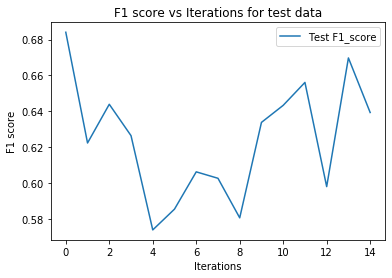

In [34]:
from spacy import displacy
from itertools import chain
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator

x=range(0,20)
 
ax = plt.figure().gca()
#...
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.plot(valid_f1scores,label="Validation F1_score")
ax.plot(test_f1scores,label="Test F1_score")
ax.set_xlabel('Iterations')
ax.set_ylabel('F1 score')
ax.legend()
ax.set_title('F1 score vs Iterations for test data')
# naming the x axis 
#ax.xlabel('Iteration') 
# naming the y axis 
#ax.ylabel('F1 score') 
# giving a title to my graph 
#
# show a legend on the plot 
#ax.legend() 
  
# function to show the plot

In [19]:
def load_model(model_path):
    ''' Loads a pre-trained model for prediction on new test sentences
   
    model_path : directory of model saved by spacy.to_disk
    '''
    nlp = spacy.blank('en')
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner)
    ner = nlp.from_disk(model_path)
    return ner

In [20]:
# Output directory
from pathlib import Path
output_dir=Path('\\Thesis\\NERdata\\spacy_example')

# Saving the model to the output directory
if not output_dir.exists():
  output_dir.mkdir()
nlp.meta['name'] = 'my_ner'  # rename model
nlp.to_disk(output_dir)
print("Saved model to", output_dir)

Saved model to \Thesis\NERdata\spacy_example


In [40]:
# Testing the NER

test_text = "FIRELUZ COMERCIO E MANUTENCAO DE / Rua Perite, 73 / 09550-75,Reason or Description of services : 1303315272_Bank Details Update,External Note 04.06.2020   21:41:25   I505758 Suelen Marques correct bank details 90907761 BANCO SANTANDER BANK KEY 0330109  BANK ACCOUNT 1311540 and postal code 856A1 street schummelstrasse city belgim  AK 7"
#test_text = "LK Comunicacao Visual LTDA / Avenida Unisinos, 645 202 / 930,Reason or Description of services : 1303315359_Change Bank Details,correct bank details 90770396 BANCO BRADESCO BANK AK 237 0285 BANK ACCOUNT 245 AK 773 AK 3"
#test_text = "Updated Bank Details _1302992297,Hi, Agencia number does not match with the attachments and the last digit of the bank account needs to be removed. Regards, Micaela.,Hi,Done amending bank details. Hope these are correct.Thank you,Sledge,HiSledge,As per my undertanding the Bank Key number is conformed by the Bank code and the Agencia Number:Itau Bank Code: 3417 Agencia: 8572 Bank Key: 34178572 Account number: 09900 Please confirm if this info is correct. Thanks Micaela.,Hi Micaela,I have revalidated the details on supporting documents and yes I agree with your mentioned set up.Have amended the banking details now. Appreciate your approval.Thank you,Sledge"
#test_text =  "Fedex Kinkos Korea gangnam 2 center 2nd floor Hosan bldgReason or Description of services Change Bank Account DetailsGood day The vendor sent a new bank account details for Kinkos Korea Please see attached supporting document In case theres additional information needed please let me know Bank code 081 Bank account no 24989003537004 Kindly double check w the supporting doc Thanks Rose "
#test_text = "FIDI 1303424315Stanford UniversityLDCReason or Description of services Change of AddressPlease change address Office of Technology Licensing Stanford University 415 Broadway Street 2nd Floor MC 8854 Redwood City CA 94063 " 
doc = nlp(test_text)
for ent in doc.ents:
  print(ent.text,ent.label_)

BANK KEY BP_BKDTL BANKL
0330109 BANKL NEW_VALUE
BANK ACCOUNT BP_BKDTL BANKN
1311540 BANKN NEW_VALUE


In [18]:

from collections import defaultdict


In [14]:
texts  = ["LK Comunicacao Visual LTDA / Avenida Unisinos, 645 202 / 930,Reason or Description of services : 1303315359_Change Bank Details,correct bank details 90770396 BANCO BRADESCO BANK AK 237 0285 BANK ACCOUNT 245 AK 773 AK 3"]
           

In [19]:
# Number of alternate analyses to consider. More is slower, and not necessarily better -- you need to experiment on your problem.
beam_width = 16
# This clips solutions at each step. We multiply the score of the top-ranked action by this value, and use the result as a threshold. This prevents the parser from exploring options that look very unlikely, saving a bit of efficiency. Accuracy may also improve, because we've trained on greedy objective.
beam_density = 0.0001 
nlp = spacy.load('\\Thesis\\NERdata\\spacy_example')

In [18]:
docs = list(nlp.pipe(texts, disable=['ner']))
beams = nlp.entity.beam_parse(docs, beam_width=beam_width, beam_density=beam_density)

for doc, beam in zip(docs, beams):
    entity_scores = defaultdict(float)
    for score, ents in nlp.entity.moves.get_beam_parses(beam):
        for start, end, label in ents:
            entity_scores[(start, end, label)] += score

l= []
for k, v in entity_scores.items():
    l.append({'start': k[0], 'end': k[1], 'label': k[2], 'prob' : v} )

for a in sorted(l, key= lambda x: x['start']):
    print(a)


{'start': 27, 'end': 29, 'label': 'BP_BKDTL BANKL', 'prob': 0.9927123633099446}
{'start': 27, 'end': 29, 'label': 'BANKL NEW_VALUE', 'prob': 0.004802907220390228}
{'start': 27, 'end': 28, 'label': 'BP_BKDTL BANKL', 'prob': 0.002484729469664996}
{'start': 29, 'end': 31, 'label': 'BANKL NEW_VALUE', 'prob': 0.9999999999999999}
{'start': 31, 'end': 33, 'label': 'BP_BKDTL BANKN', 'prob': 0.9999999999999999}
{'start': 33, 'end': 34, 'label': 'BANKN NEW_VALUE', 'prob': 0.9930537358481614}
{'start': 33, 'end': 34, 'label': 'POST_COD1 NEW_VALUE', 'prob': 0.0033868039486758587}
{'start': 33, 'end': 34, 'label': 'BANKL NEW_VALUE', 'prob': 0.0017736979781573672}
{'start': 33, 'end': 34, 'label': 'HOUSE_NR1 NEW_VALUE', 'prob': 0.001257087857177693}
{'start': 33, 'end': 34, 'label': 'BP_BKDTL BANKL', 'prob': 0.0005286743678275788}
{'start': 35, 'end': 36, 'label': 'HOUSE_NR1 NEW_VALUE', 'prob': 0.0001296561076997176}
